In [46]:
library(gmodels)
library(ggplot2)
library(readr)
library(plotly)
library(gridExtra)
library(ggpubr)
library( patchwork )

Warning message:
"пакет 'gridExtra' был собран под R версии 4.1.3"


In [2]:
data <- read.csv('data_no_outliers_IQR.csv' , sep =',')

In [3]:
for (i in c("Mark",'Location','Fuel_Type', 'Transmission', 'Owner_Type')){
    data[,i] <- as.factor(data[,i])
}

data$SEATS <- as.factor(data$Seats )
data$YEAR <- as.factor(data$Year )

 

klm_div <- function(x){
    if (x<= 236000 ){
        return ('First group klm')
    }
    else {
        return ('Second group klm')
    }
    
}

replacer_Owner_Type <- function(x){
     return ( ifelse( x %in% c('Second','Fourth & Above','Third'), 'Second & Above',  'First') )
}

replacer_fuel_Type <- function(x){
     return ( ifelse( x %in% c('LPG','CNG' ), 'OTHER',  x) )
}

data$Klm_sections <- as.factor( vapply( data$Kilometers_Driven ,FUN = klm_div , FUN.VALUE = 'First group klm')  )

data$Owner_Type <-  vapply(data$Owner_Type, FUN  = replacer_Owner_Type,'First') 
data$Fuel_Type  <- vapply(as.character( data$Fuel_Type )  , FUN  = replacer_fuel_Type,'Petrol')

In [6]:
head(data , 5)

,Mark,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,SEATS,YEAR,Klm_sections
,<fct>,<chr>,<fct>,<int>,<int>,<chr>,<fct>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>
1,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,OTHER,Manual,First,37.24,998,58.16,5,1.75,5,2010,First group klm
2,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,5,2015,First group klm
3,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,5,2011,First group klm
4,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,7,2012,First group klm
5,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second & Above,15.20,1968,140.80,5,17.74,5,2013,First group klm


Зависимость цены от мощности двигателя

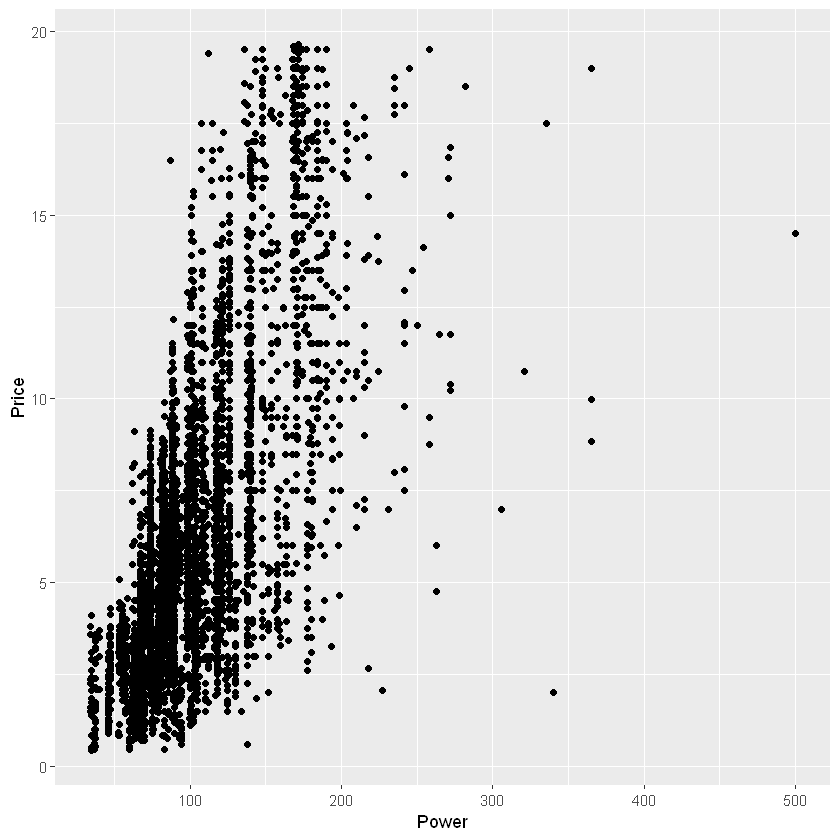

In [4]:
 qplot(x=Power , y = Price   , data = data  ) + geom_point()  

Зависимость цены от мощности с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type 

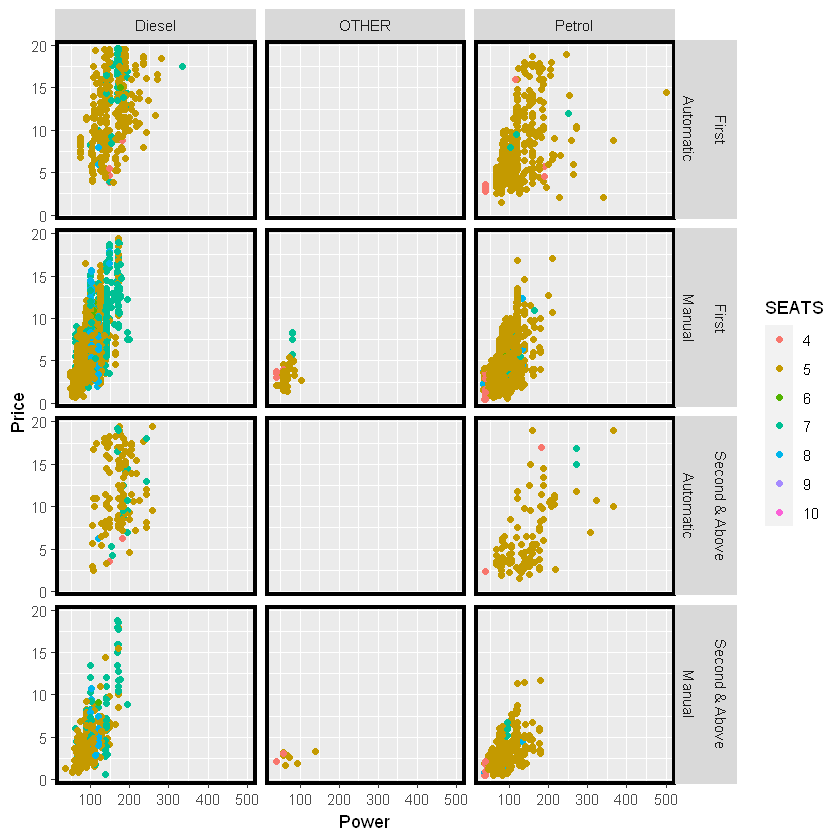

In [97]:
fig <- qplot(x=Power , y = Price   , data = data  ,color = SEATS) + geom_point(  )  + facet_grid( Owner_Type ~ Transmission ~ Fuel_Type  ) +
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
 fig

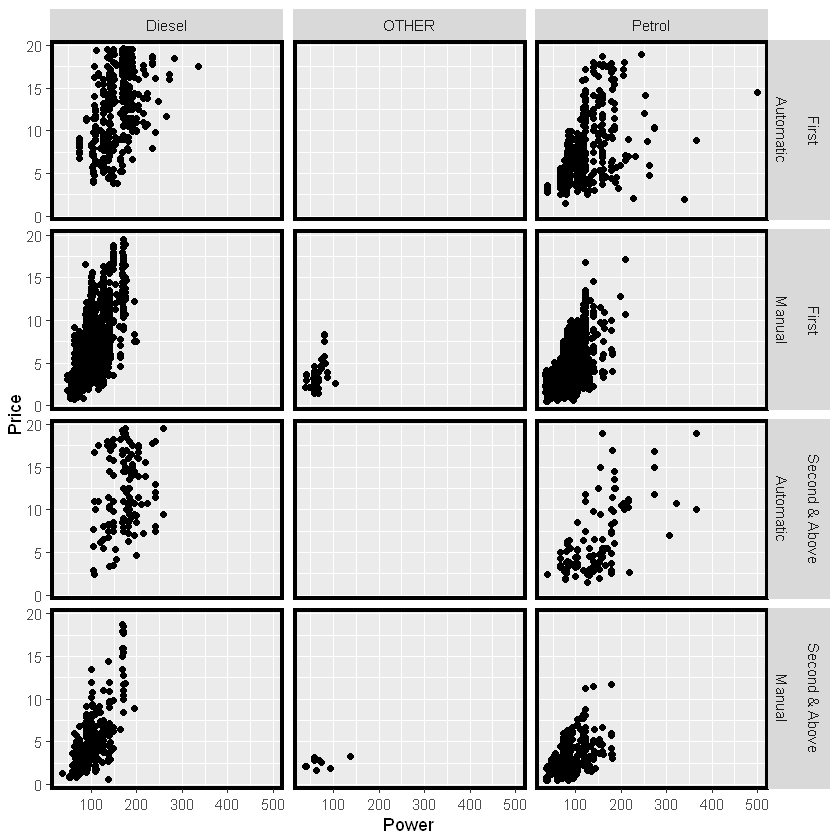

In [34]:
fig <- qplot(x=Power , y = Price   , data = data  ) + geom_point()  + facet_grid( Owner_Type ~ Transmission ~ Fuel_Type  ) +
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
 fig

Зависимость цены от мощности с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и Location

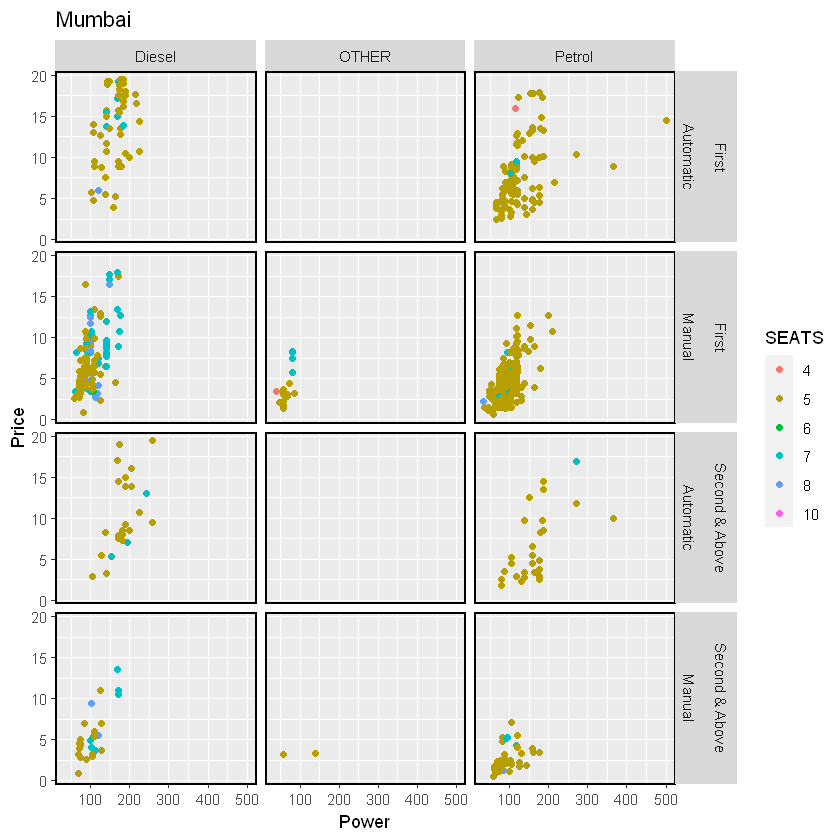

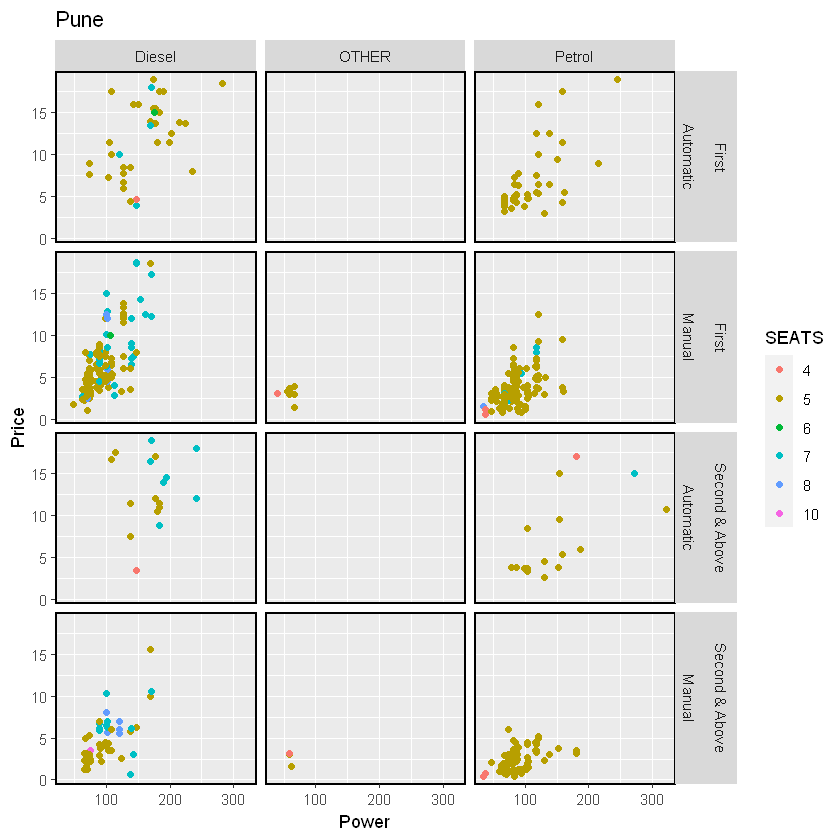

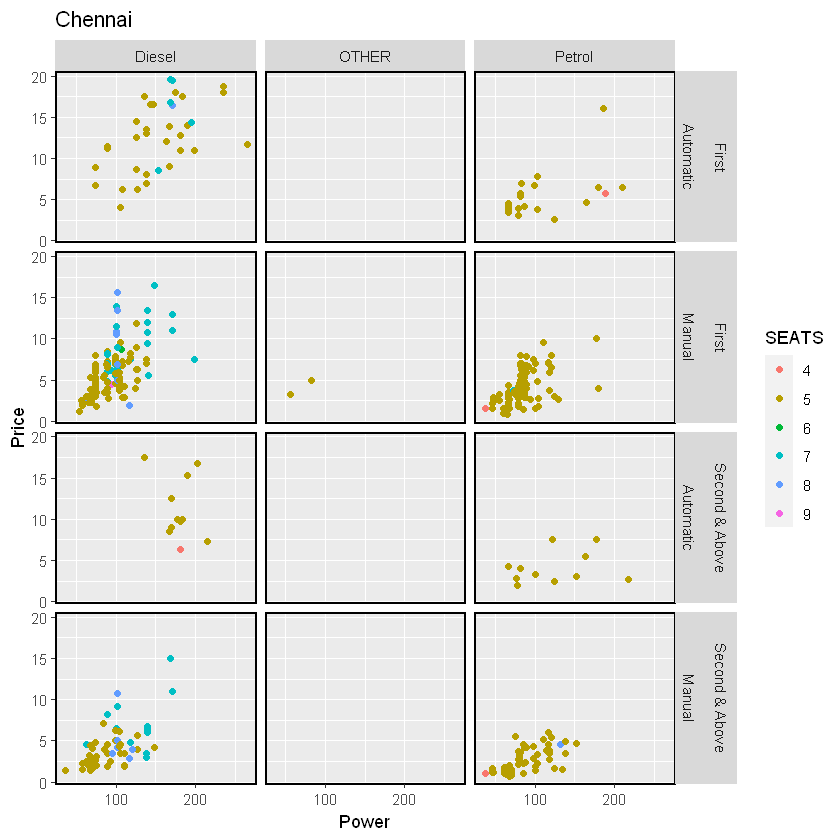

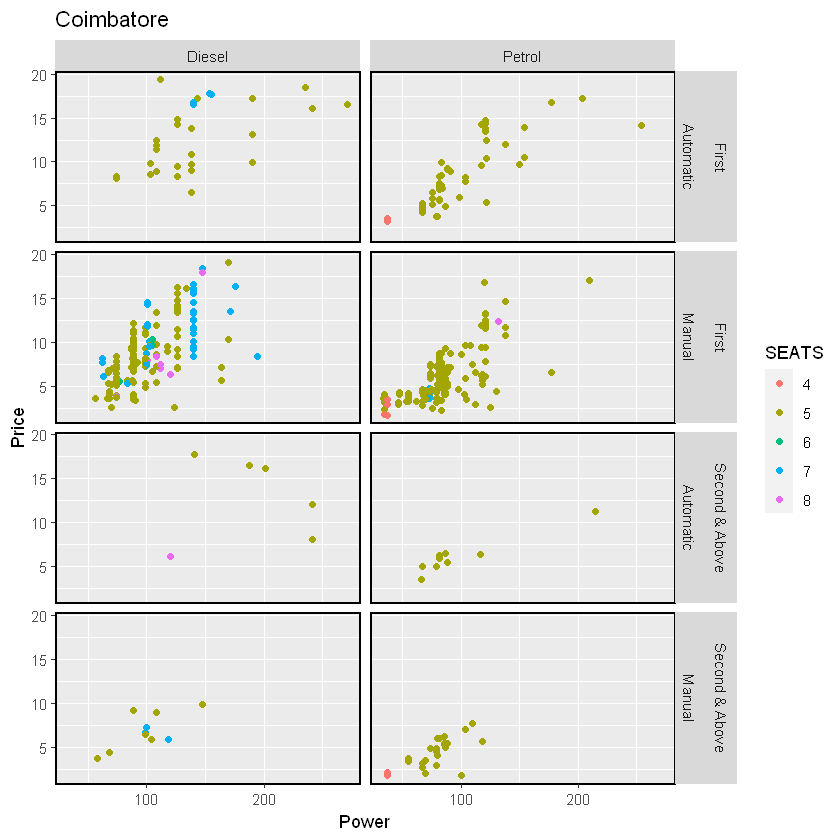

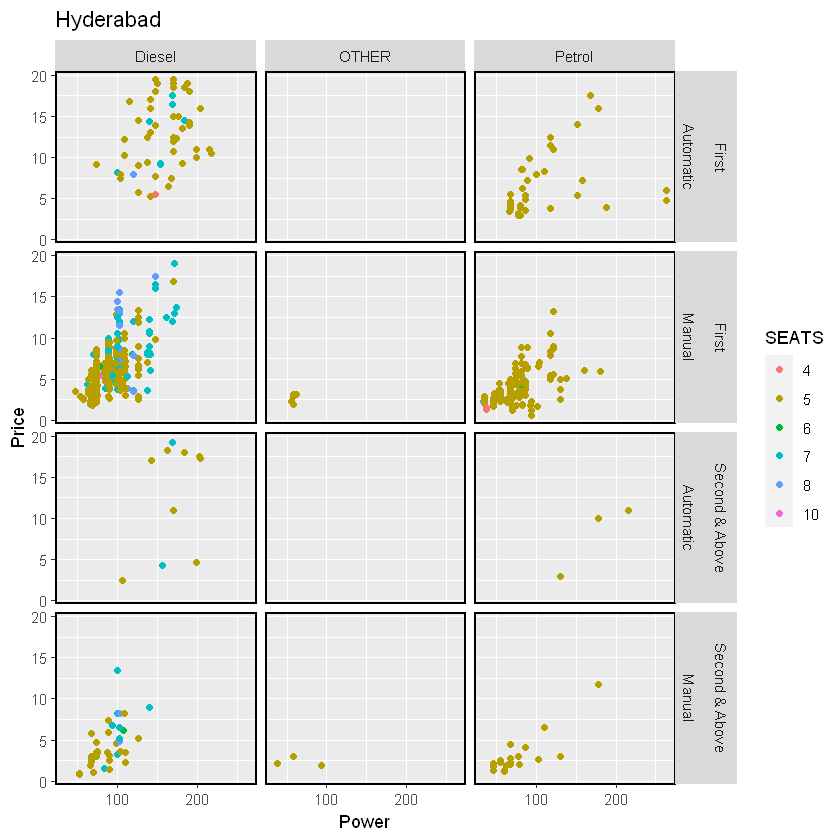

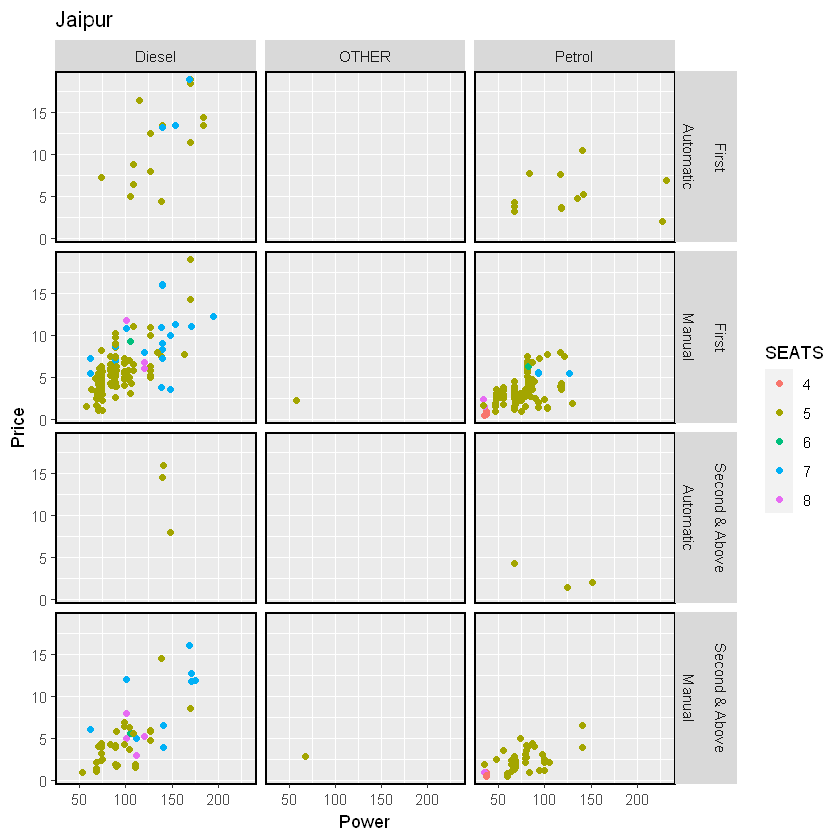

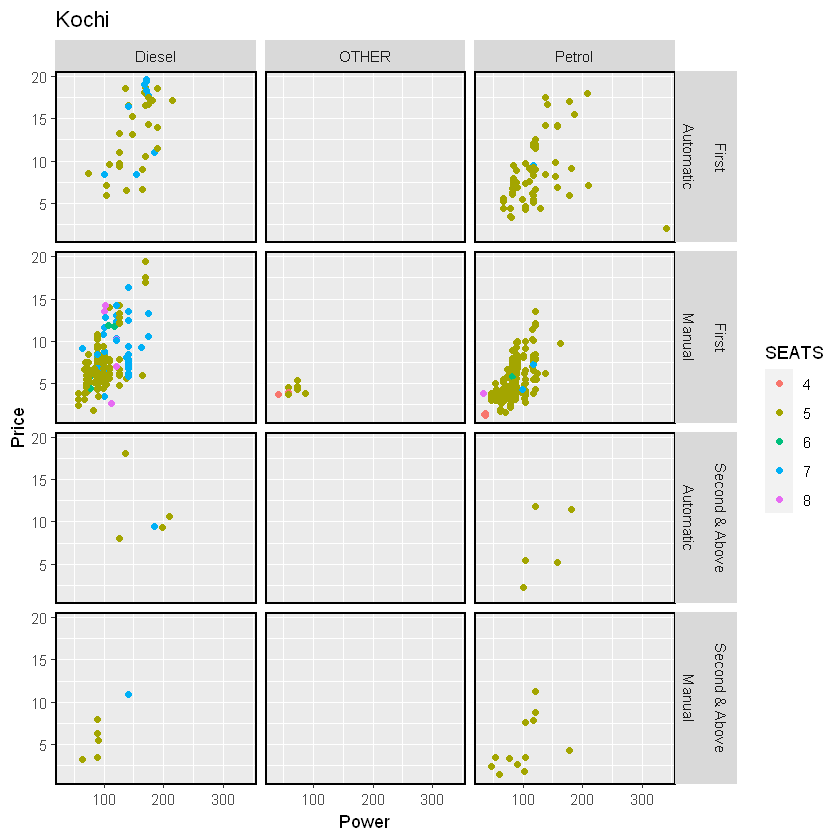

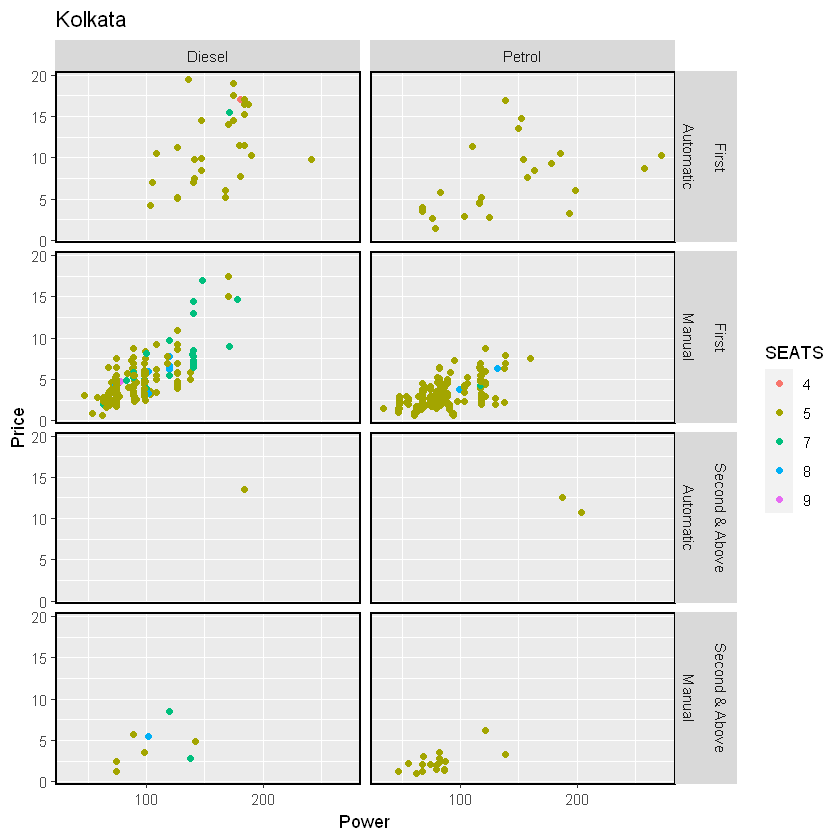

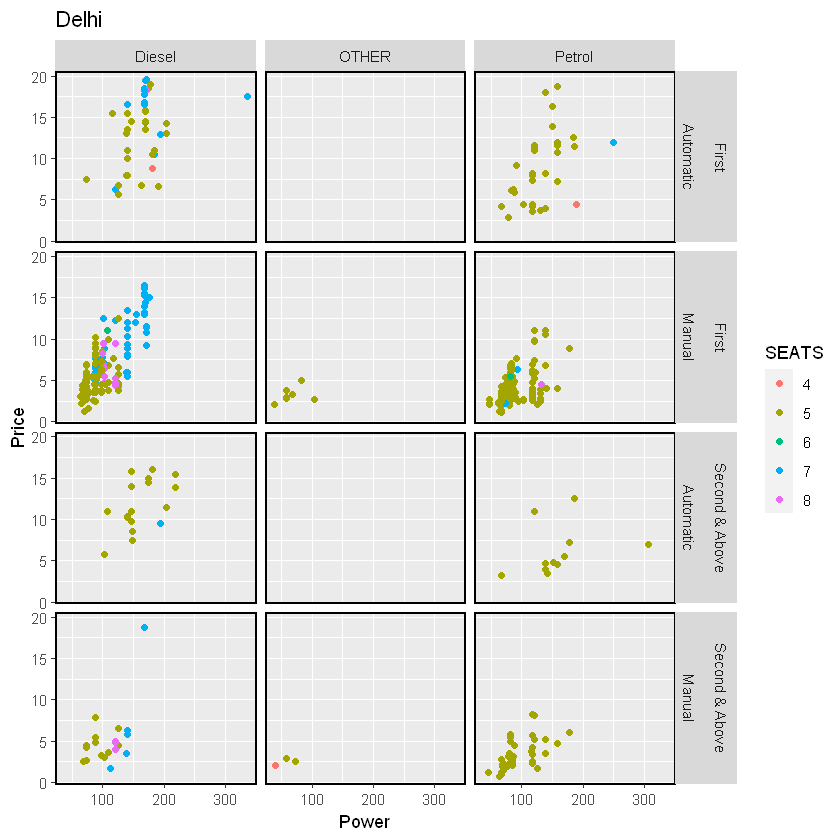

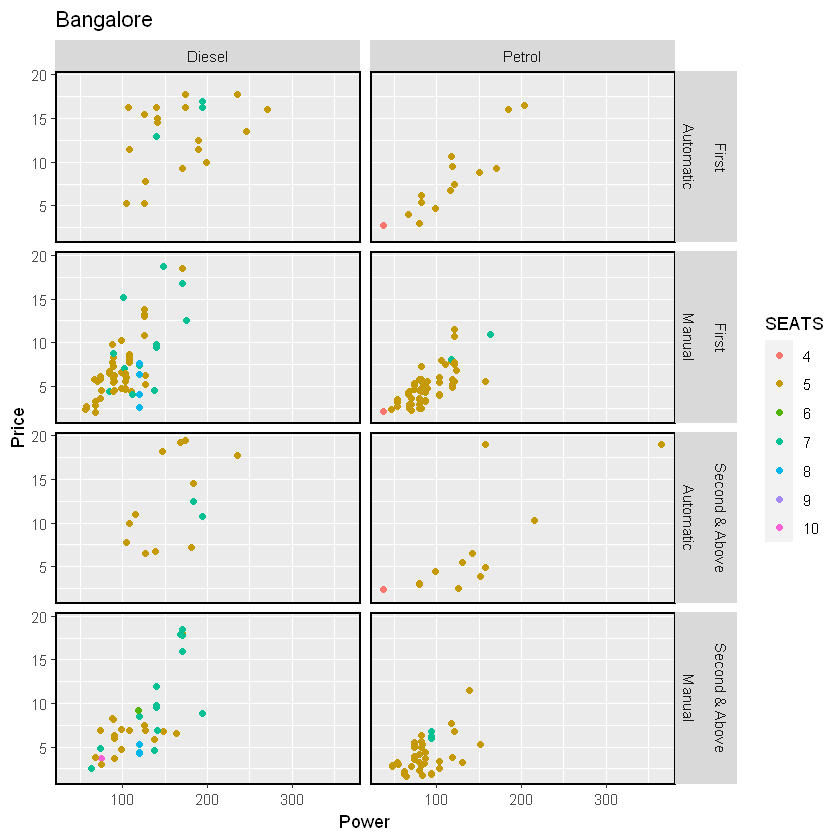

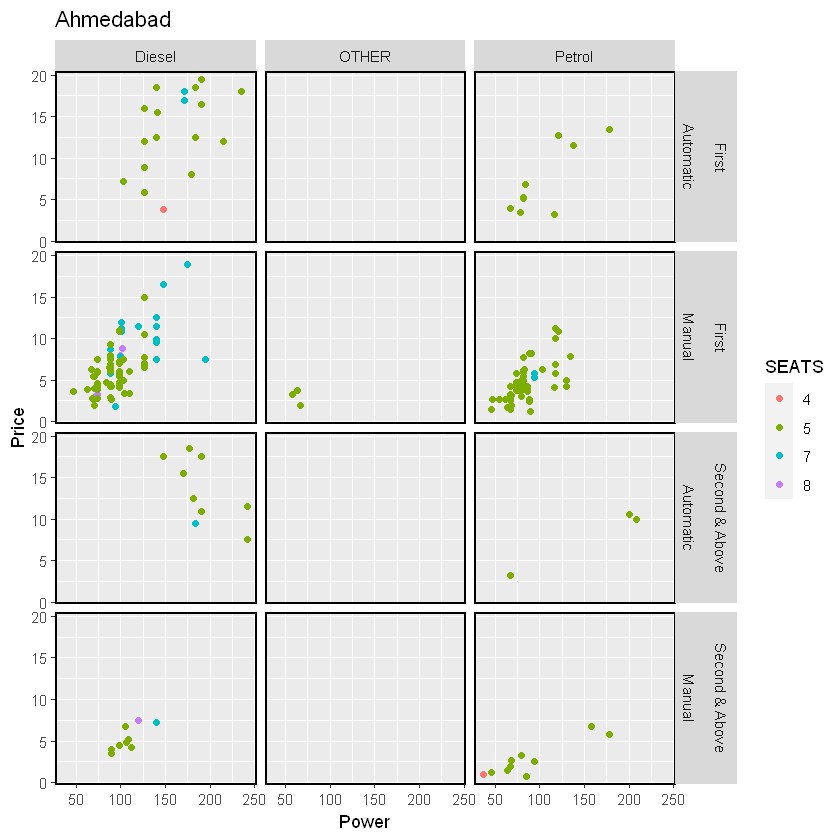

In [100]:
# раскраска по количеству седений  
for (I in  unique( data$Location)){
    d1 <- subset( data , data$Location ==I[[1]])
     
    fig1 <- qplot(x=Power , y = Price   , data = d1 ,main =I[[1]] ,color =SEATS)  + geom_point() + facet_grid( Owner_Type ~ Transmission ~ Fuel_Type  ) +
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 1) )
    print(fig1 )
    
}

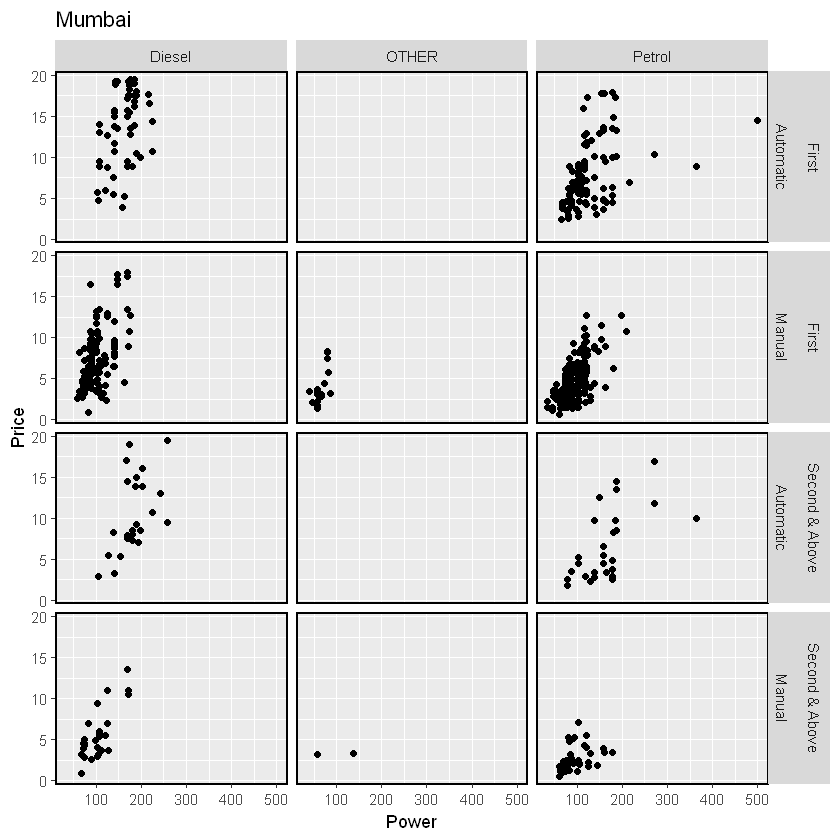

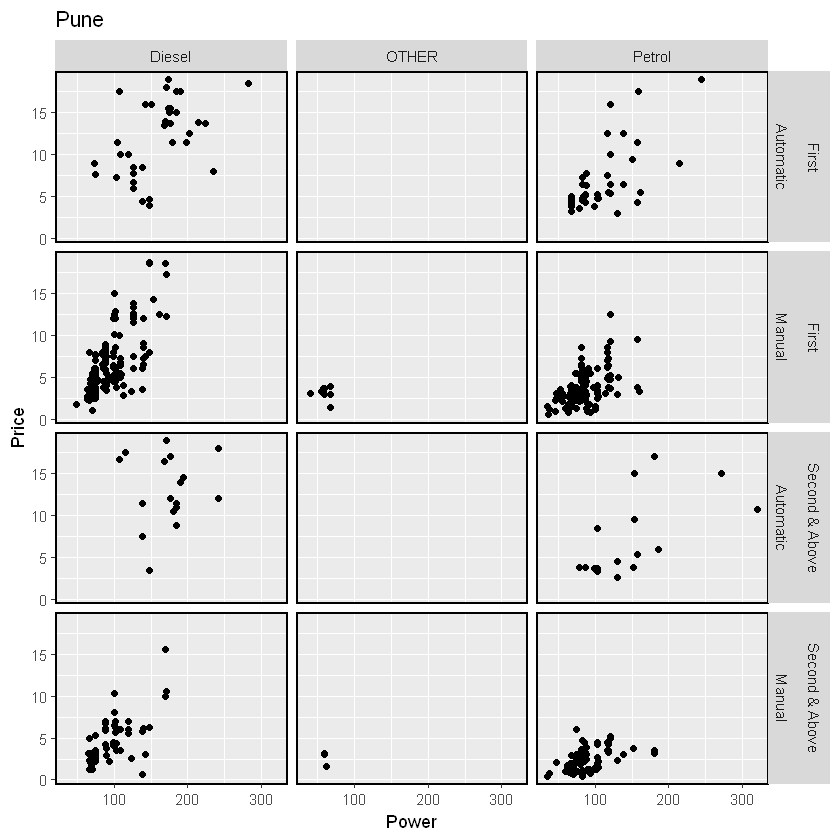

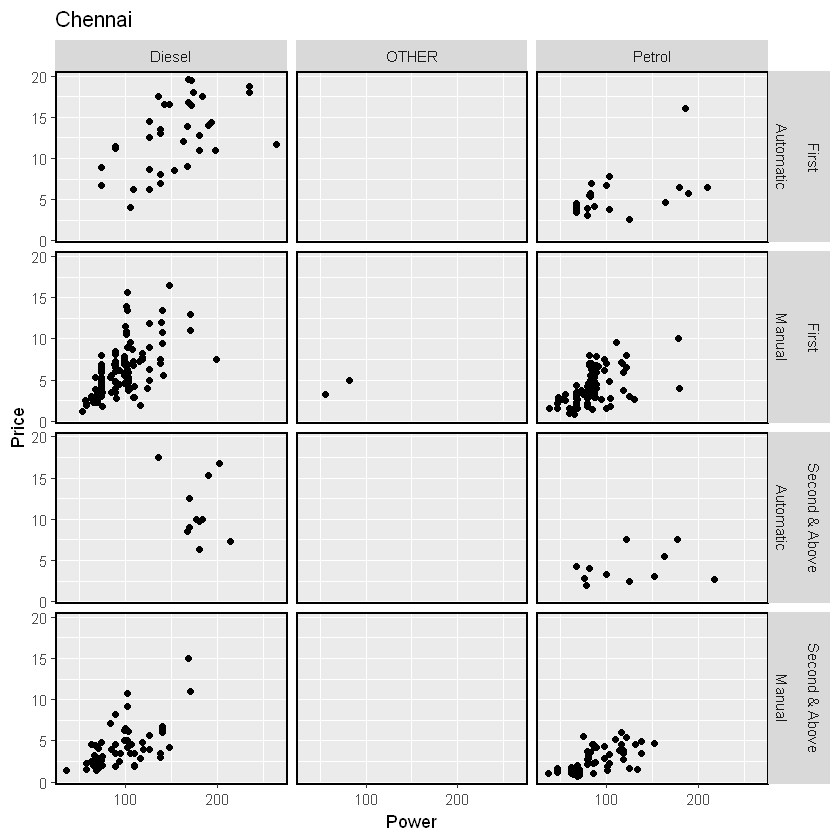

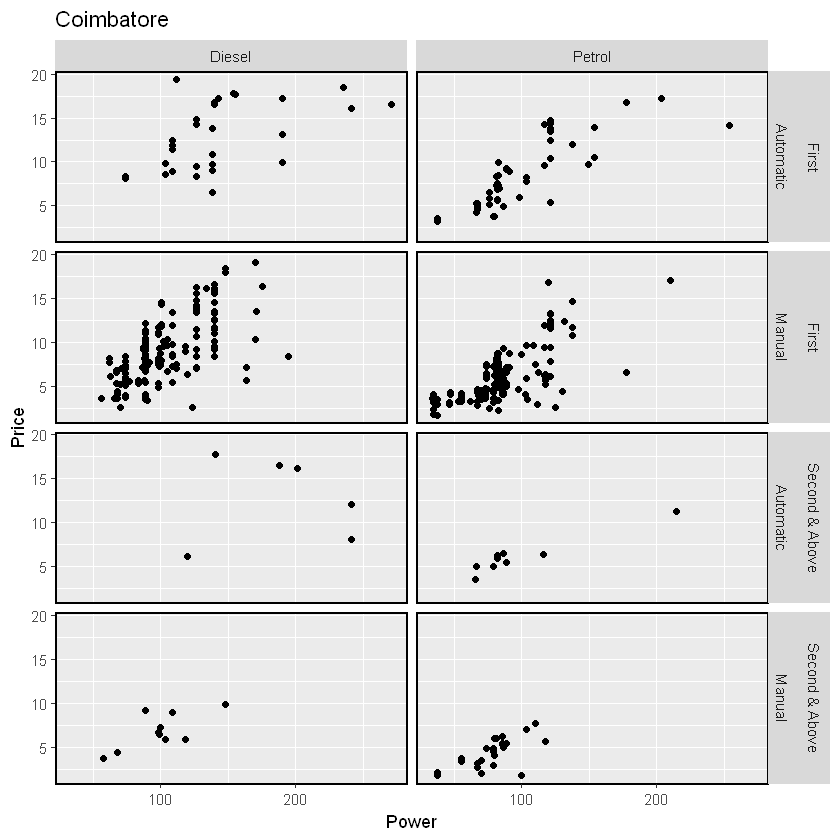

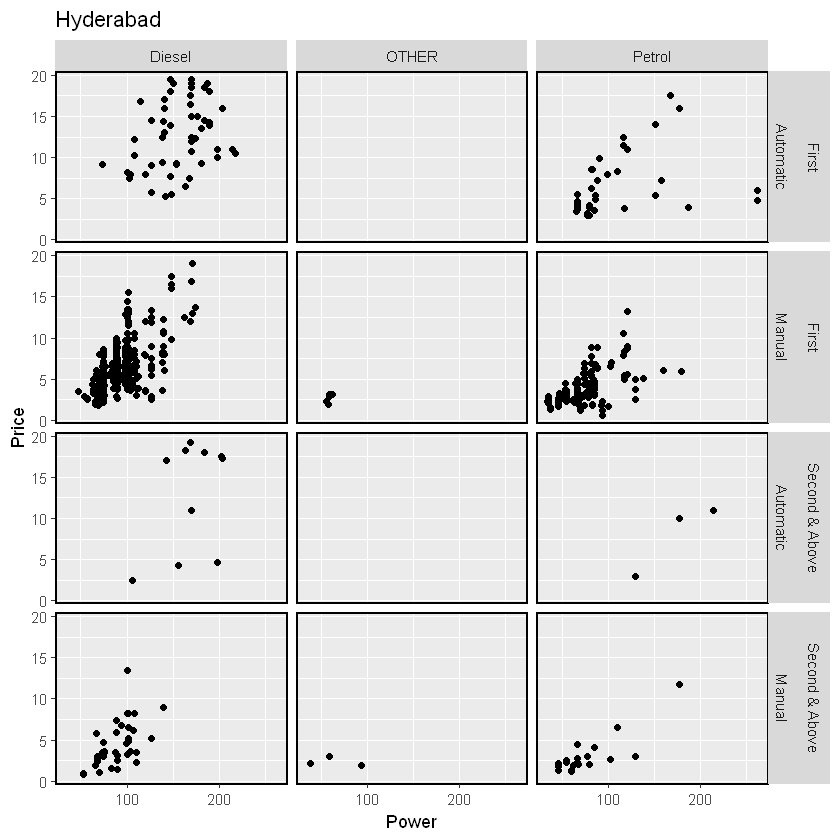

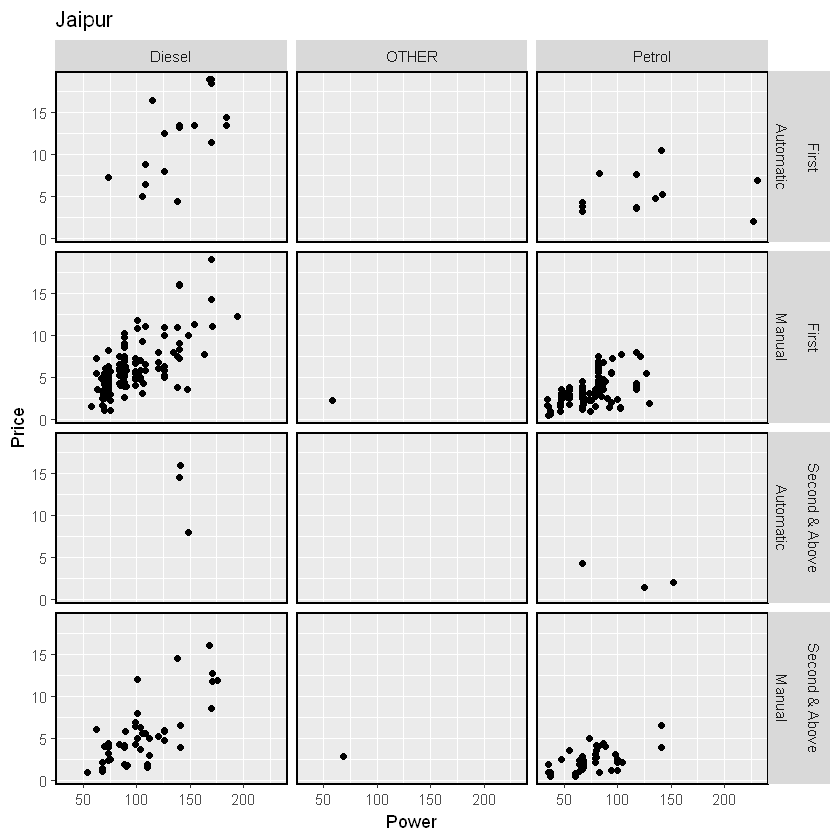

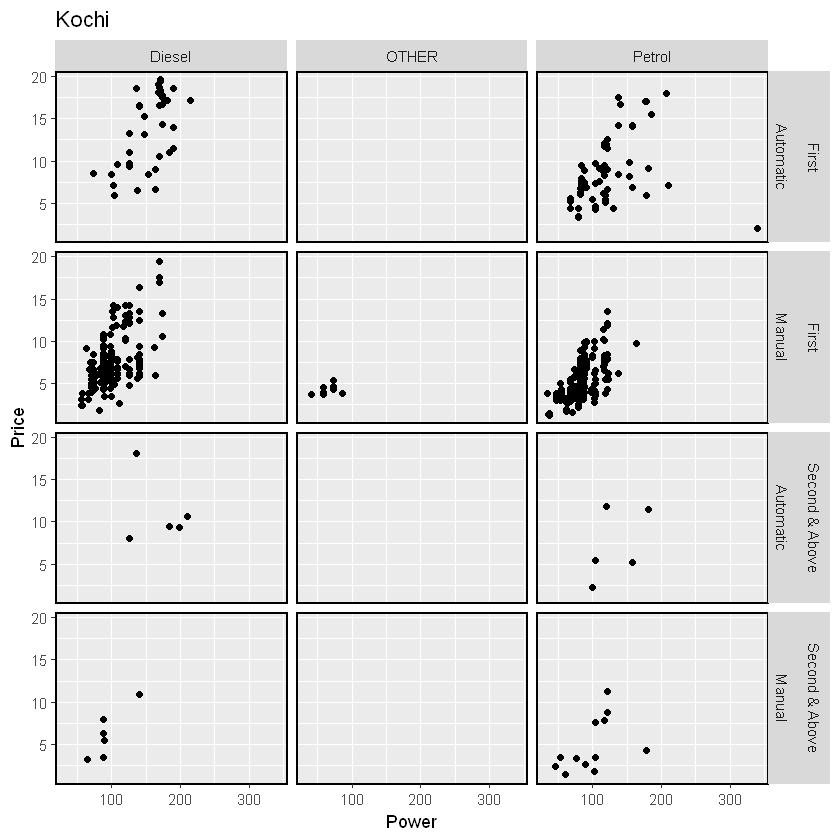

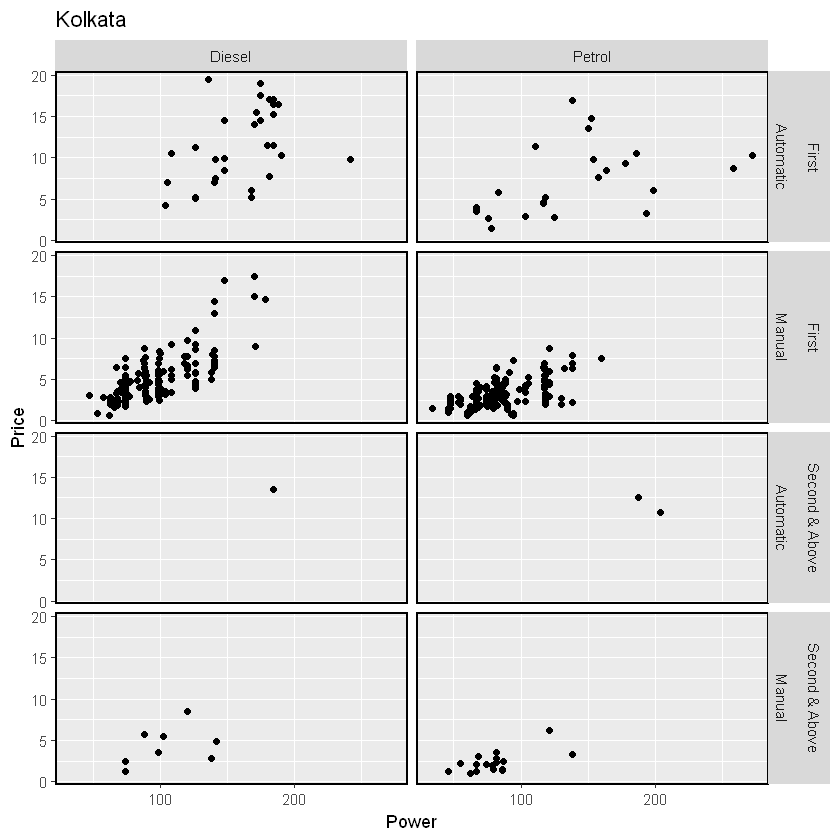

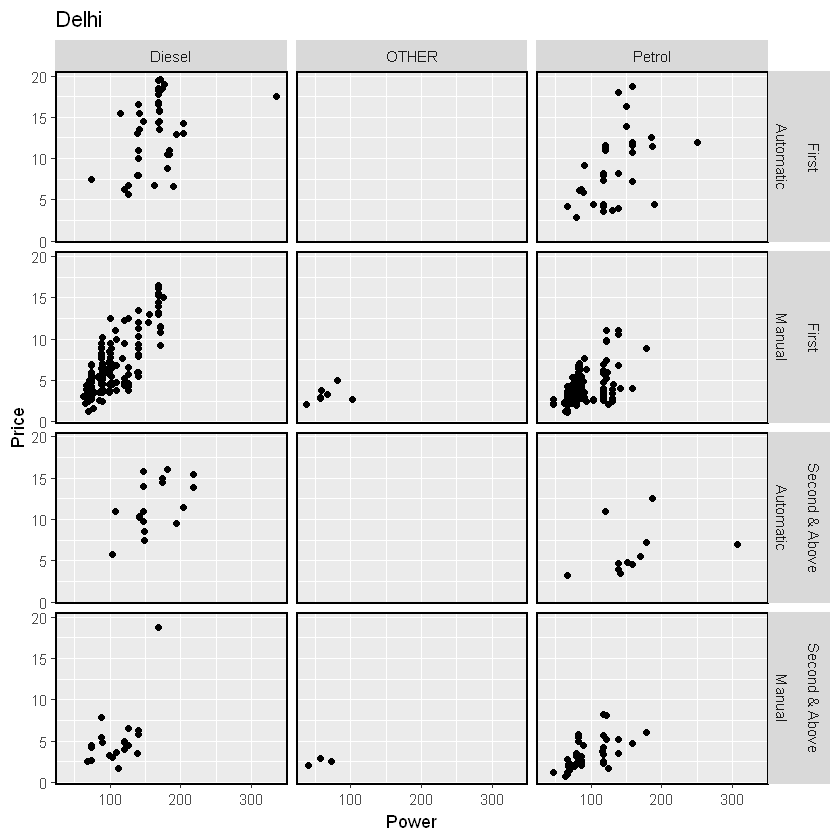

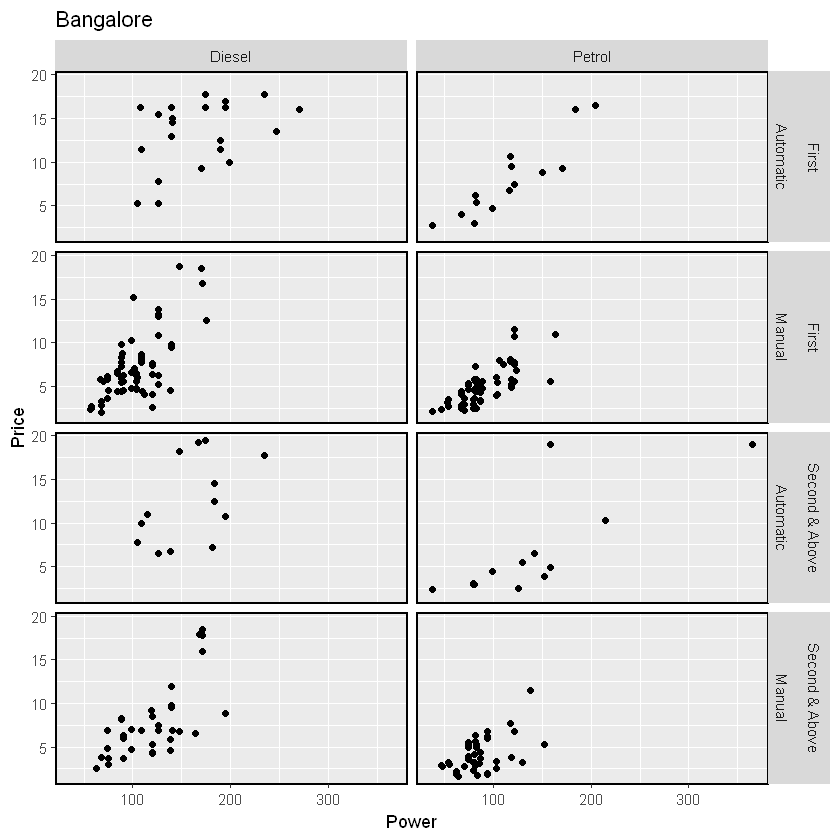

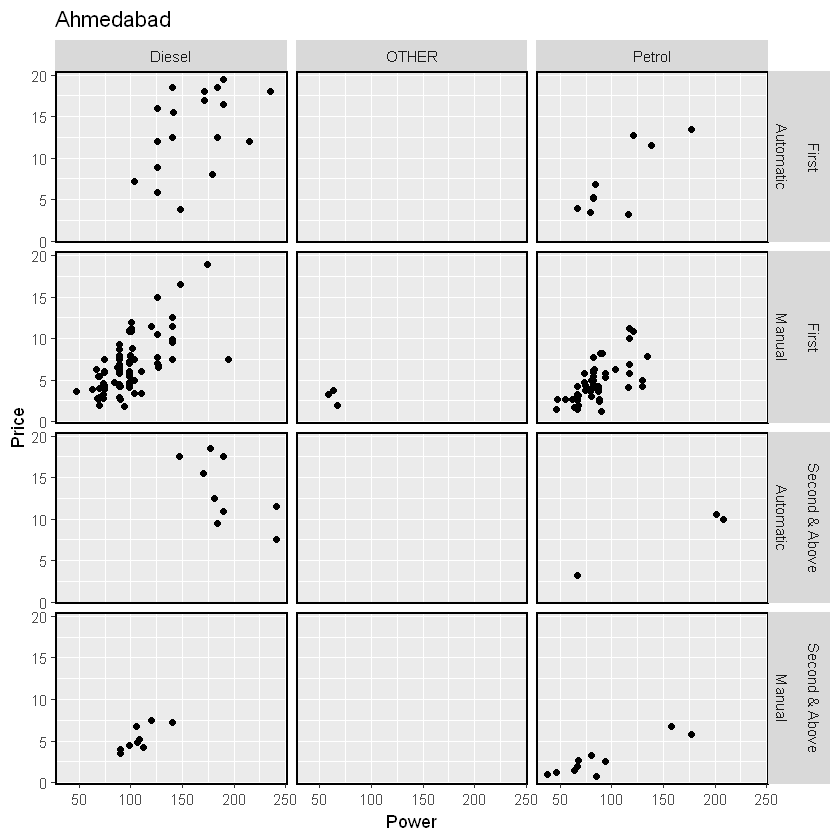

In [88]:
for (I in  unique( data$Location)){
    d1 <- subset( data , data$Location ==I[[1]])
     
    fig1 <- qplot(x=Power , y = Price   , data = d1 ,main =I[[1]] )  + geom_point() + facet_grid( Owner_Type ~ Transmission ~ Fuel_Type  ) +
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 1) )
    print(fig1 )
    
}

Комбинация Owner_Type ~ Transmission ~ Fuel_Type ~ Location хорошо отражает влияние совокупноти факторов на зависимость цены от мощности двигателя

Зависимость цены от мощности с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и Mark

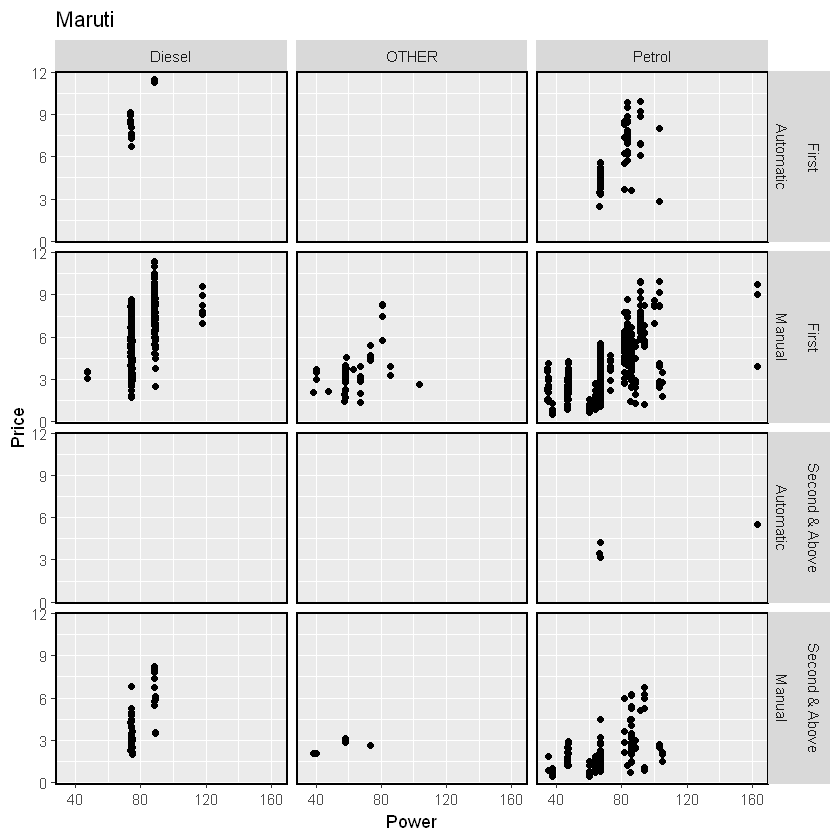

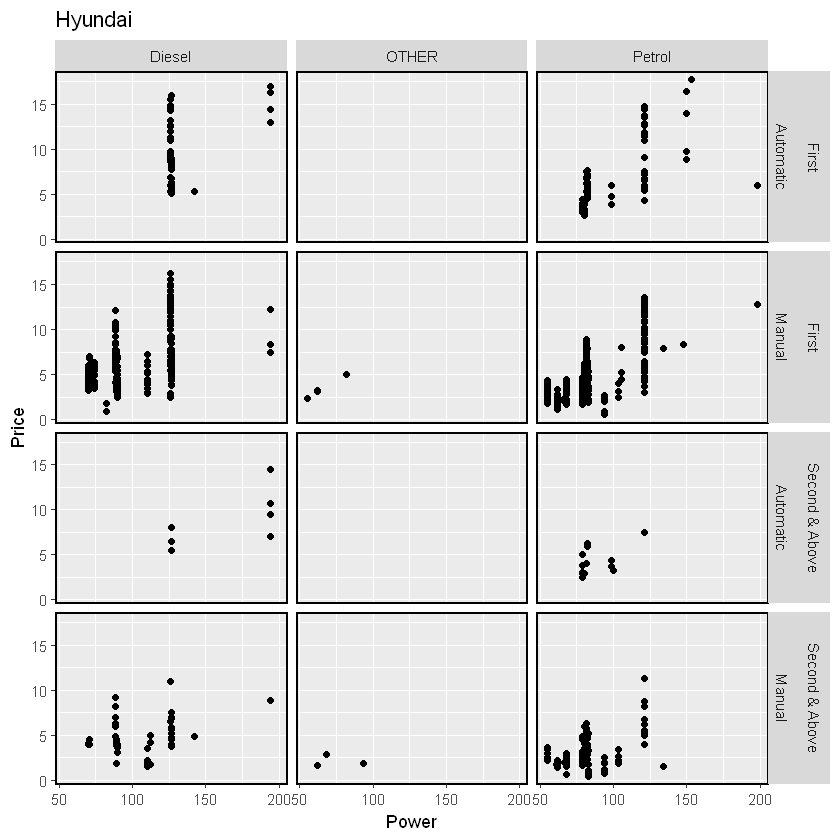

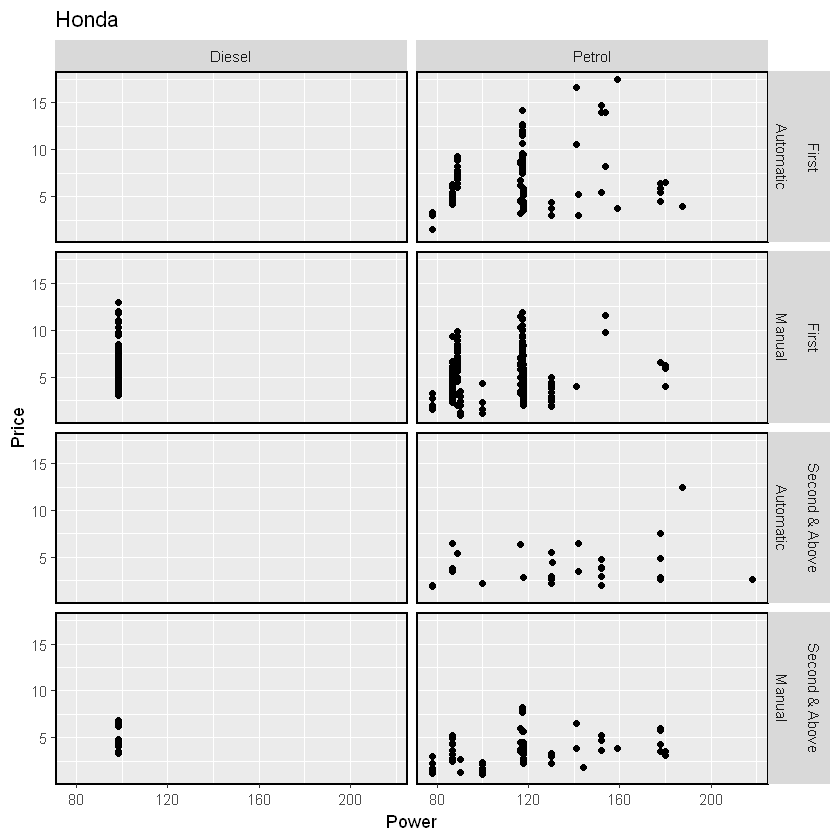

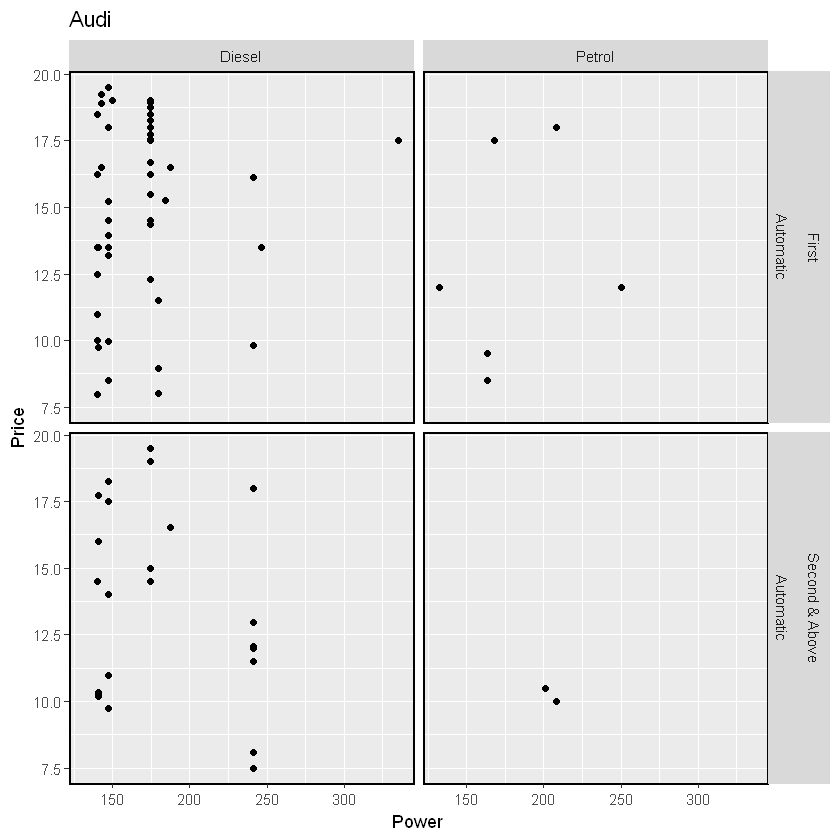

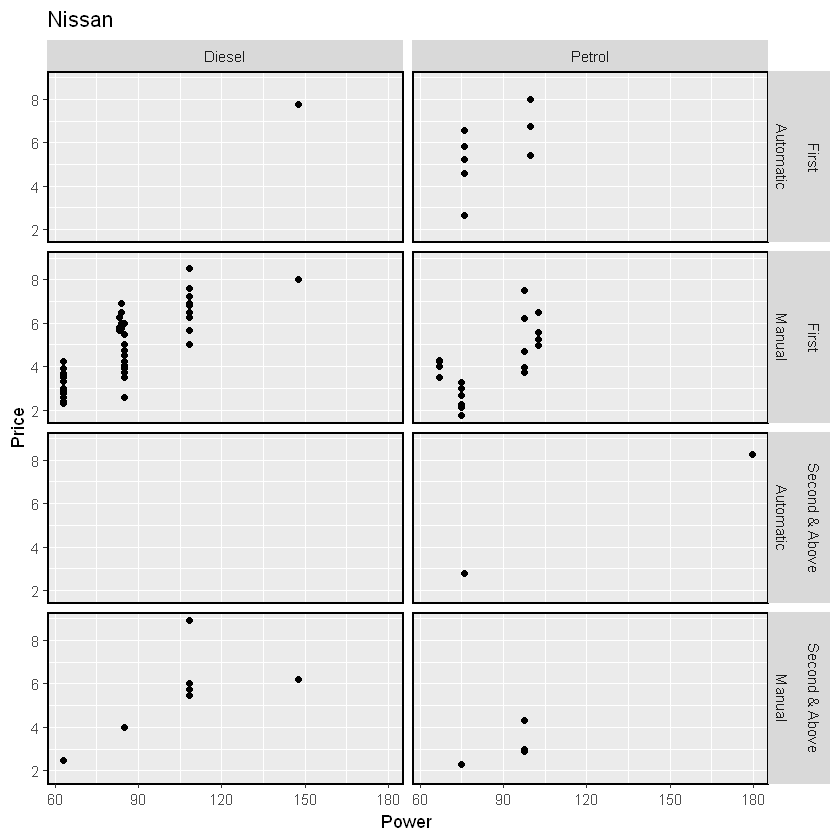

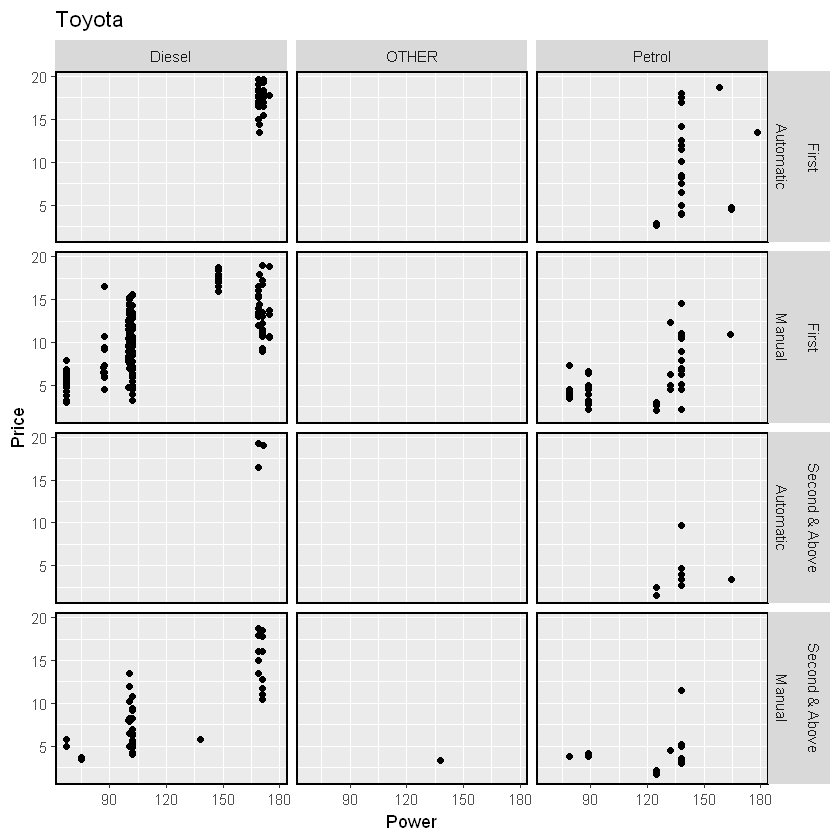

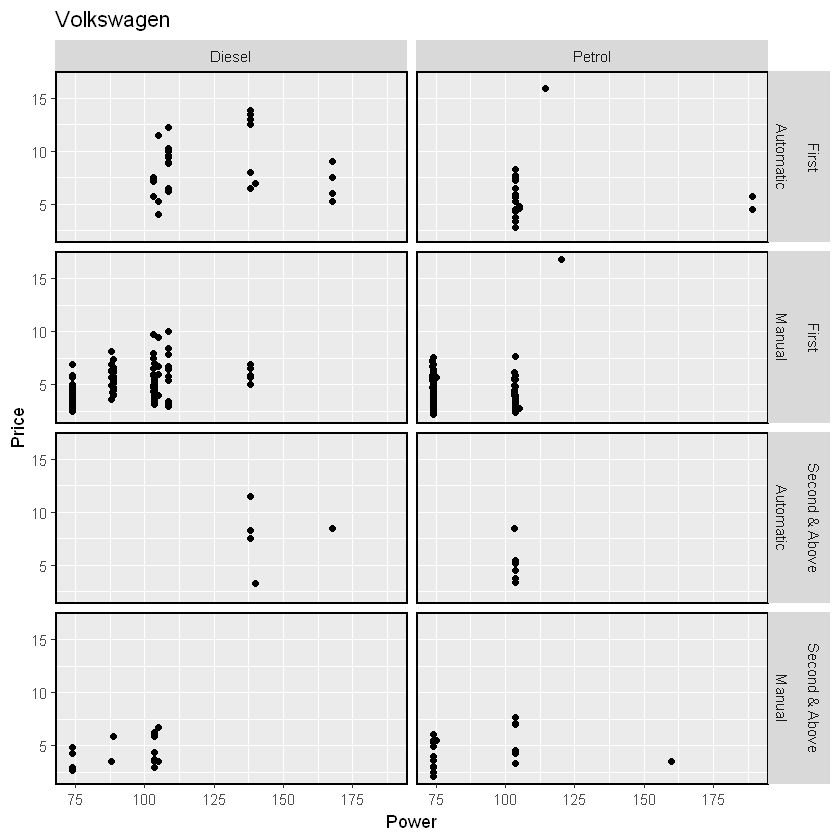

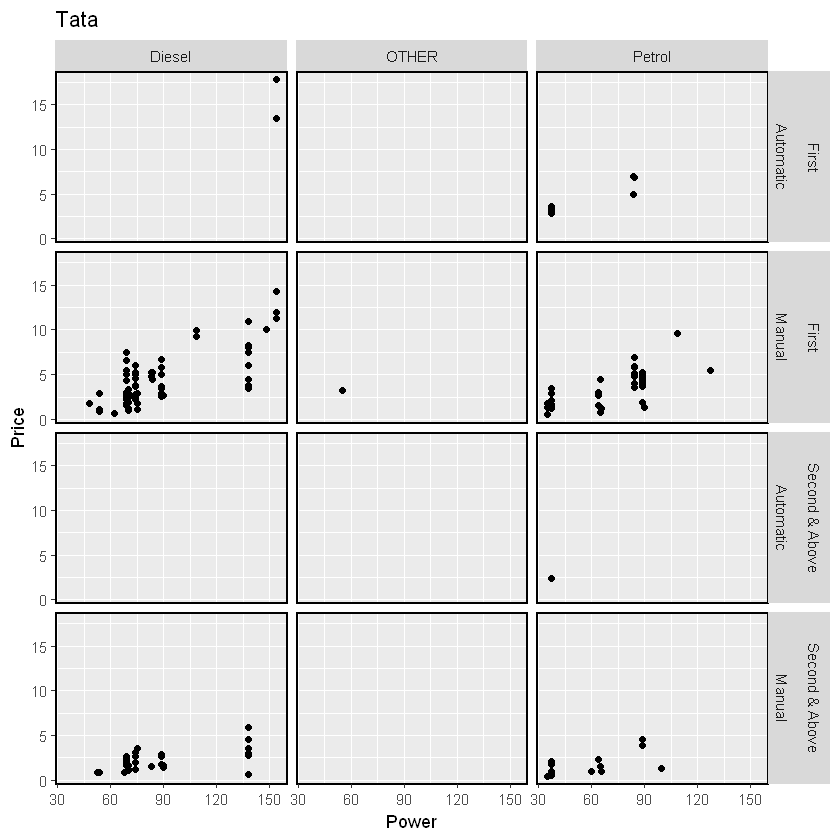

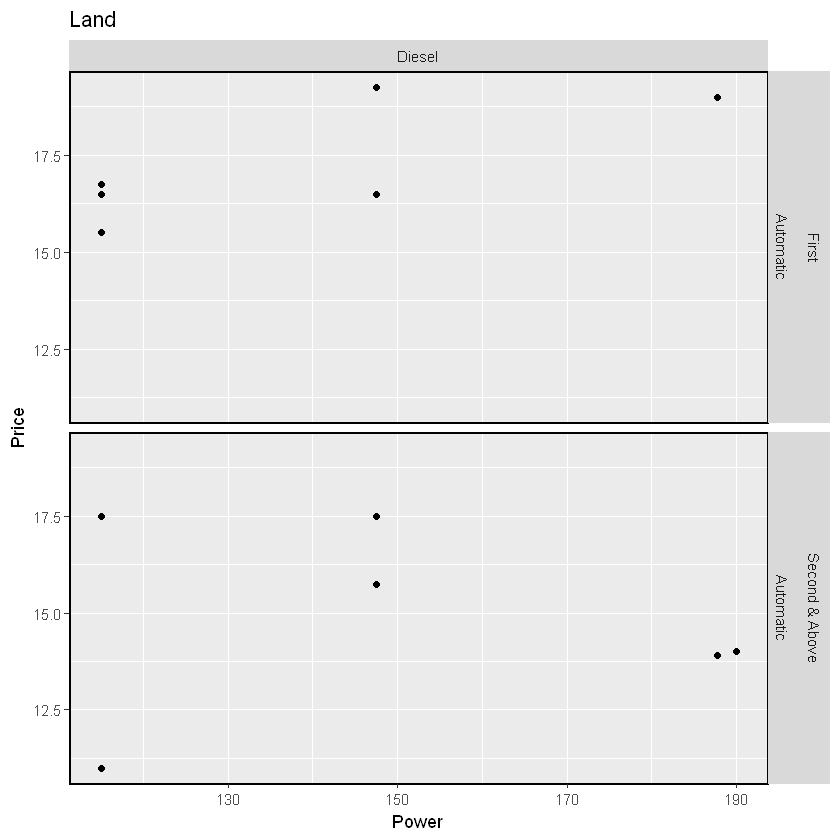

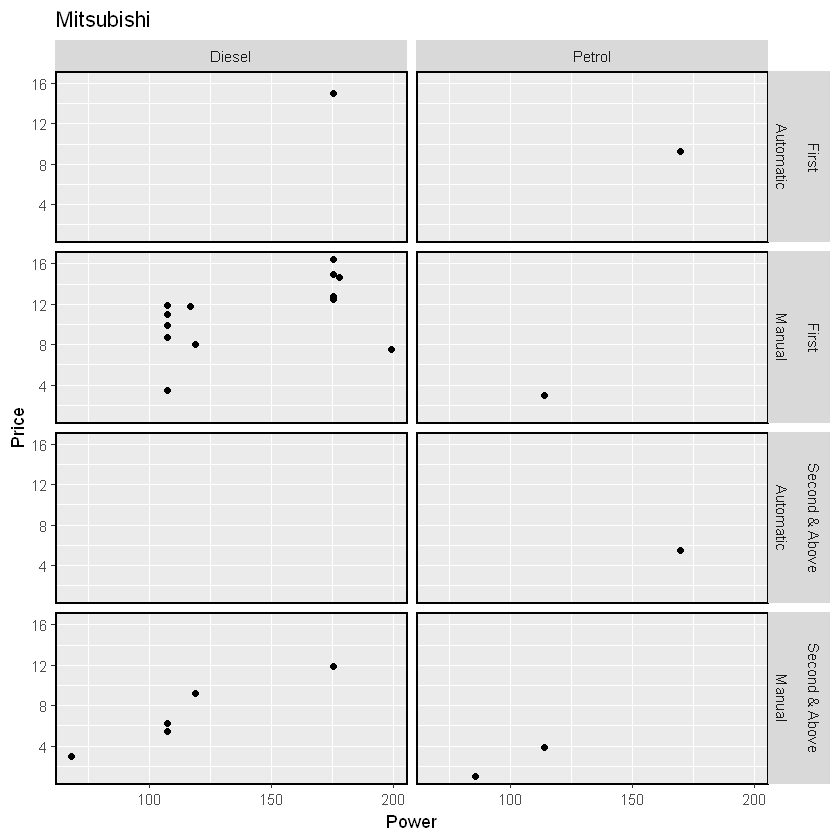

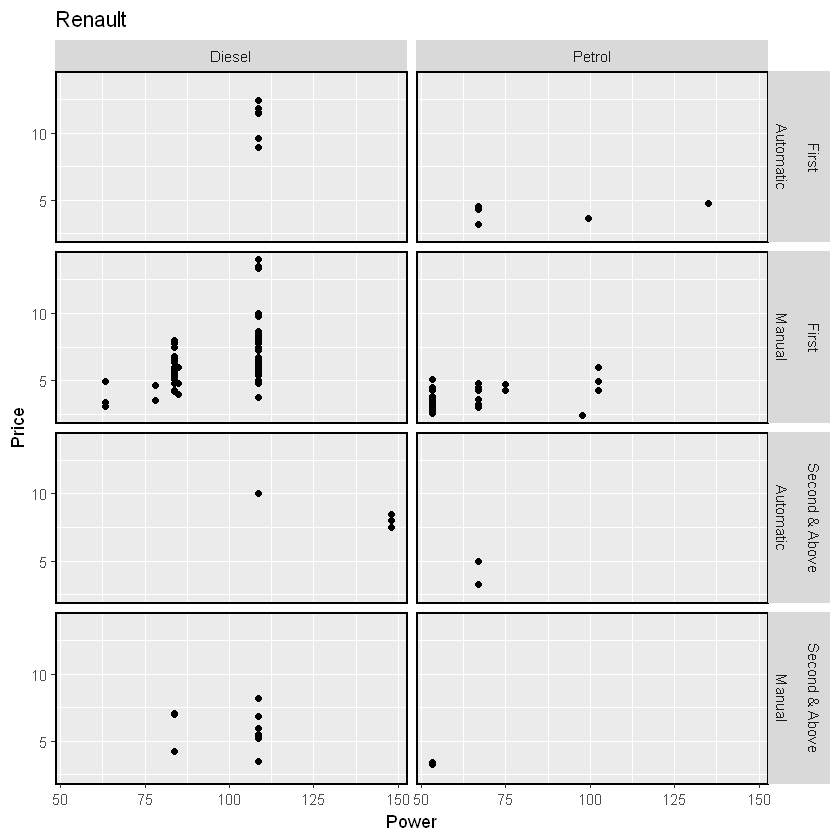

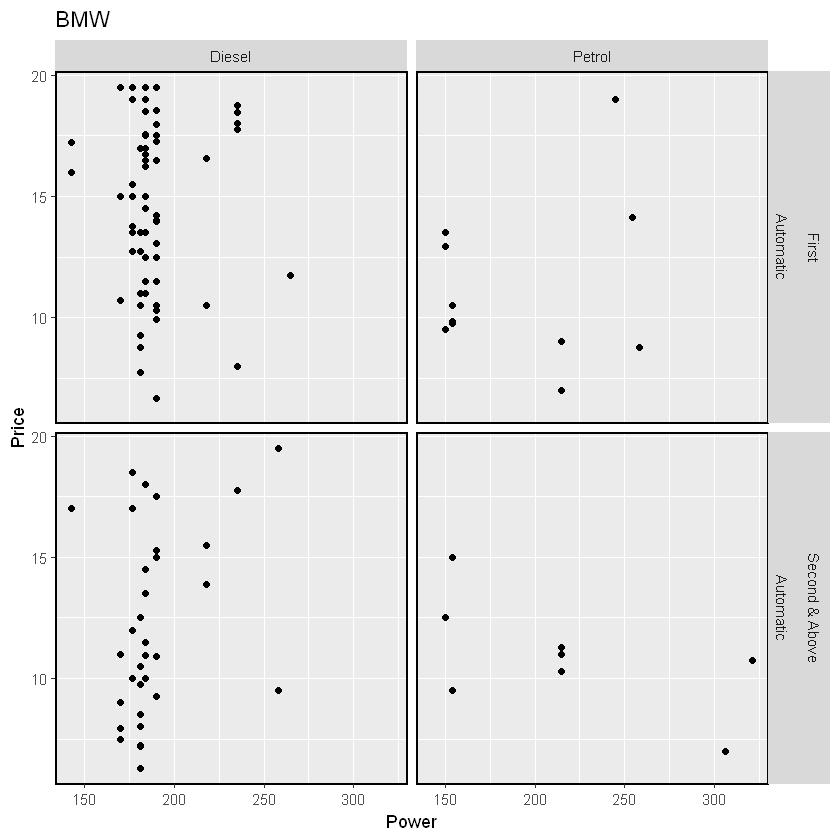

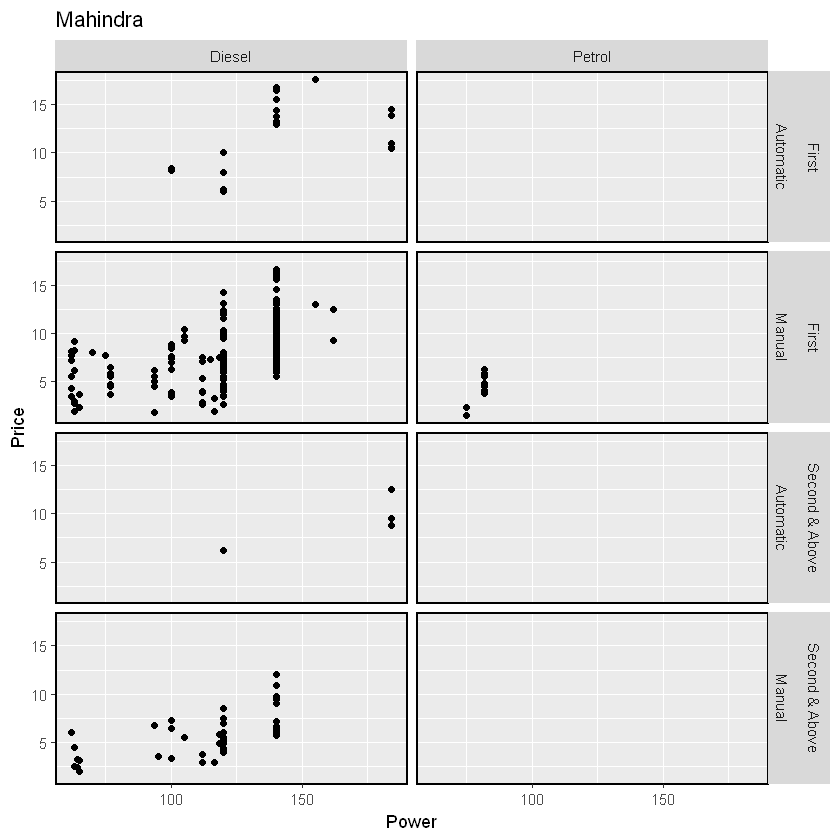

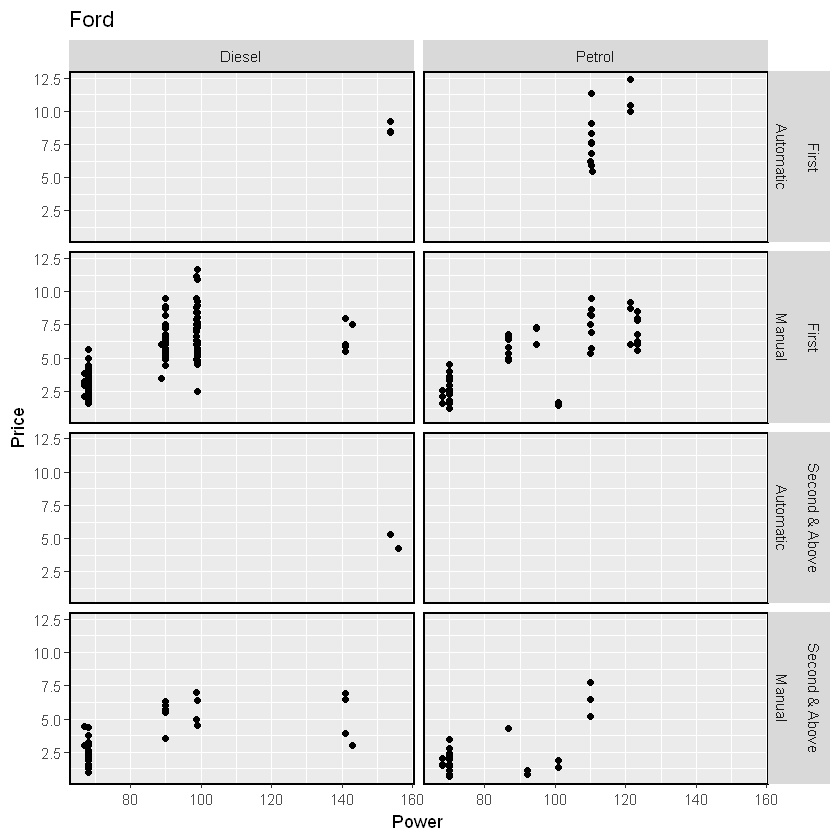

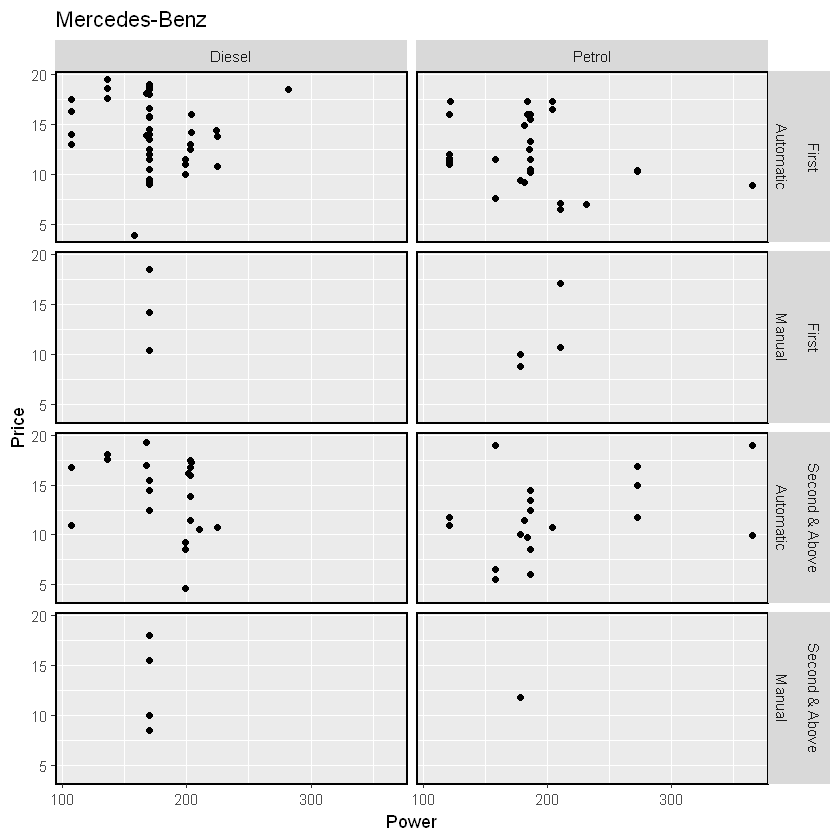

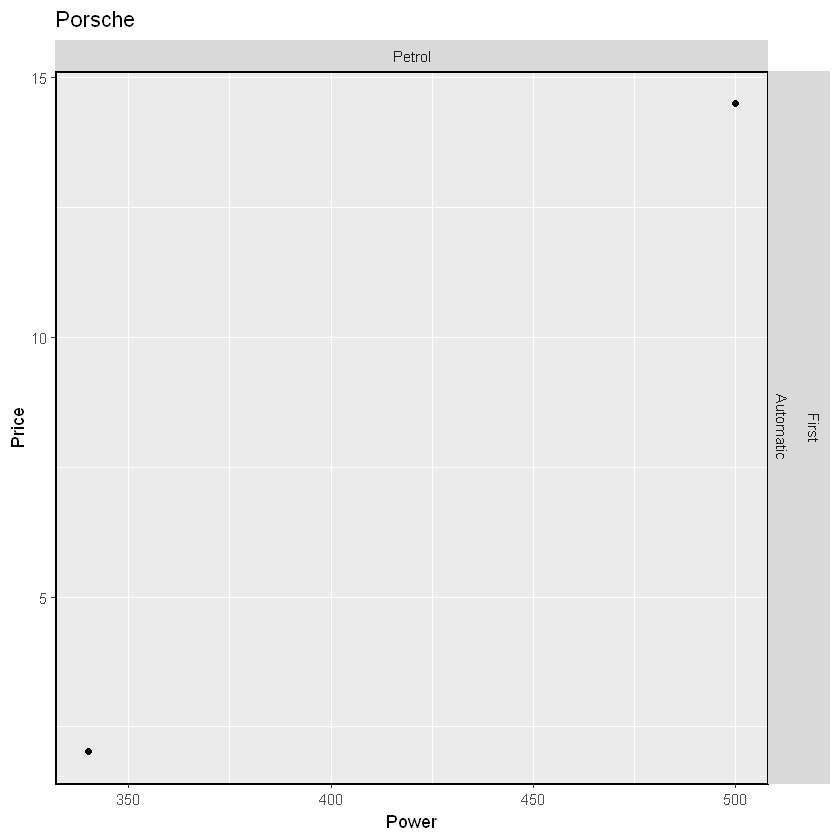

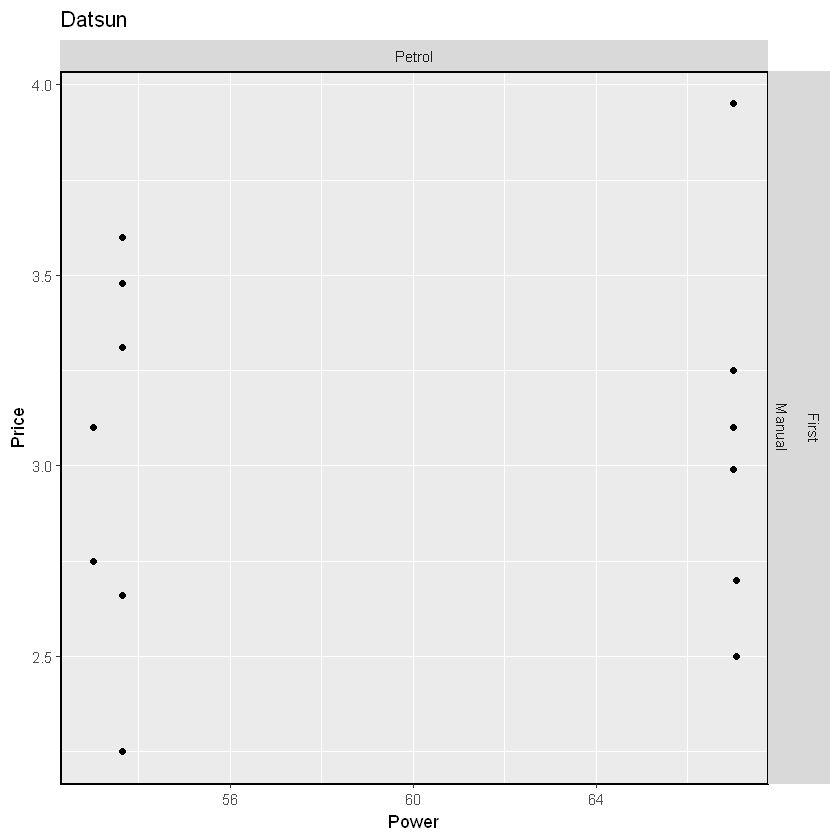

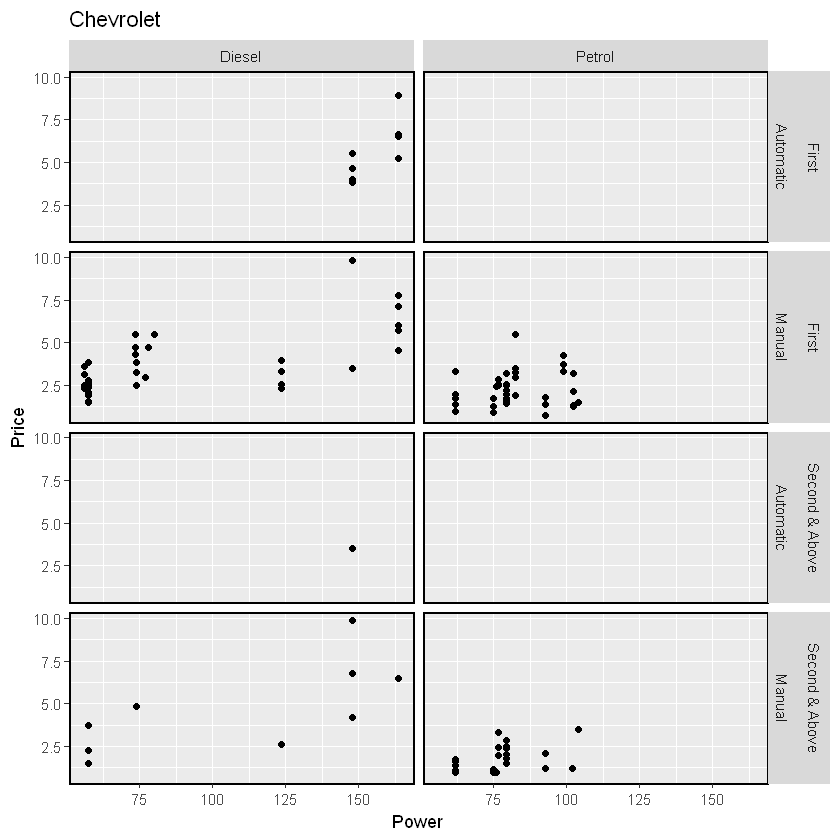

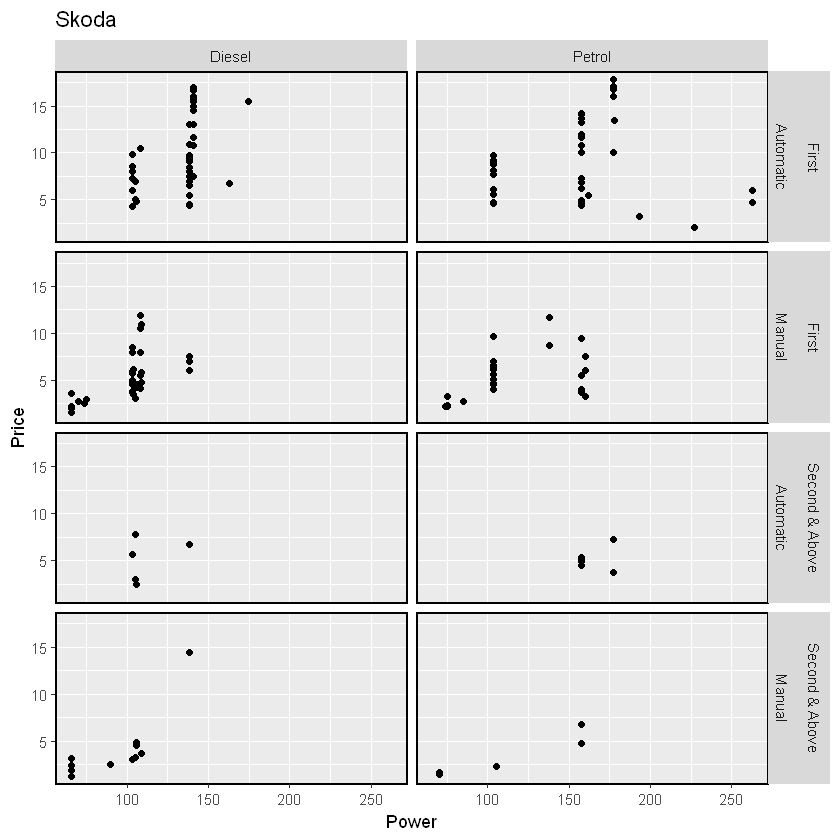

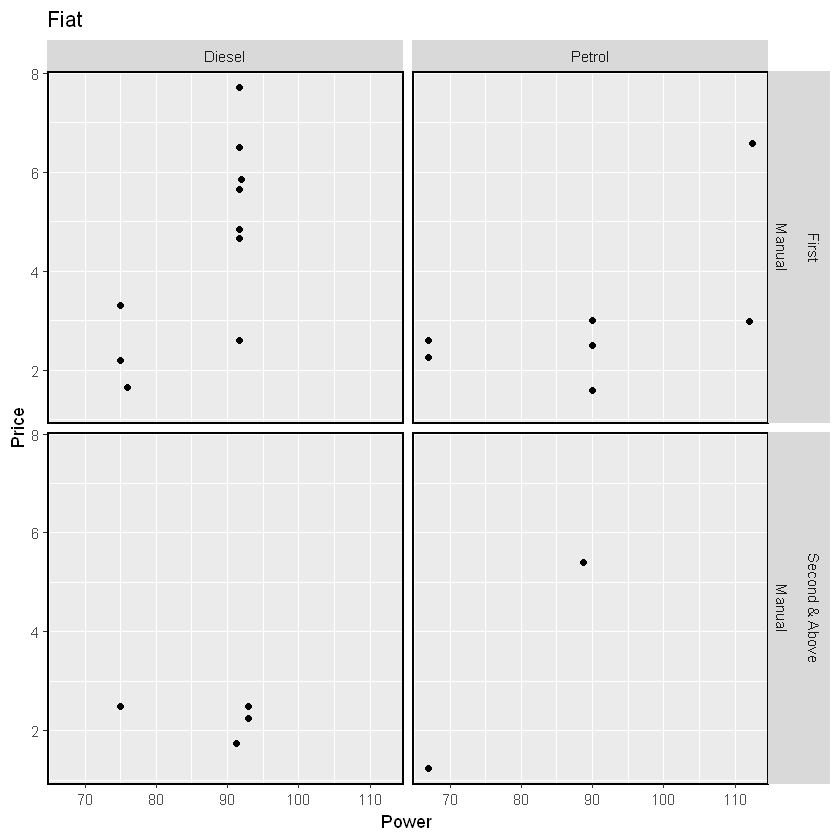

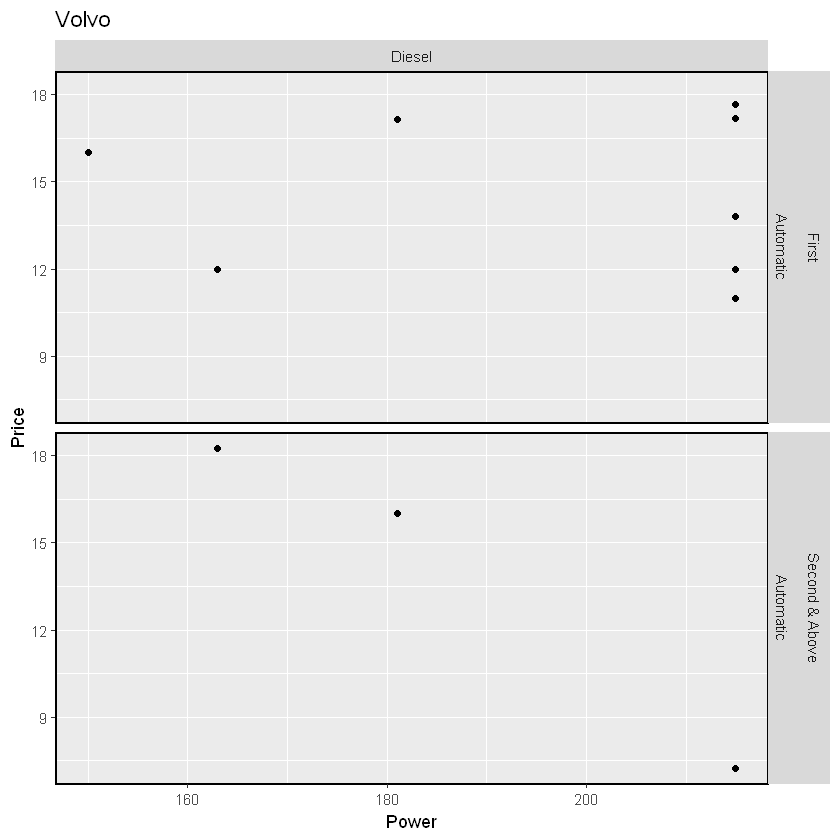

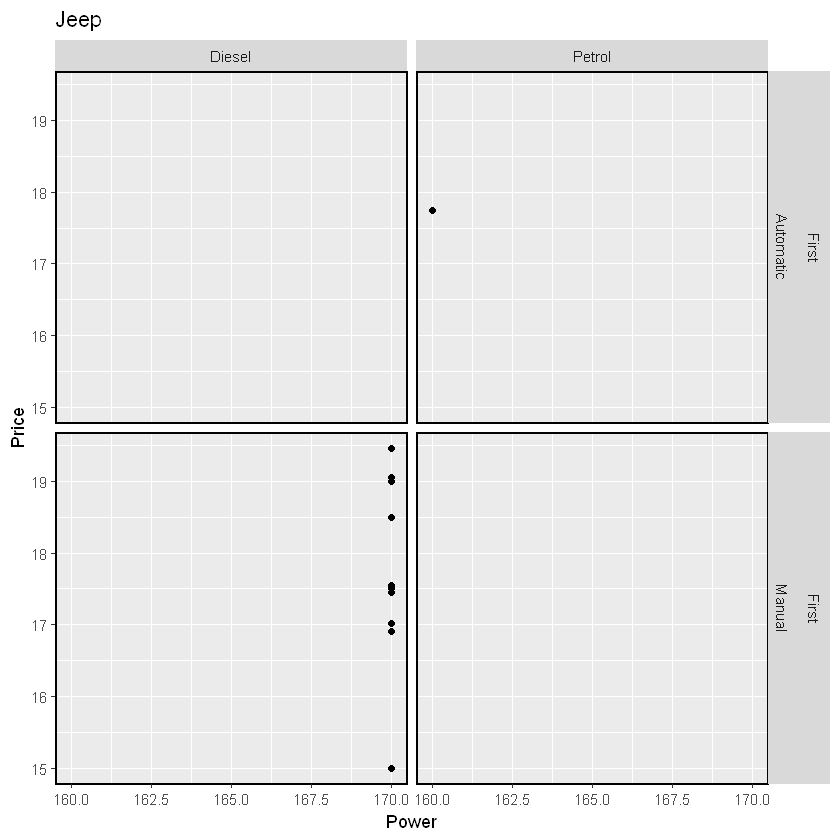

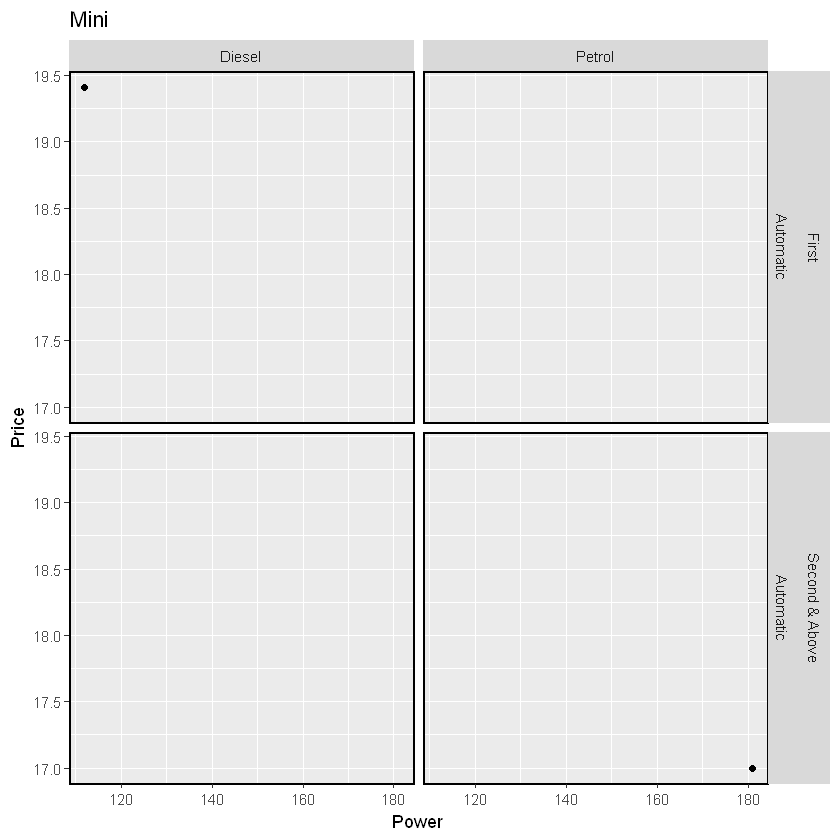

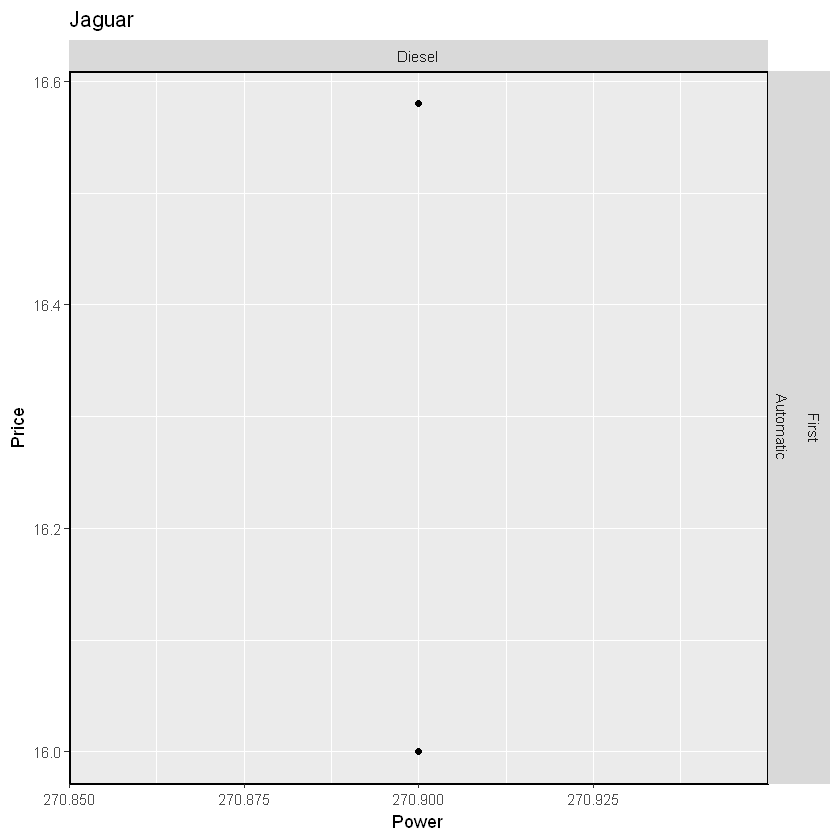

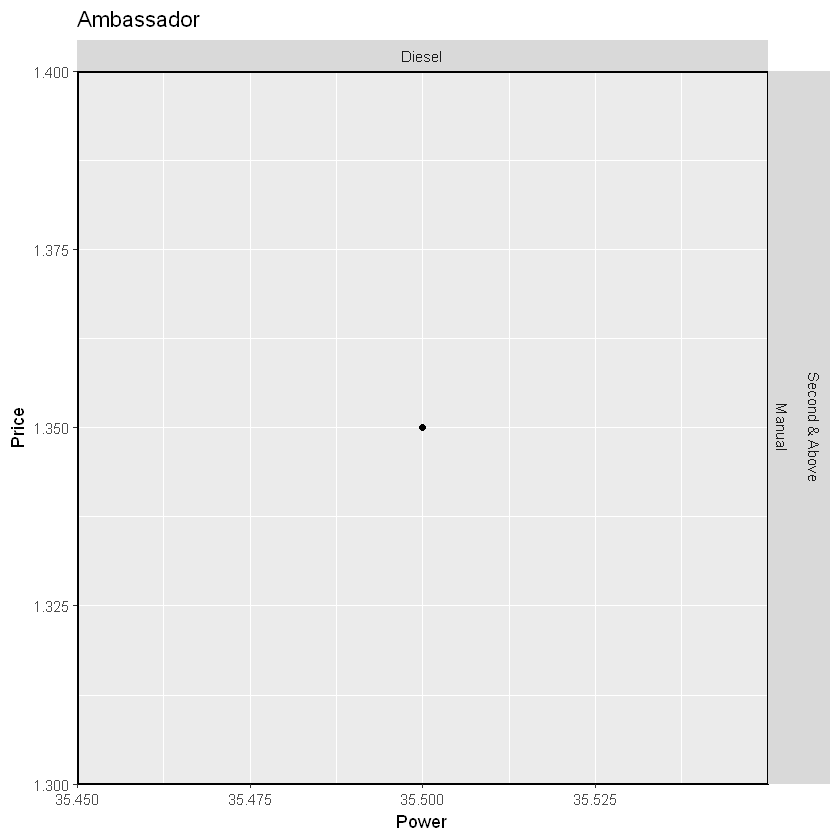

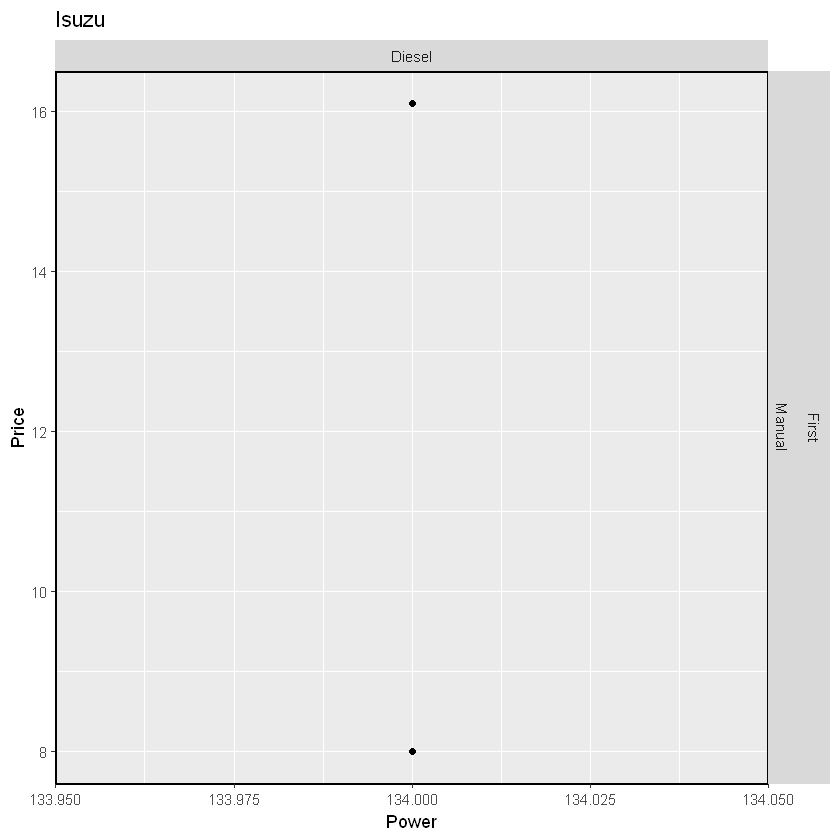

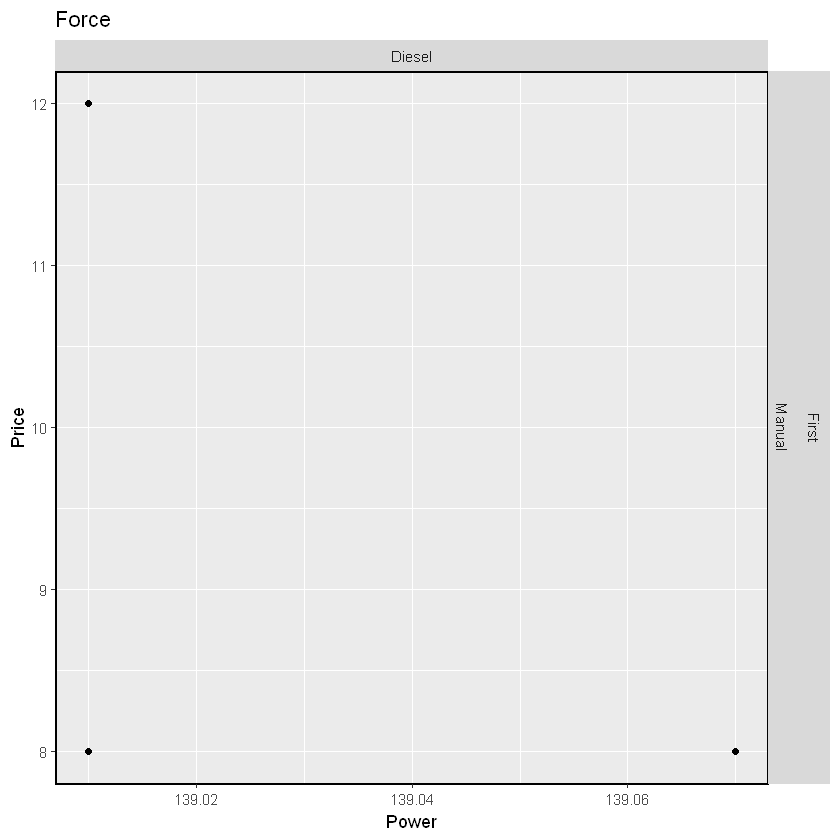

In [89]:
for (I in  unique( data$Mark)){
    d1 <- subset( data , data$Mark ==I[[1]])
     
    fig1 <- qplot(x=Power , y = Price   , data = d1 ,main =I[[1]]   )  + geom_point() + facet_grid( Owner_Type ~ Transmission ~ Fuel_Type  ) +
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 1) )
    print(fig1 )
    
}

Просмотр Boxplot для комбинаций различных факторов

Boxplot цены с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type 

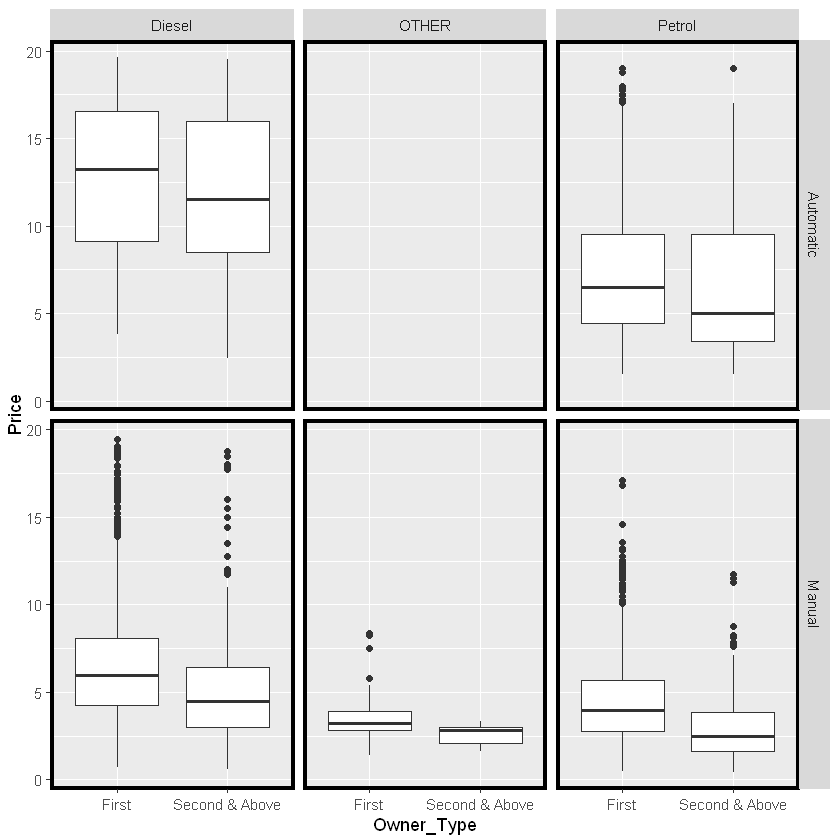

In [35]:
fig <- qplot(x = Owner_Type , y = Price   , data = data ,geom=c("boxplot" ) )   + facet_grid( Transmission ~ Fuel_Type)+
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
fig
  

Boxplot цены  с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и YEAR

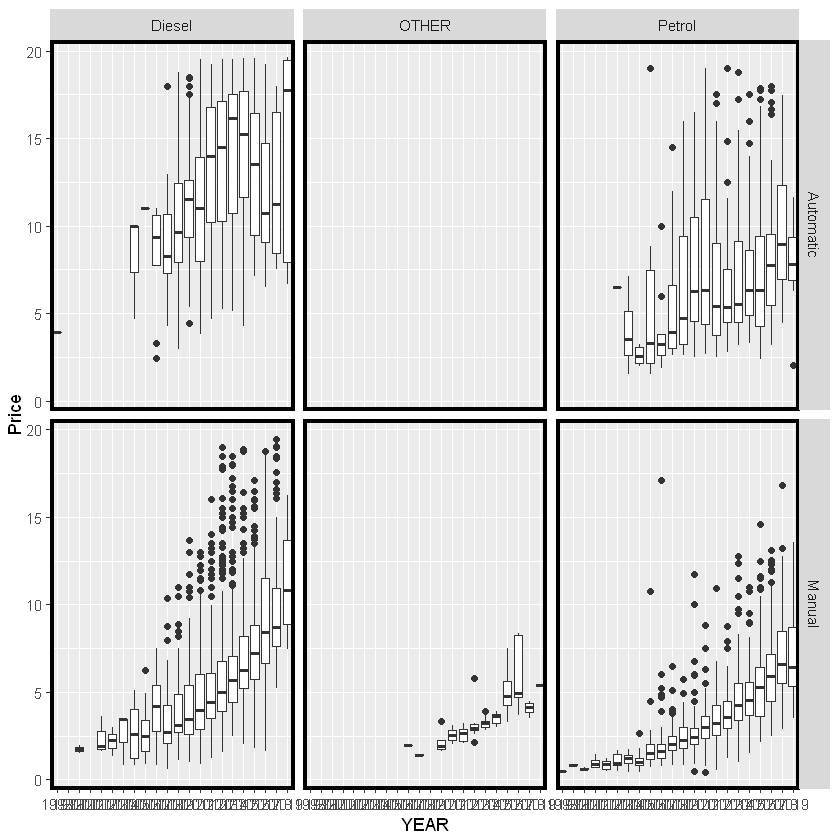

In [42]:
fig <- qplot(x = YEAR , y = Price   , data = data ,geom=c("boxplot" ) )   + facet_grid( Transmission ~ Fuel_Type)+
theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
fig

In [ ]:
Boxplot цены  с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и Mark

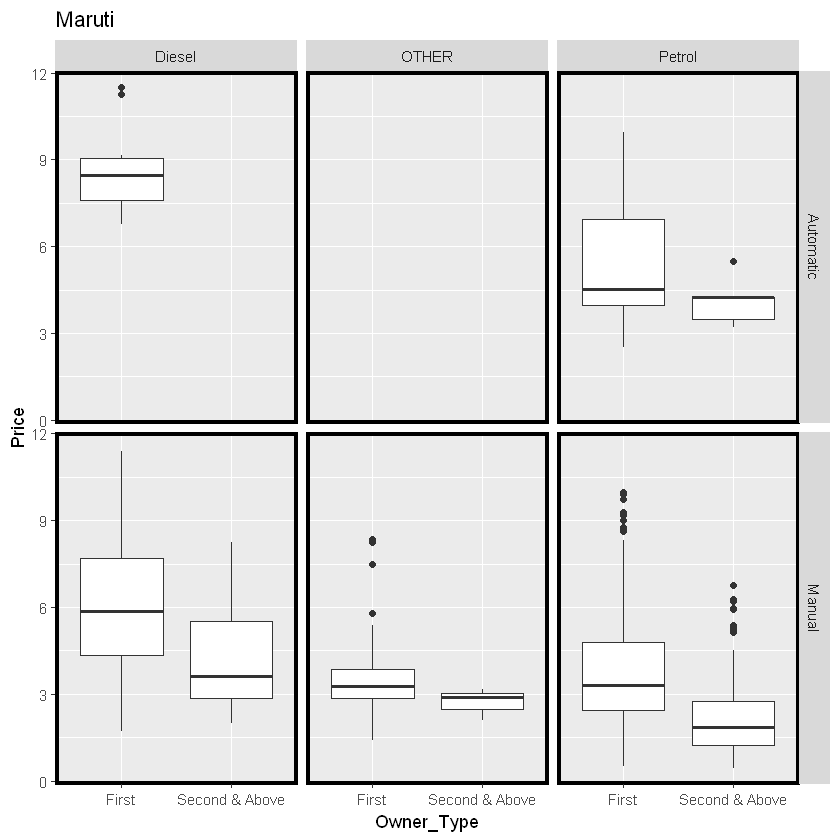

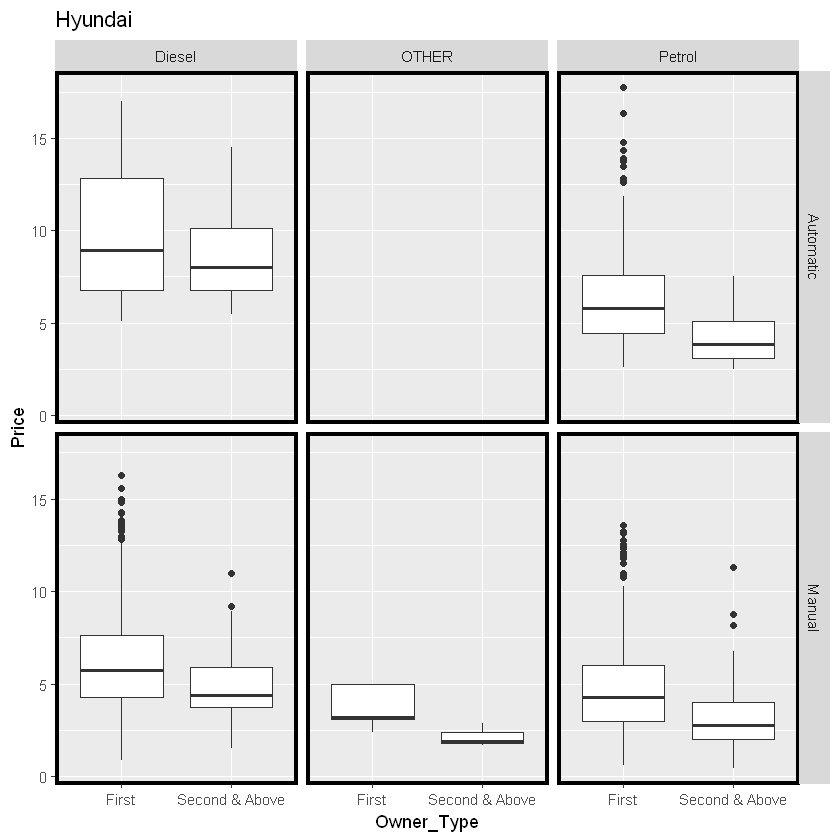

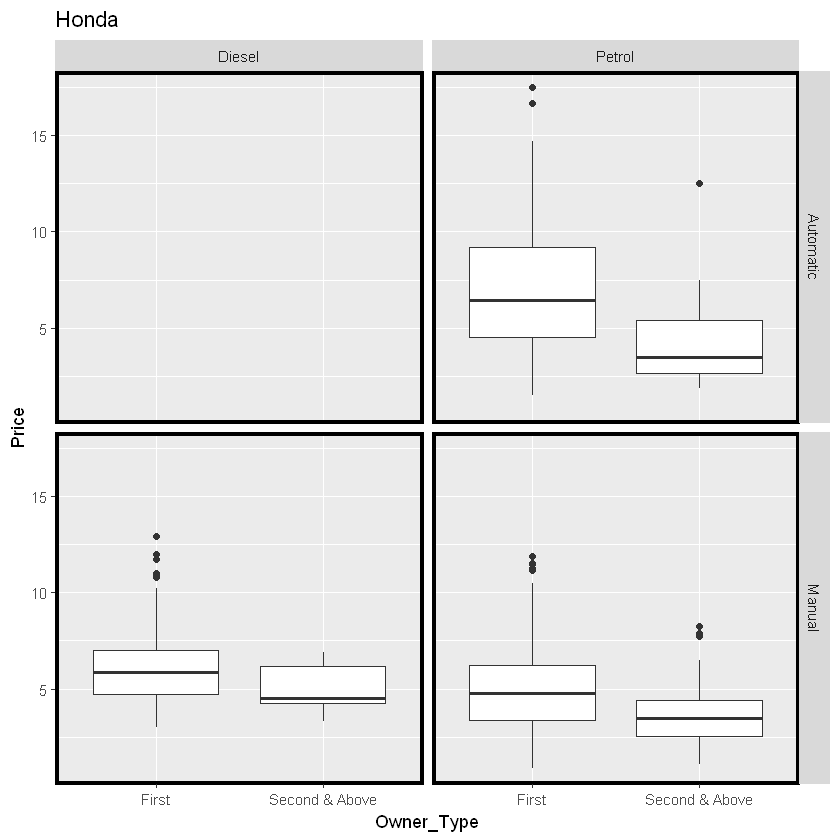

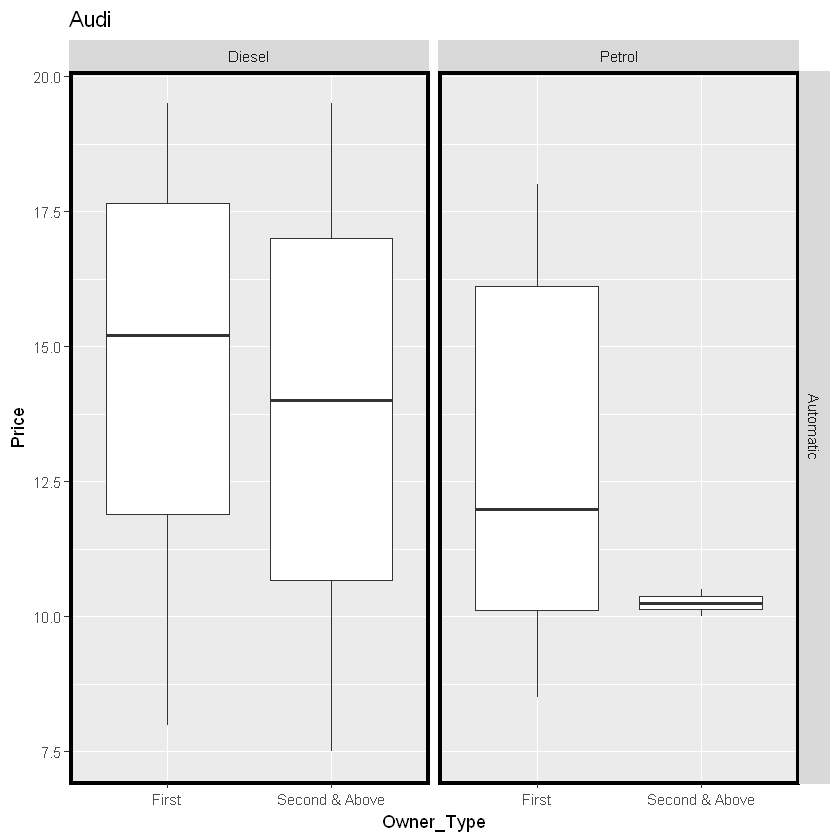

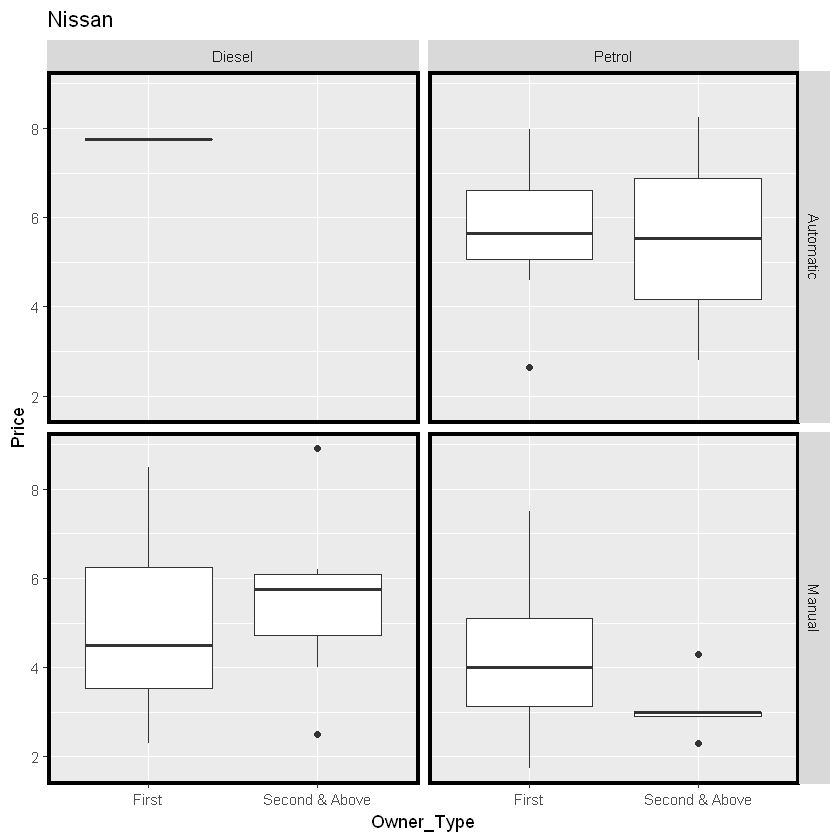

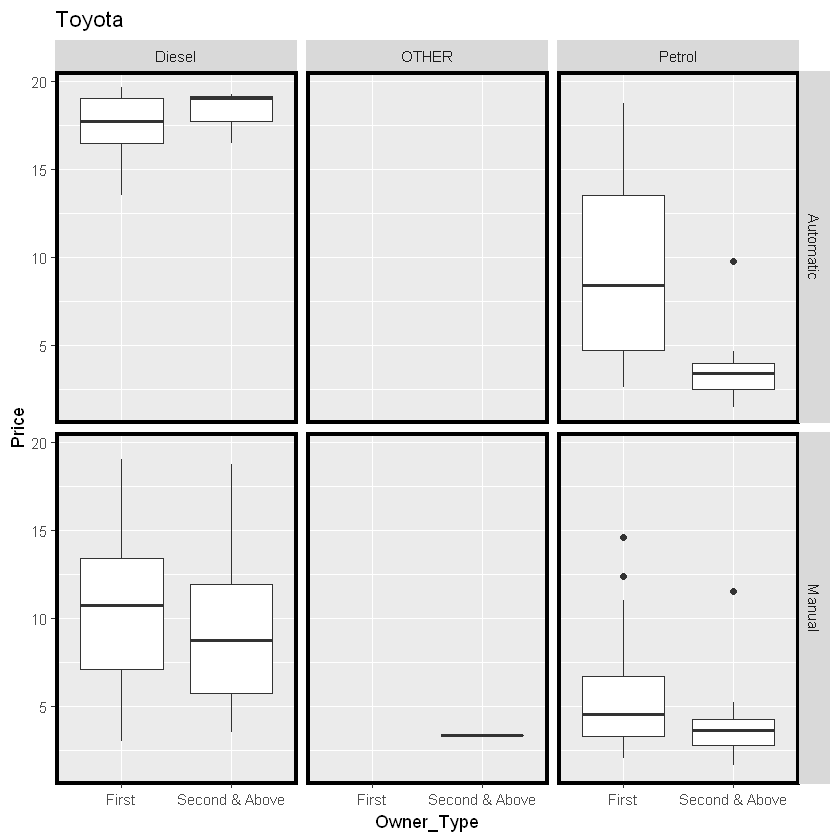

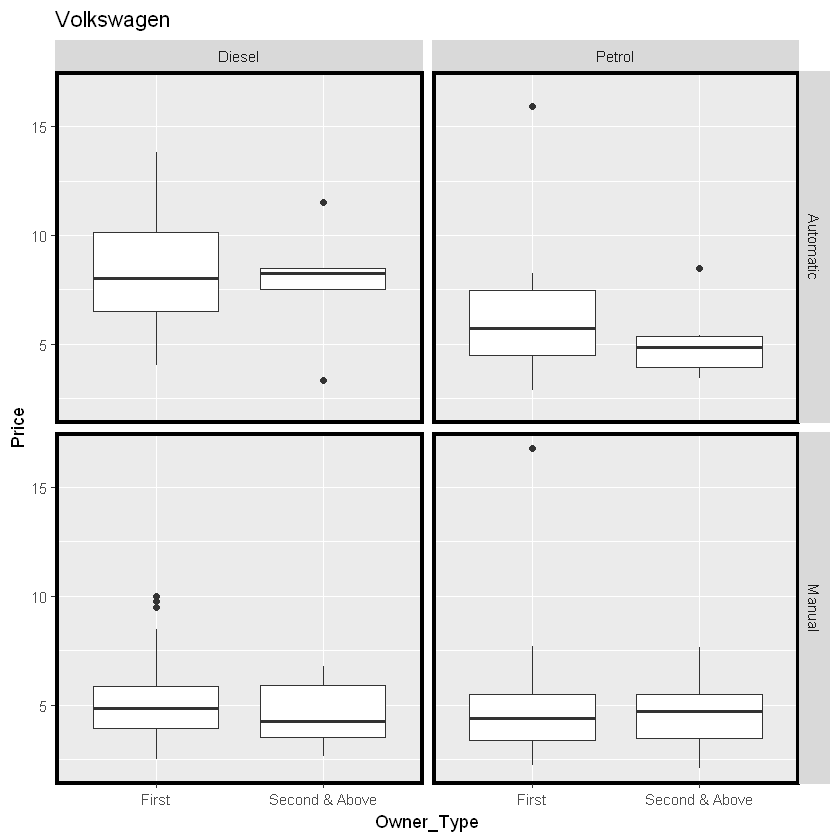

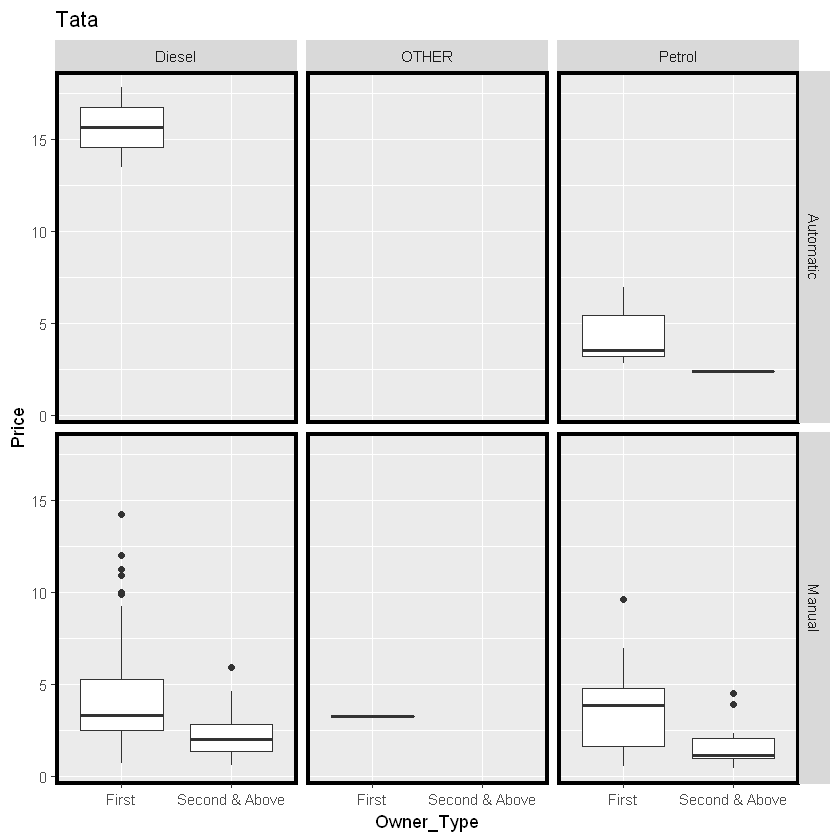

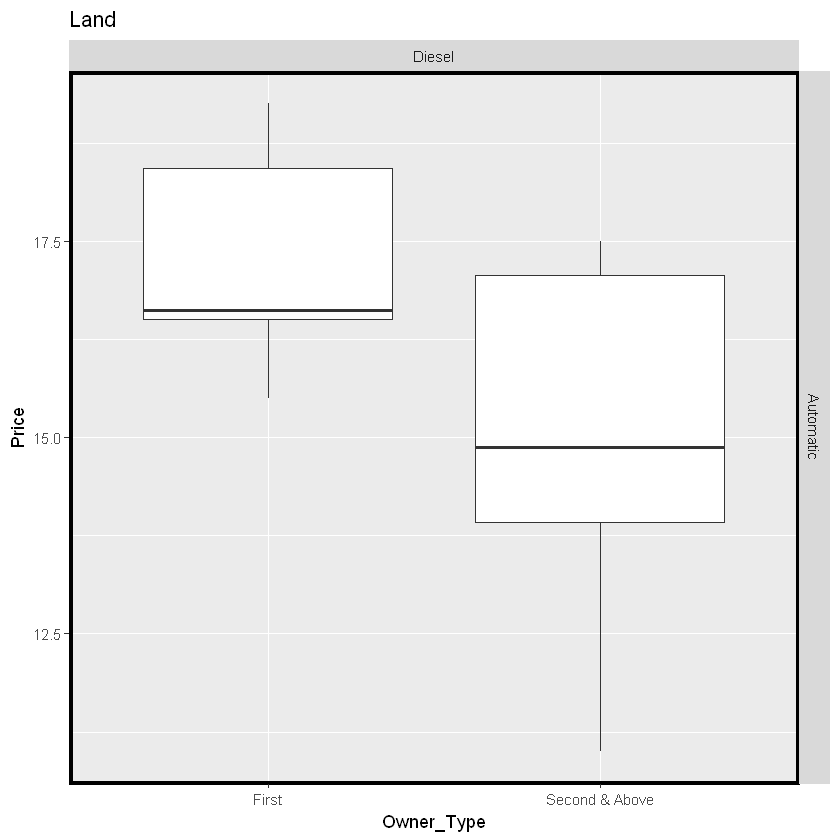

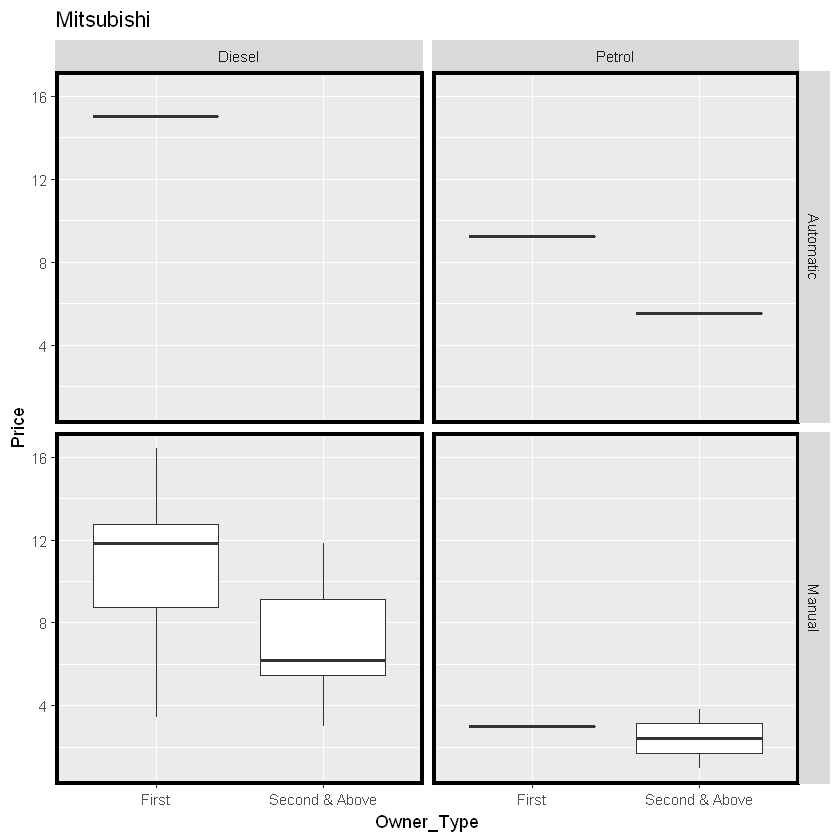

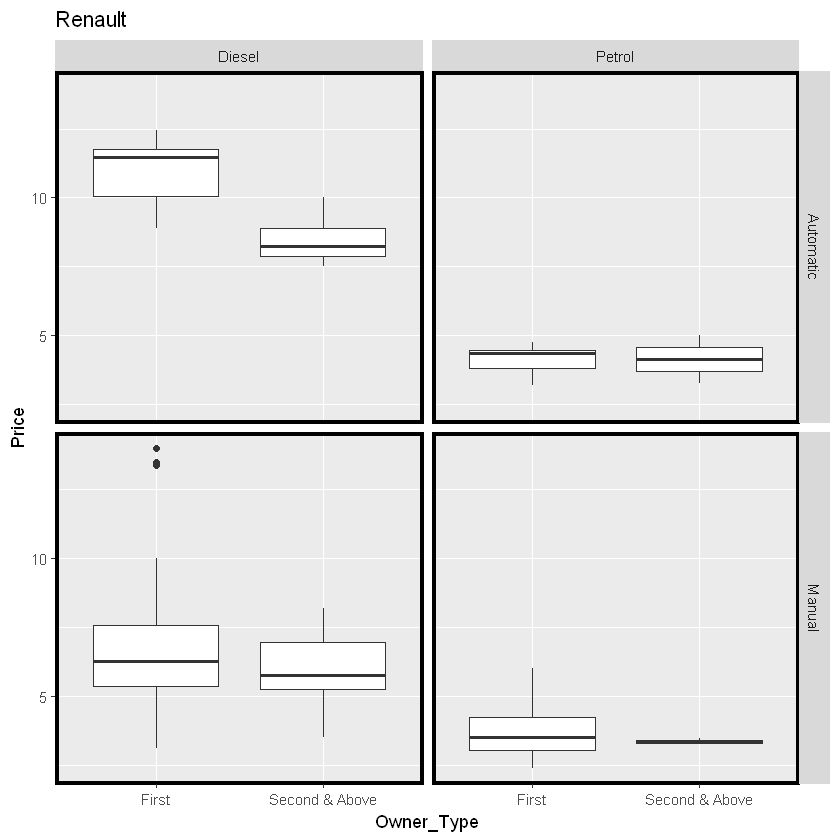

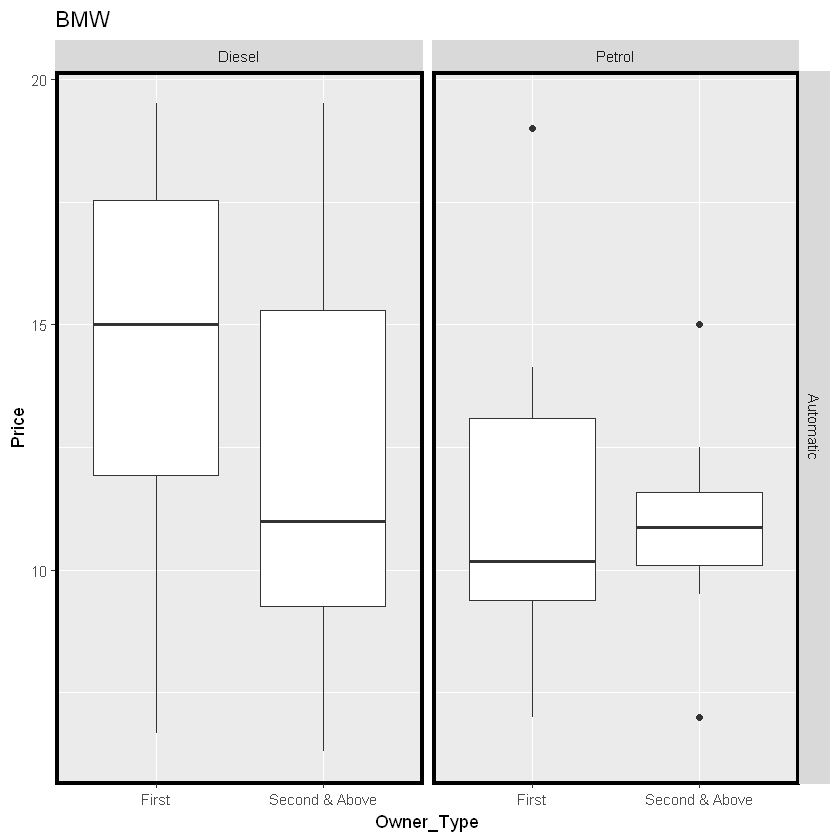

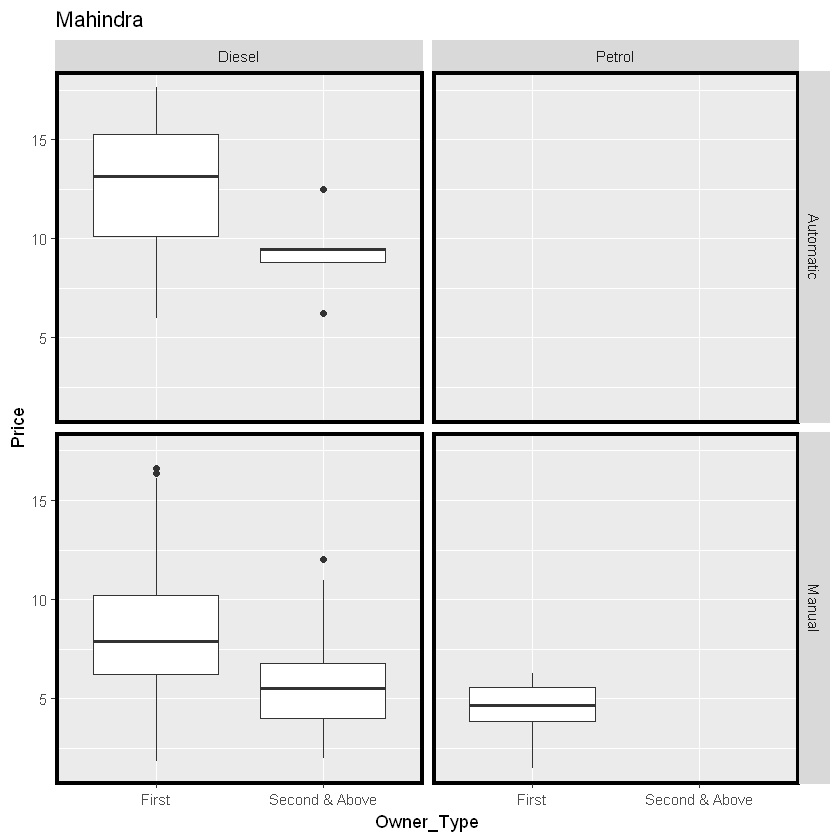

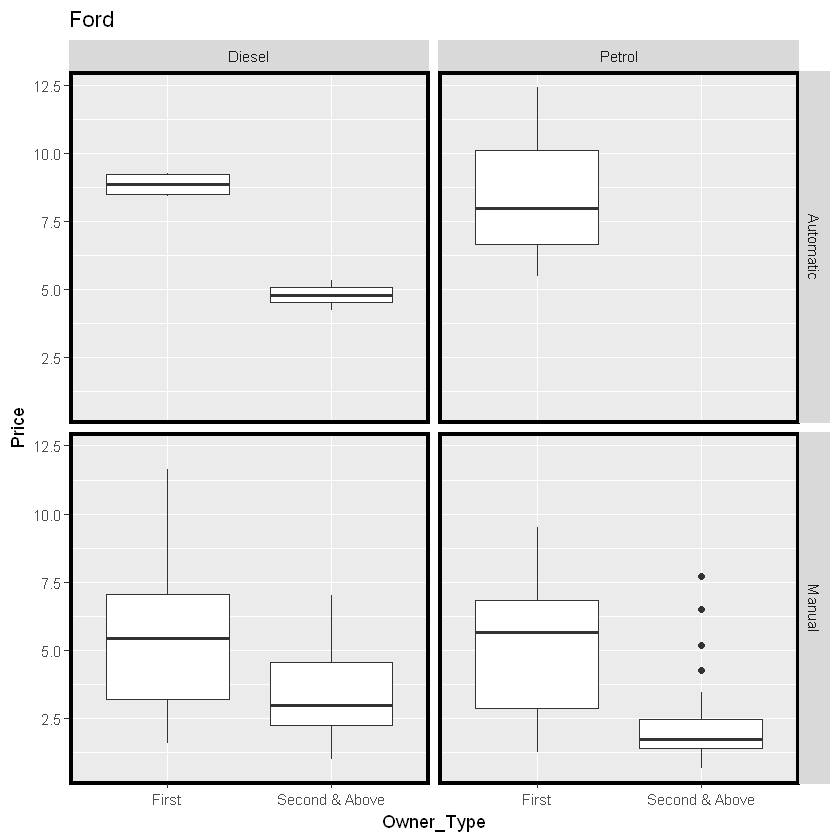

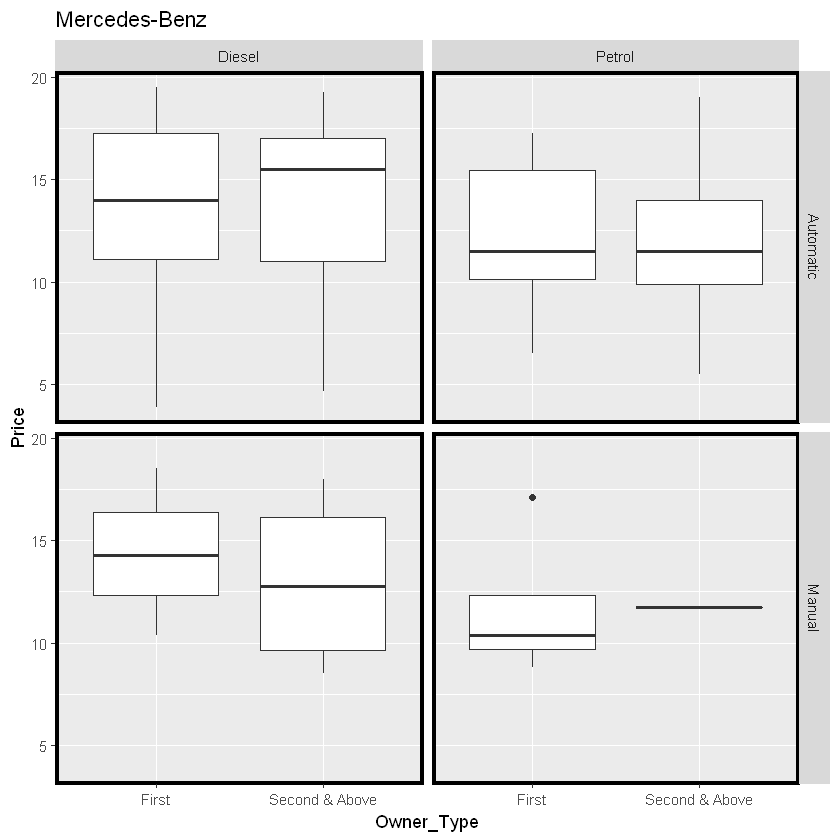

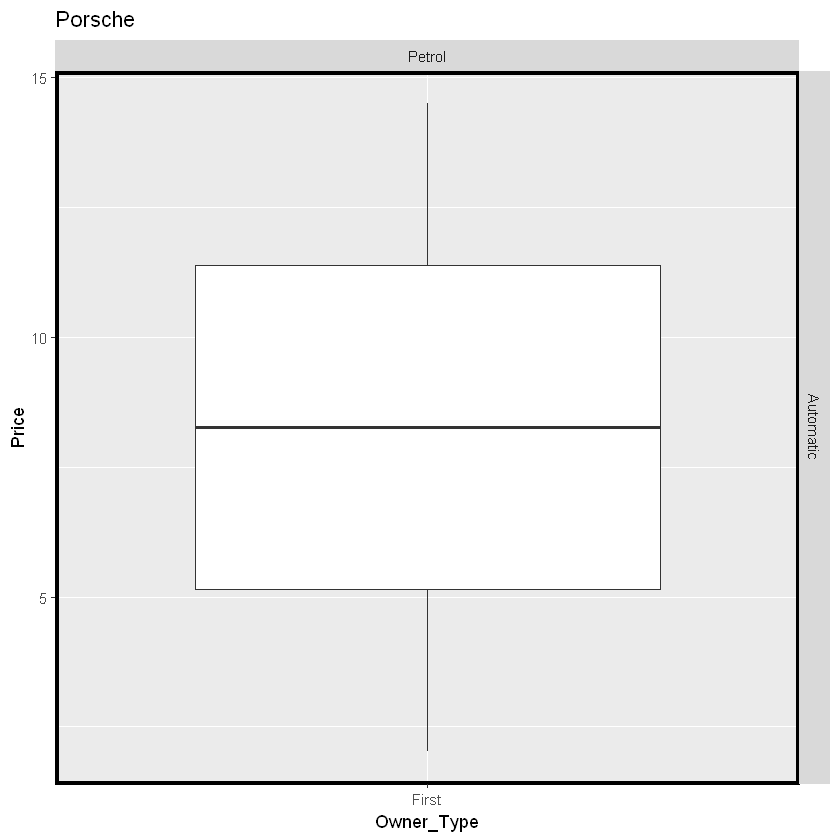

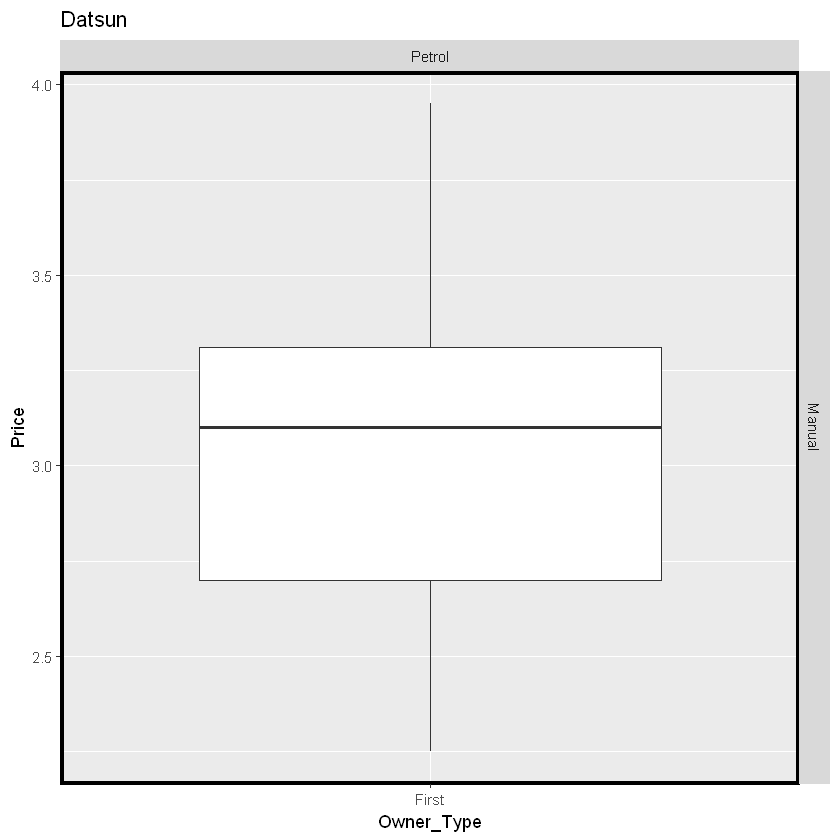

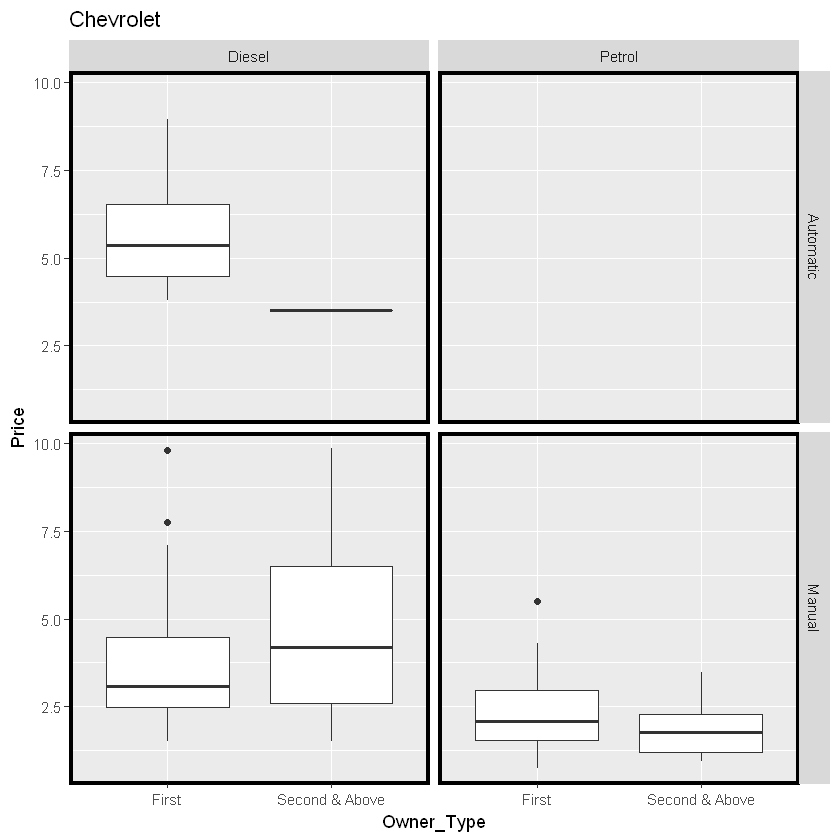

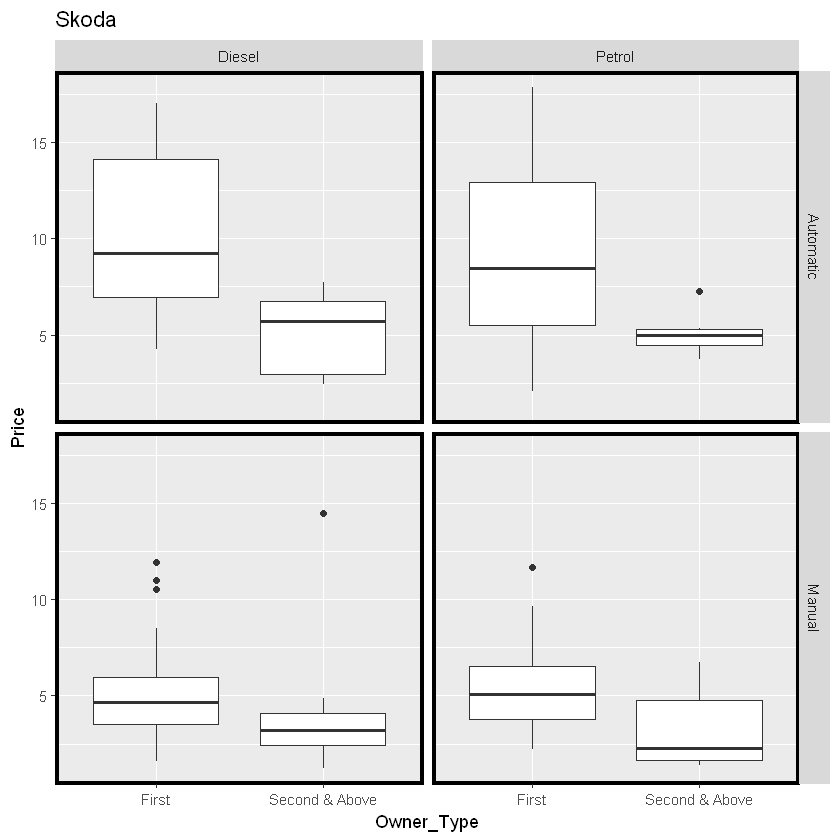

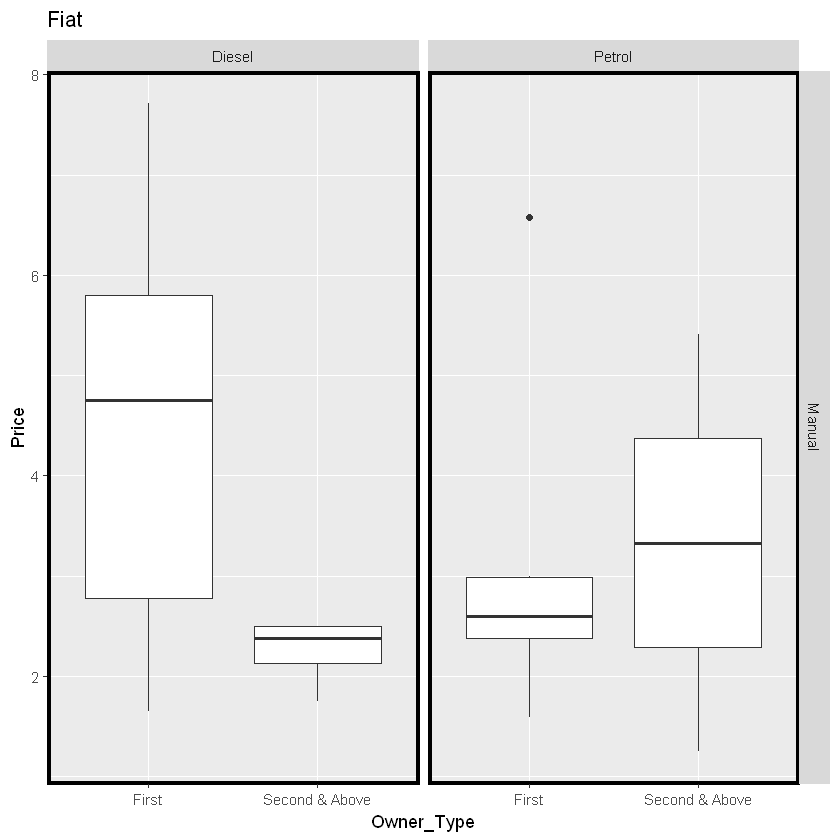

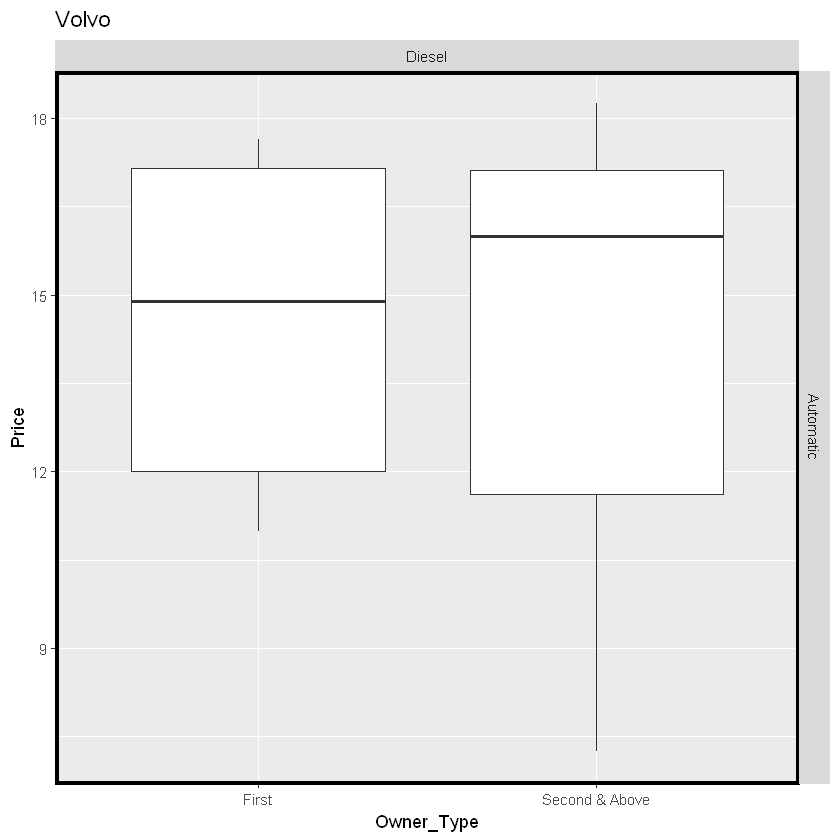

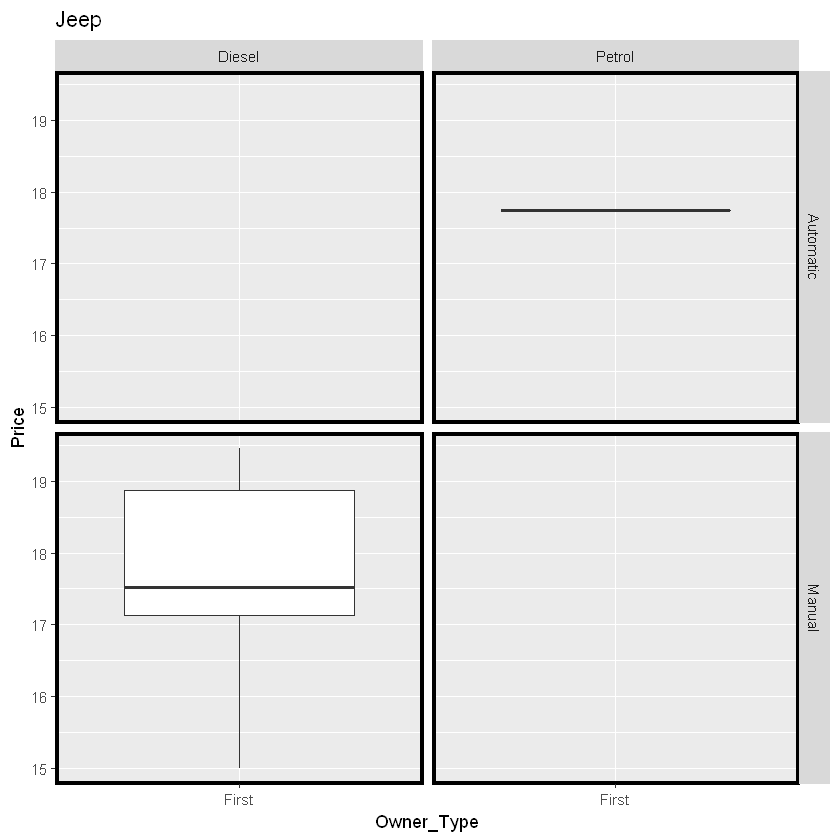

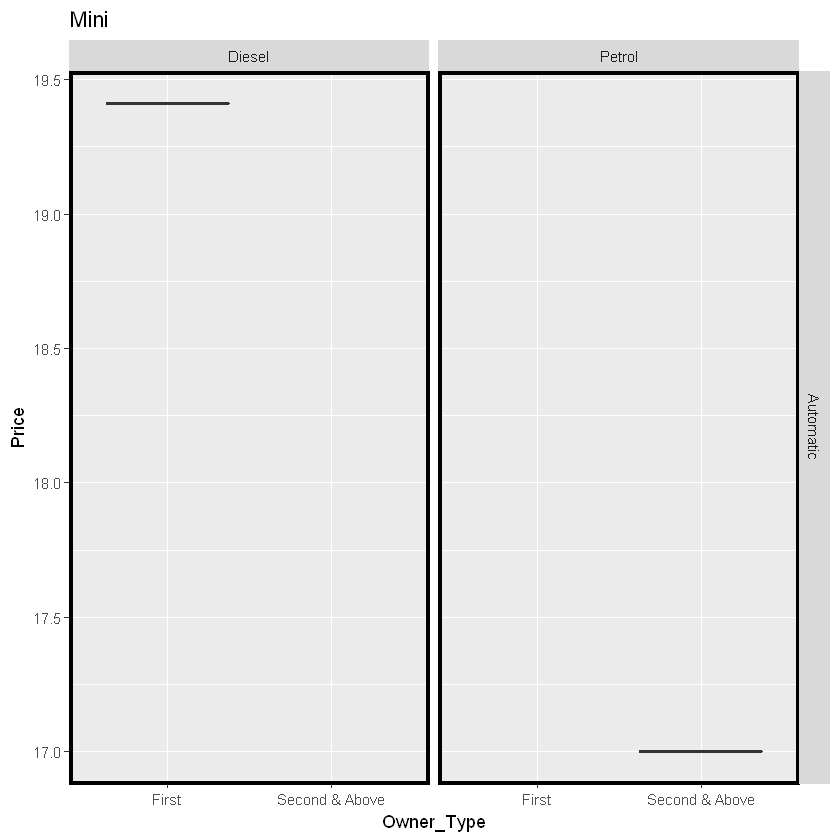

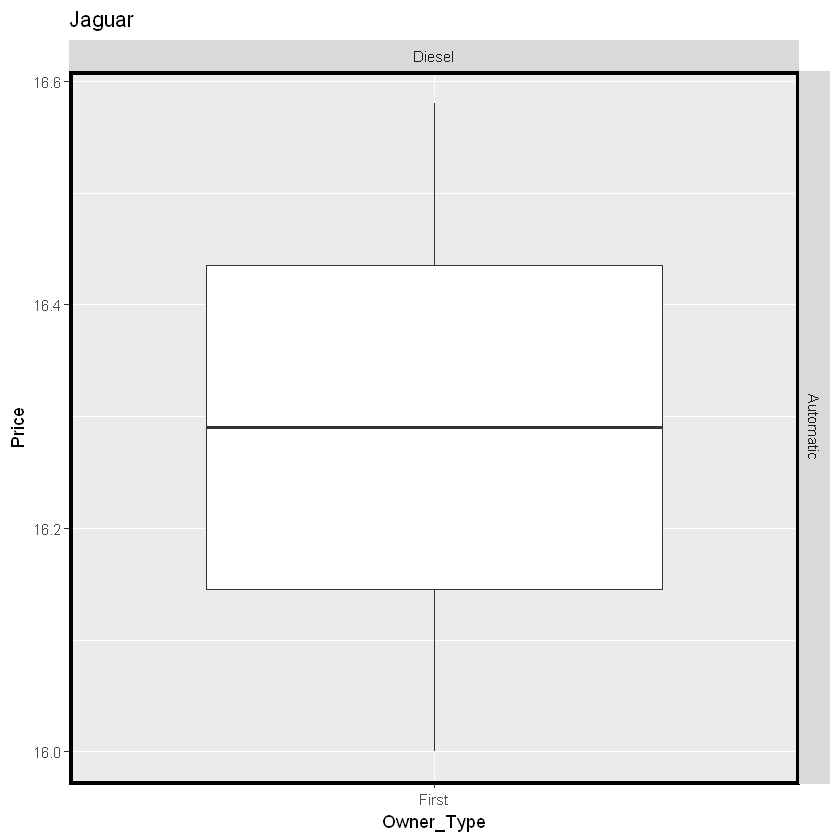

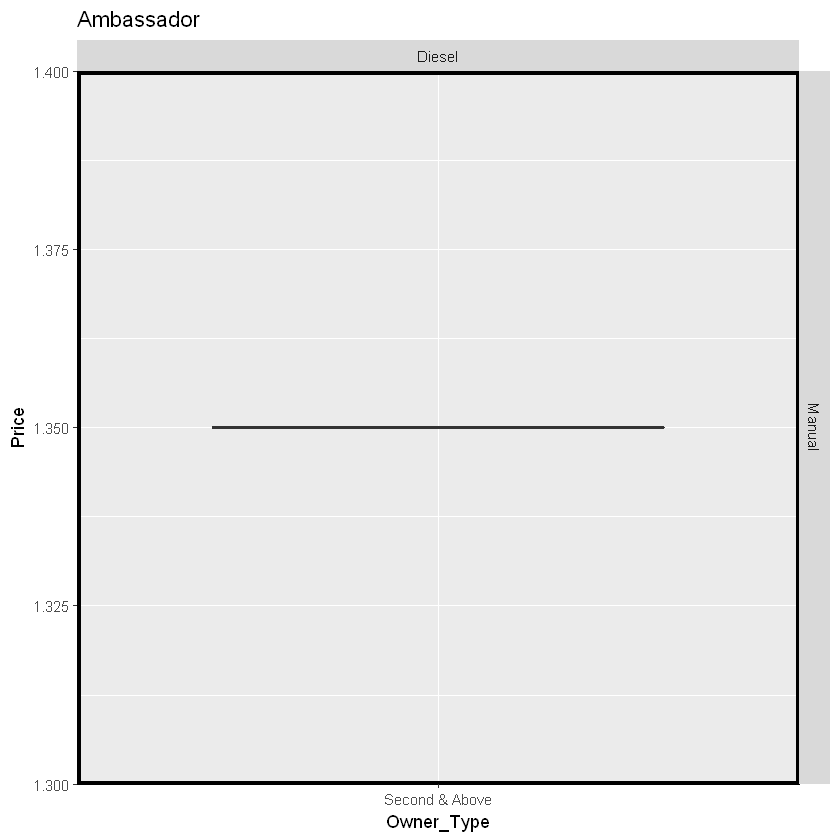

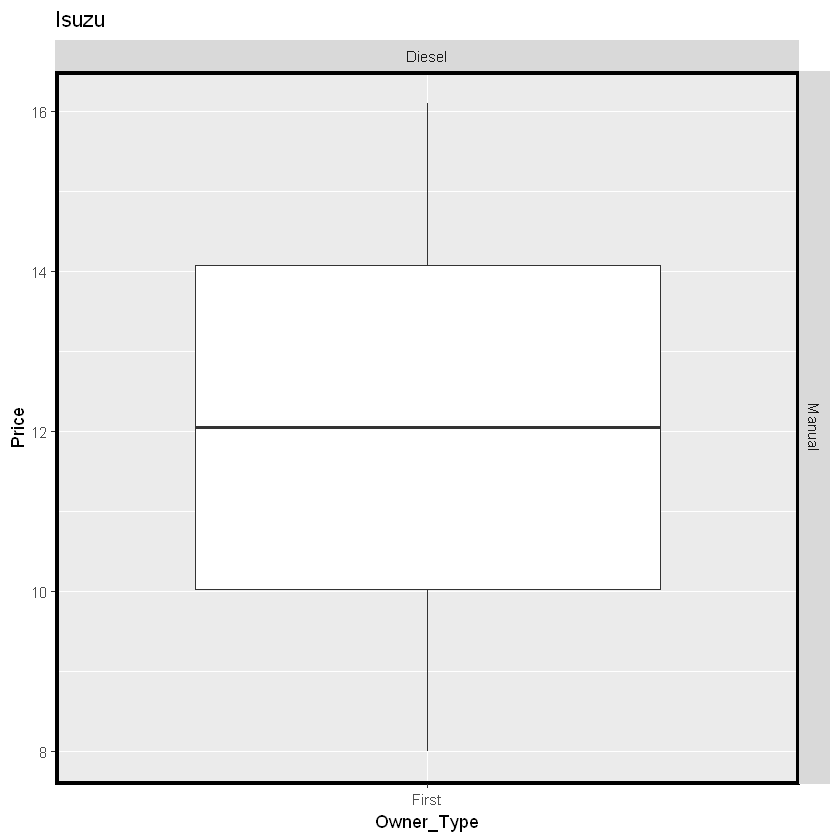

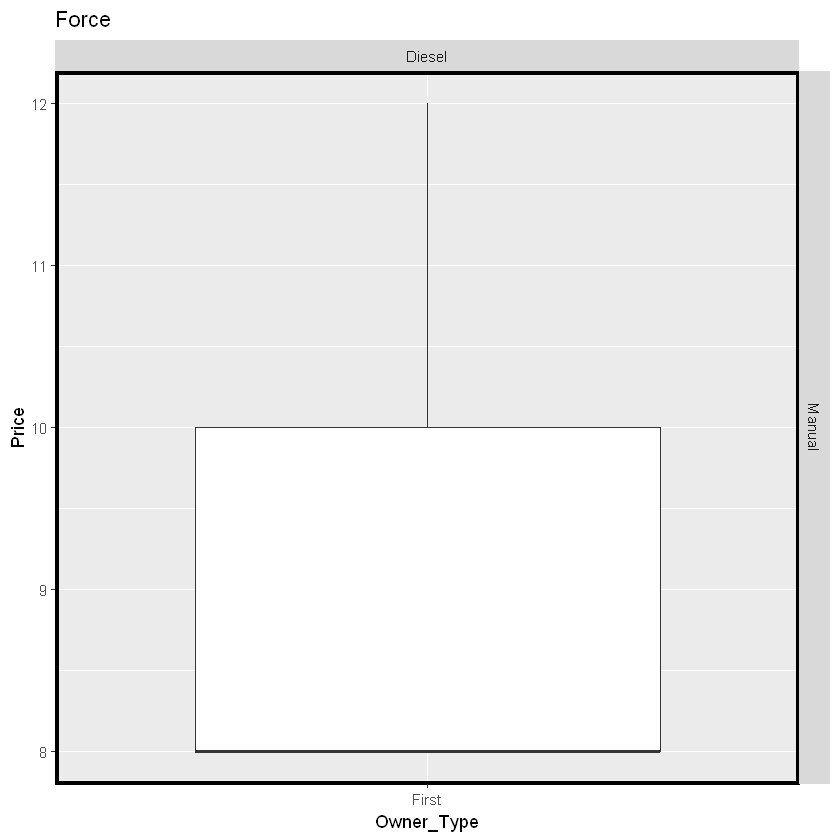

In [79]:
 
for (I in  unique( data$Mark)){
    d1 <- subset( data , data$Mark ==I[[1]])
     
    fig1 <- qplot(x = Owner_Type , y = Price   , data = d1 ,geom=c("boxplot" ) , main = I[[1]]  )   + facet_grid( Transmission ~ Fuel_Type)+
    theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
    print(fig1 )
    
}

Boxplot цены  с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и Location

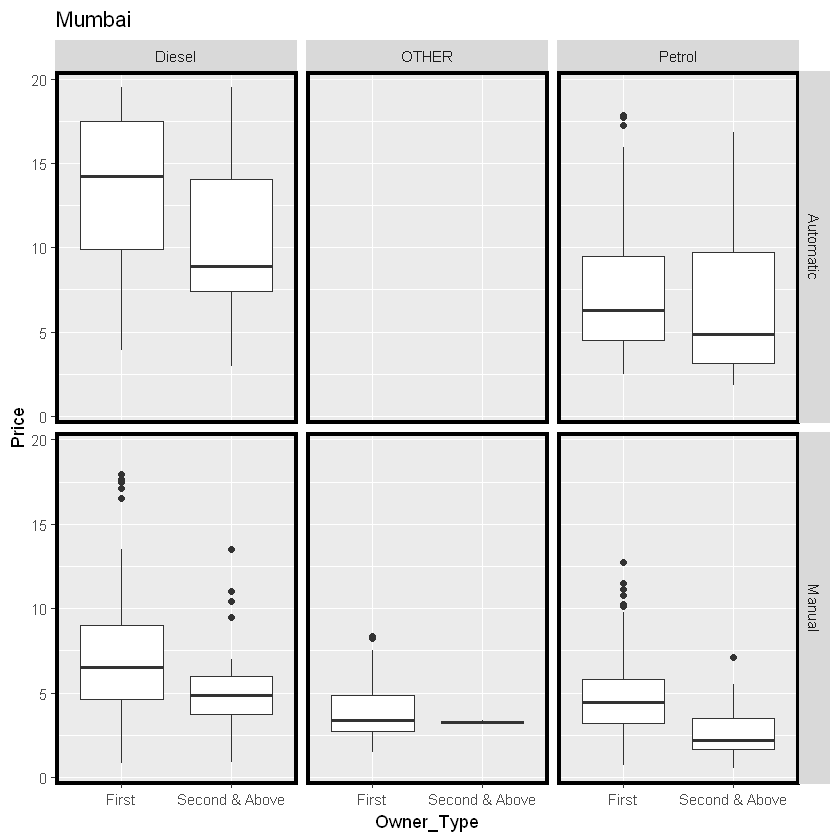

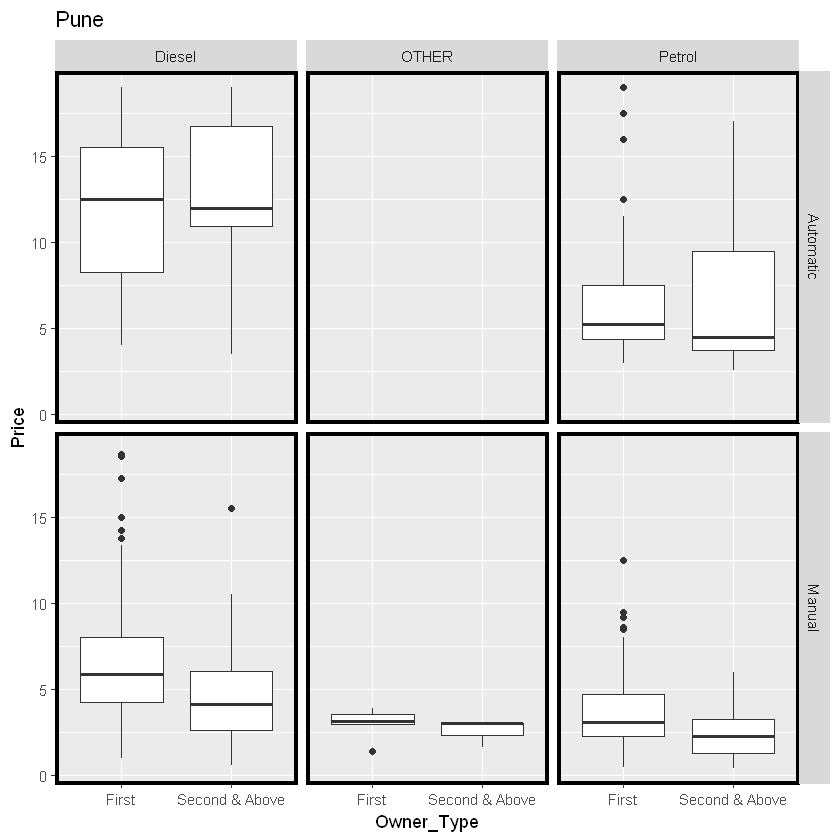

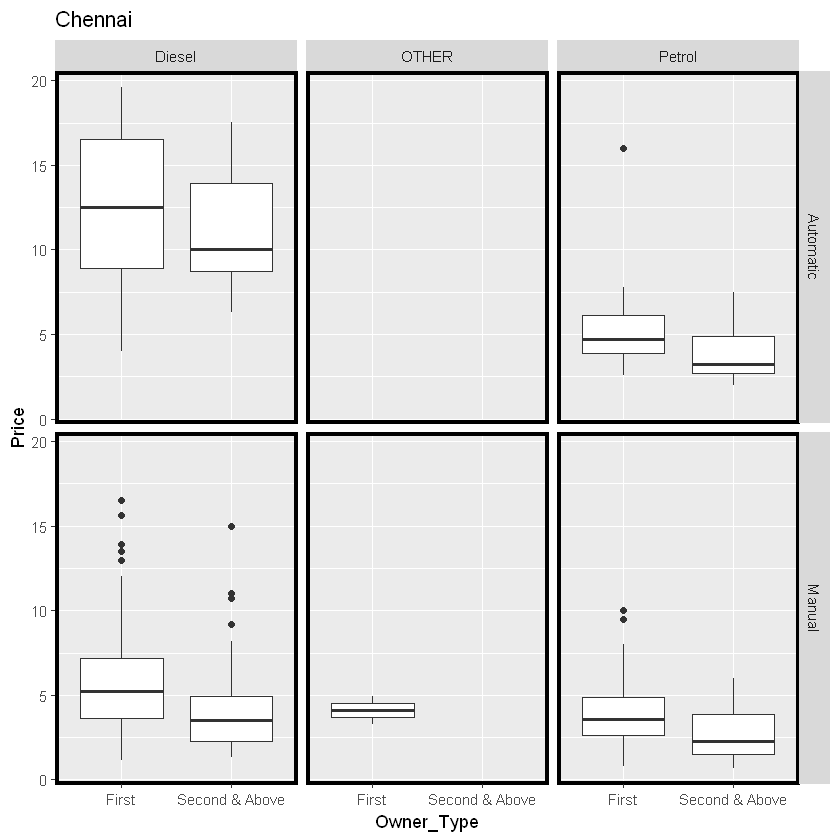

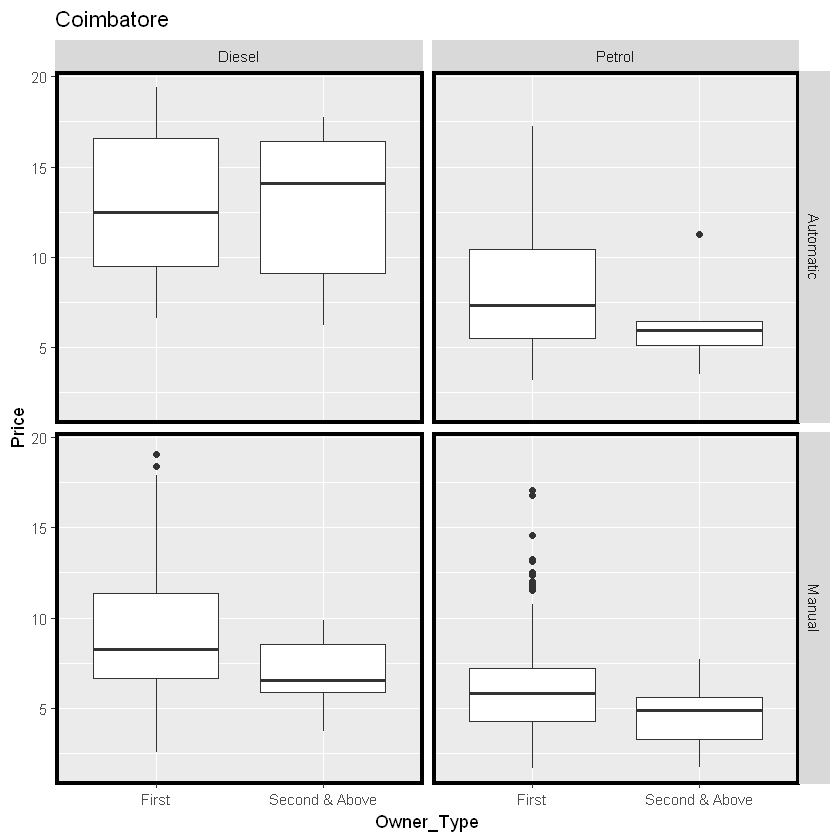

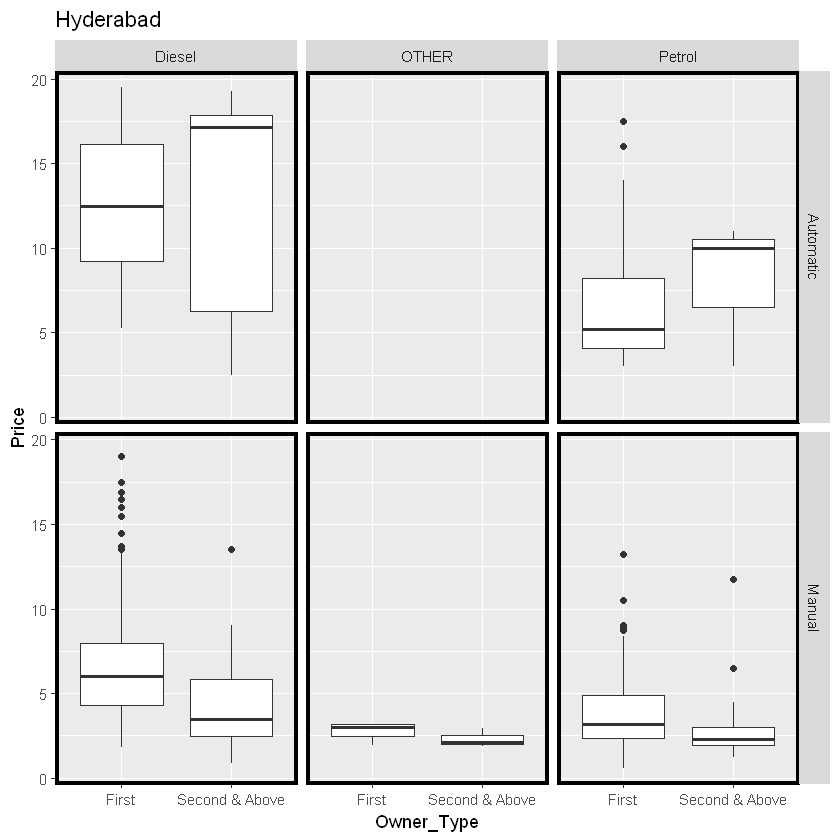

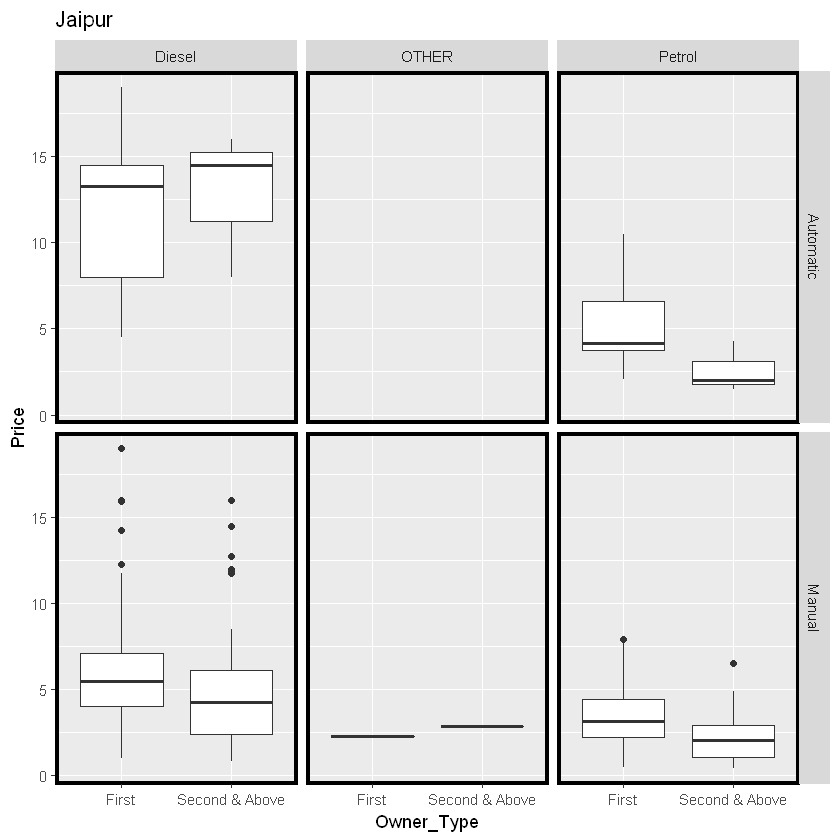

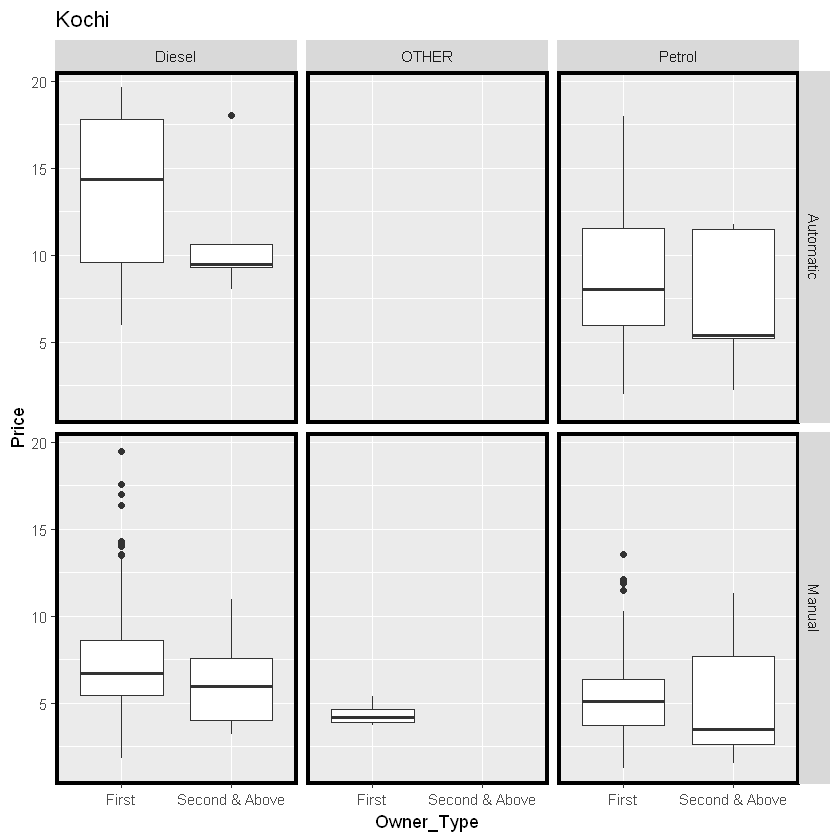

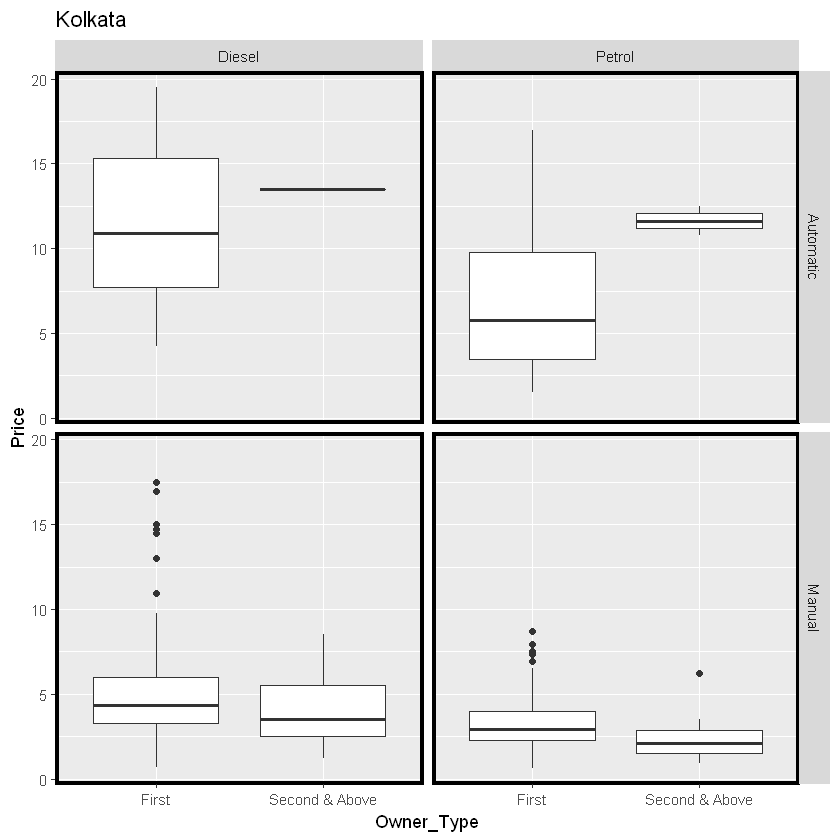

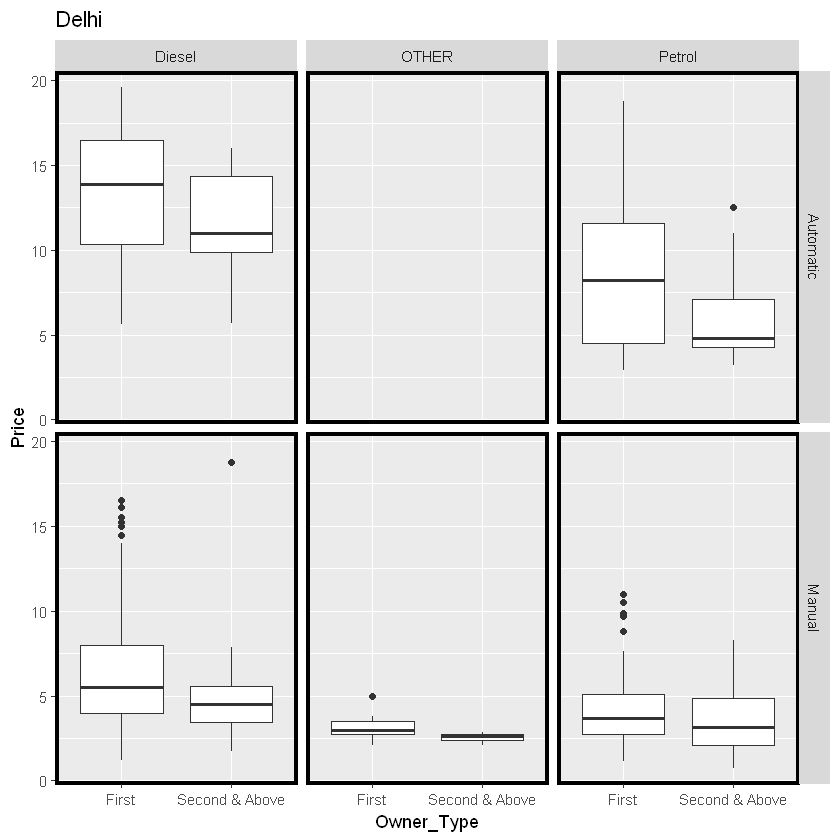

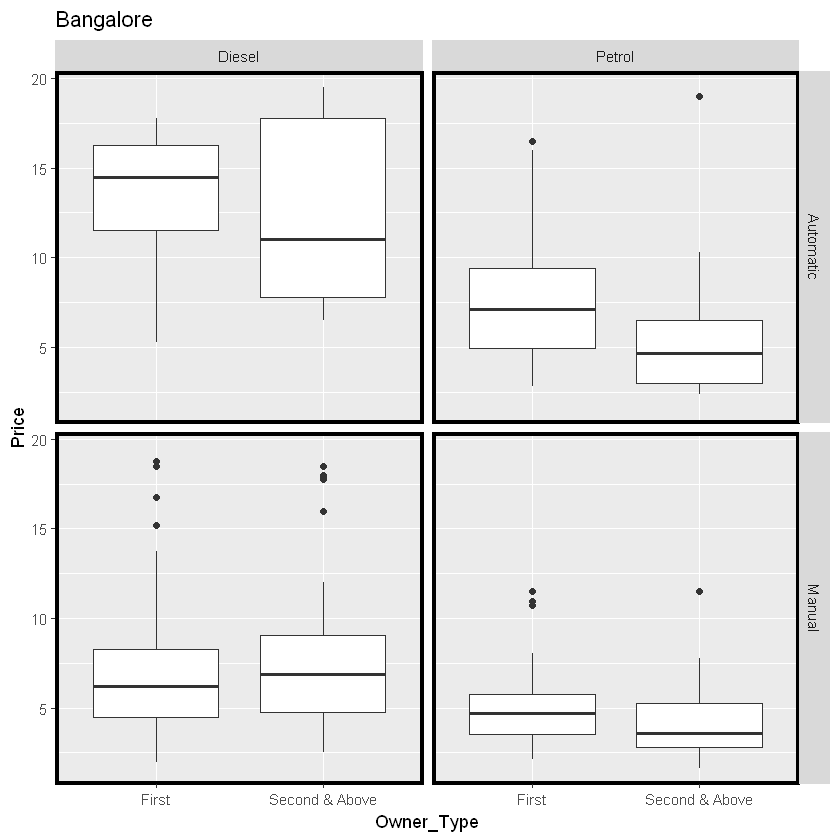

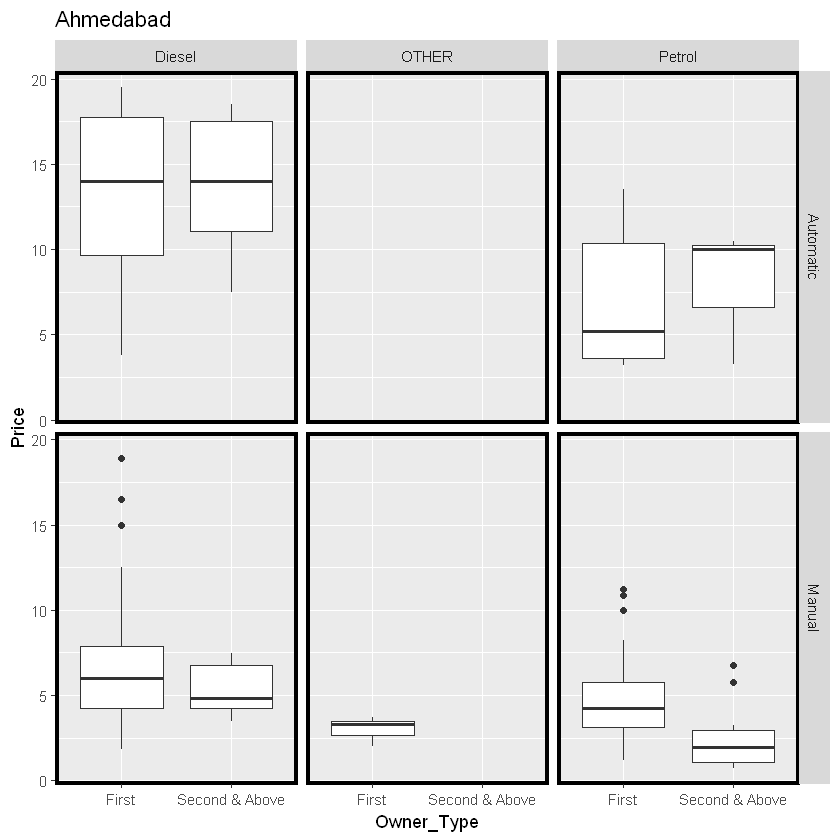

In [82]:
  for (I in  unique( data$Location)){
    d1 <- subset( data , data$Location ==I[[1]])
     
    fig1 <- qplot(x = Owner_Type  , y = Price   , data = d1 ,geom=c("boxplot" ) , main = I[[1]]  )   + facet_grid( Transmission ~ Fuel_Type)+
    theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
    print(fig1 )
    
}

Boxplot цены  с учетом взамодействий Owner_Type ~ Transmission ~ Fuel_Type и Location и Mark

Maruti   MumbaiMaruti   Pune

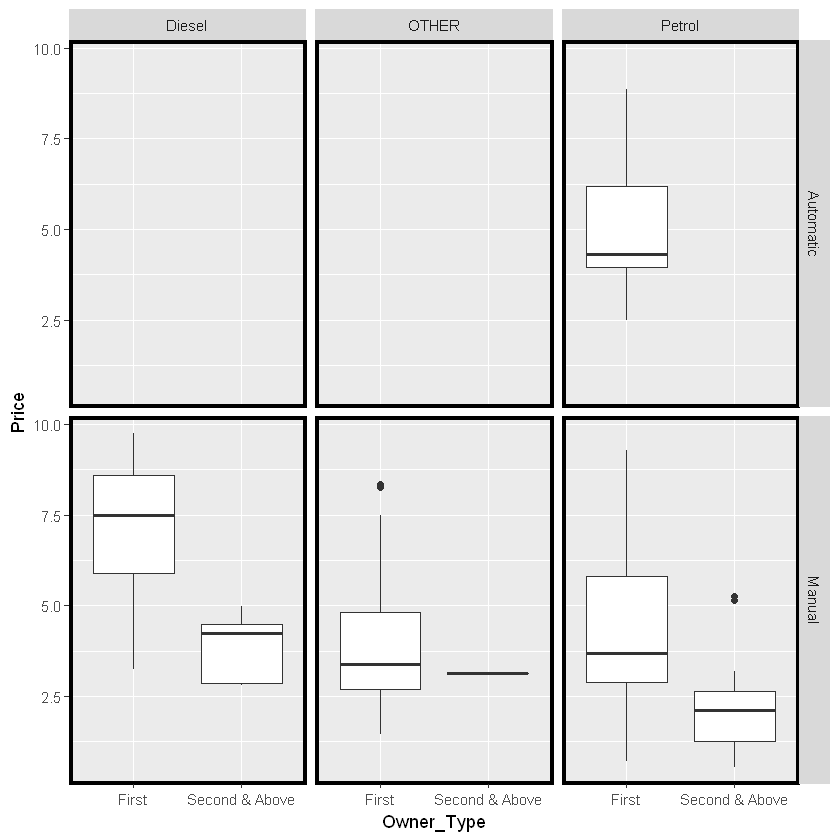

Maruti   Chennai

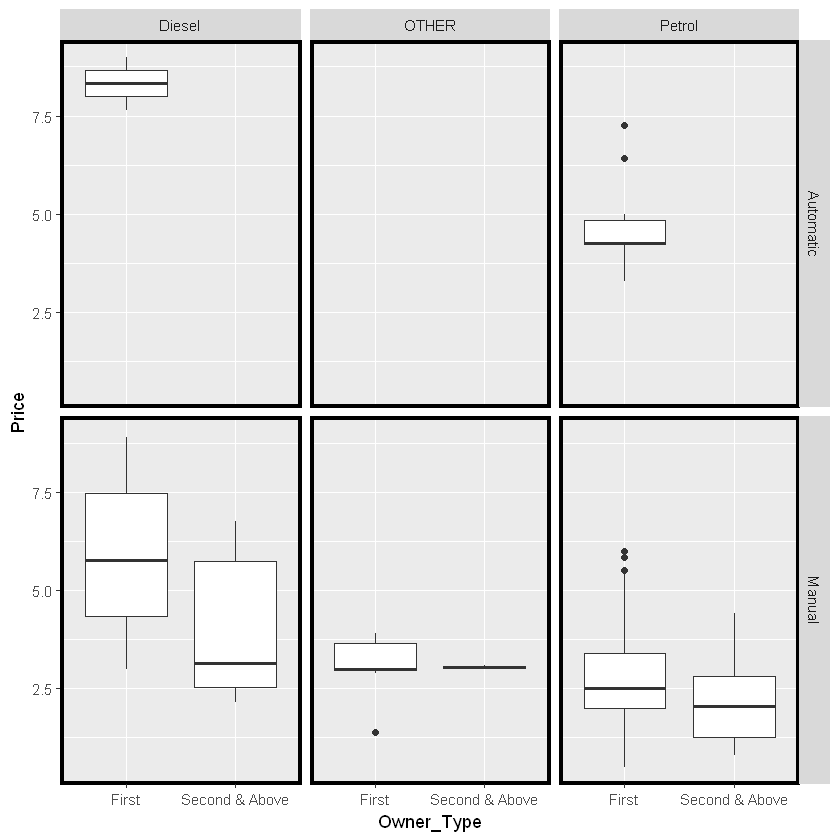

Maruti   Coimbatore

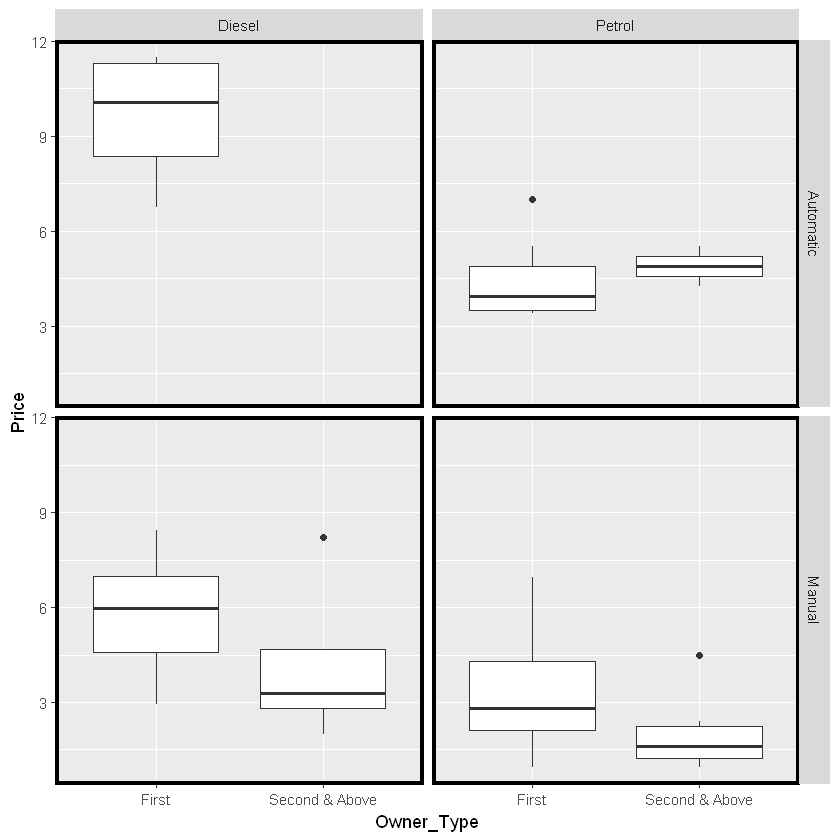

Maruti   Hyderabad

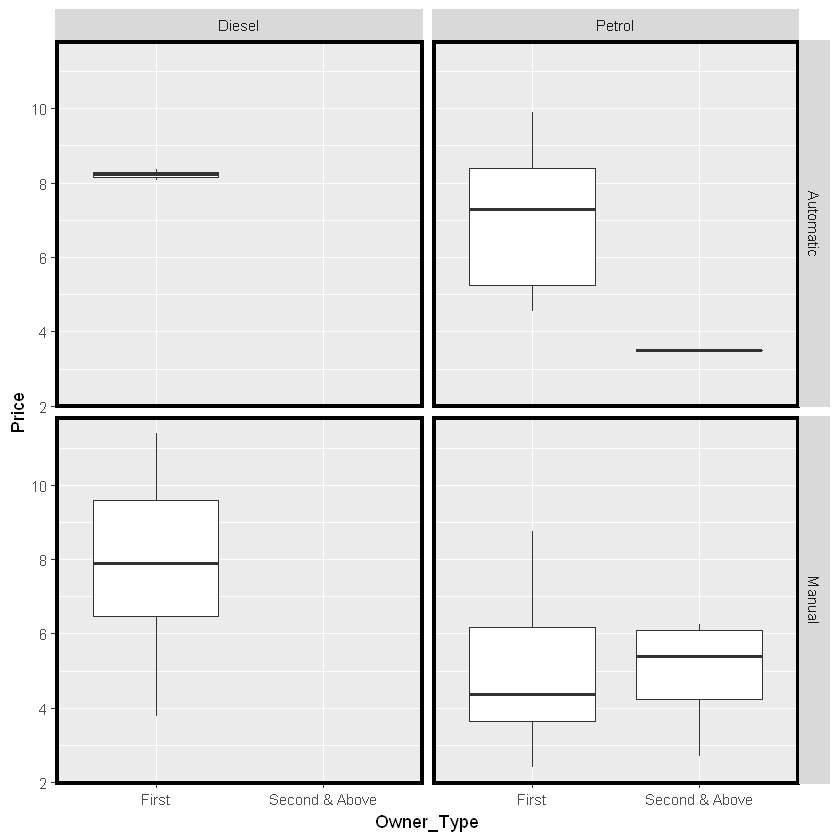

Maruti   Jaipur

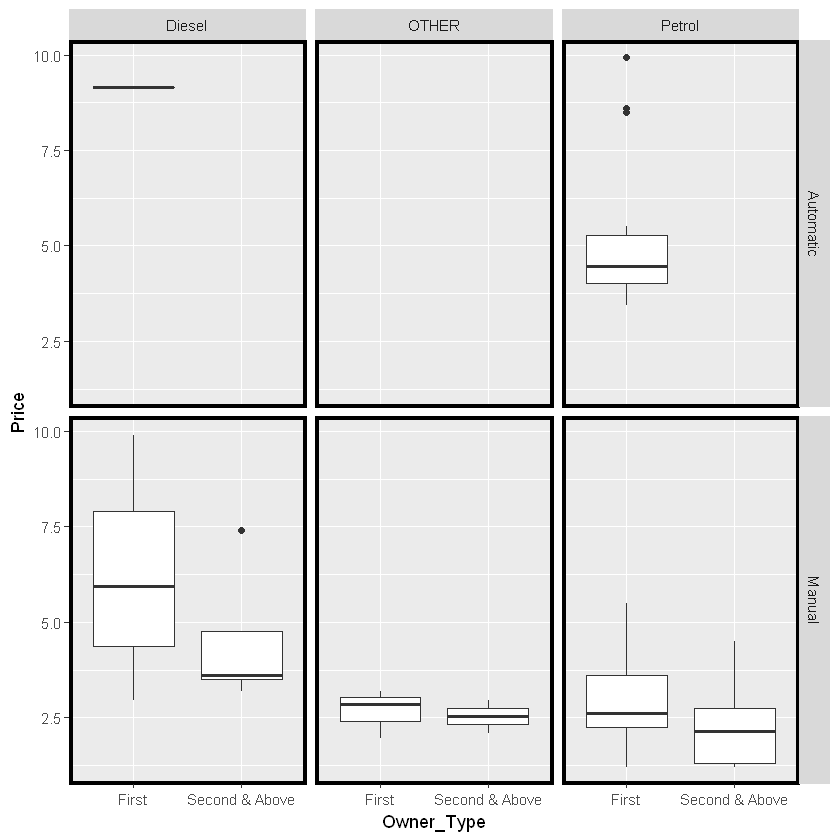

Maruti   Kochi

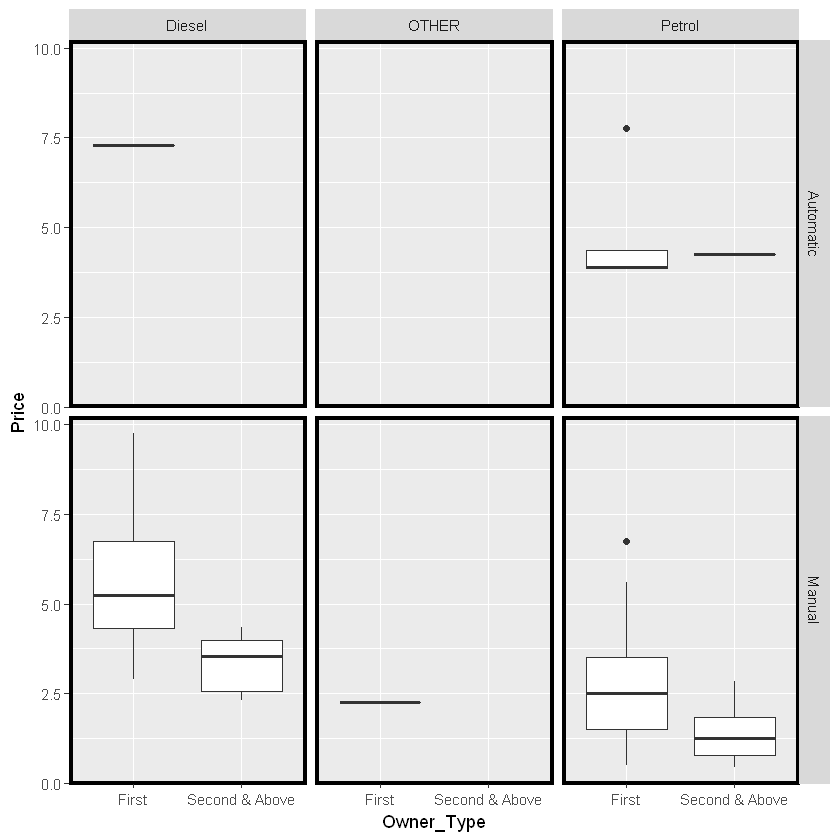

Maruti   Kolkata

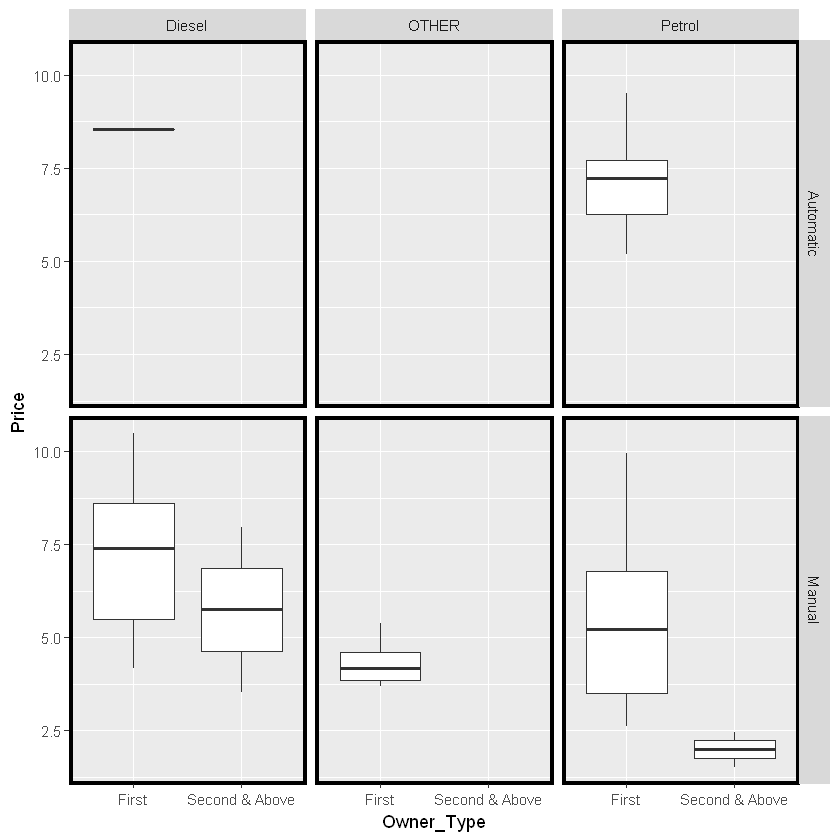

Maruti   Delhi

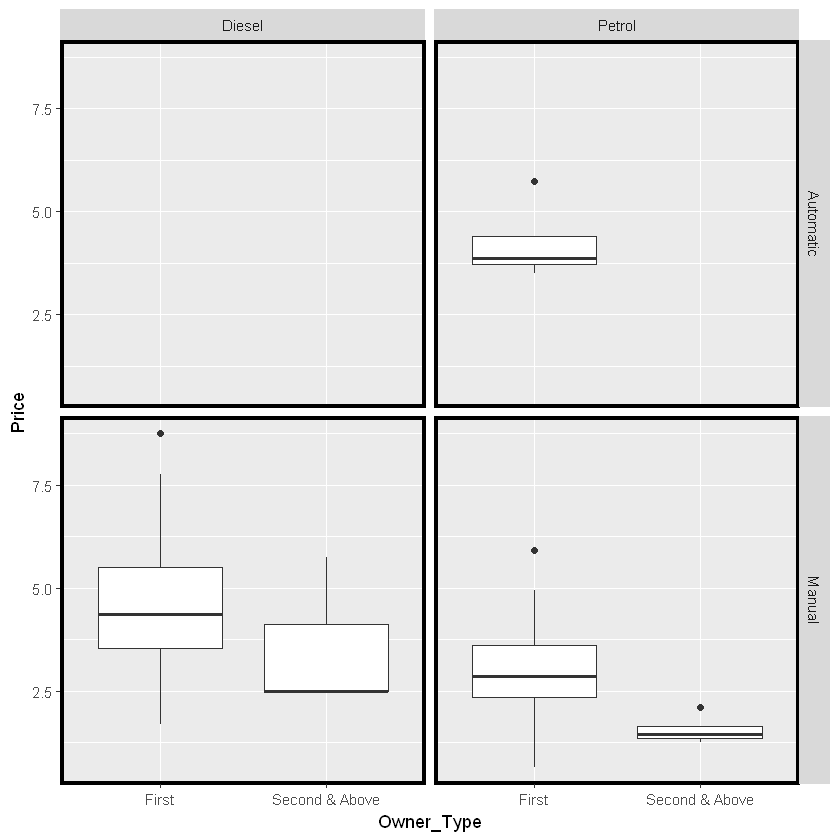

Maruti   Bangalore

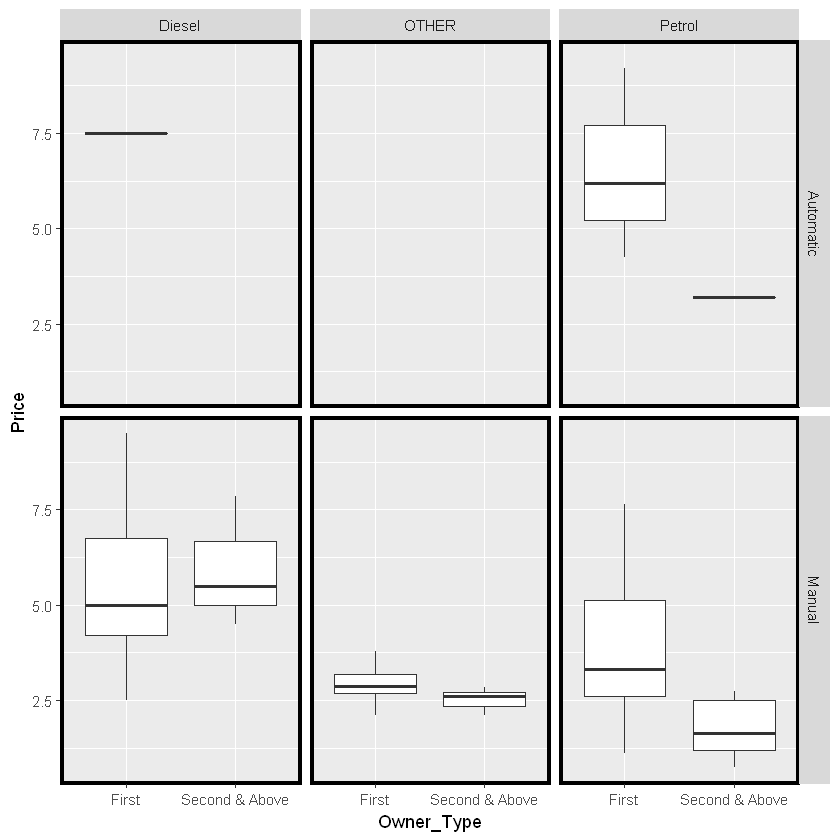

Maruti   Ahmedabad

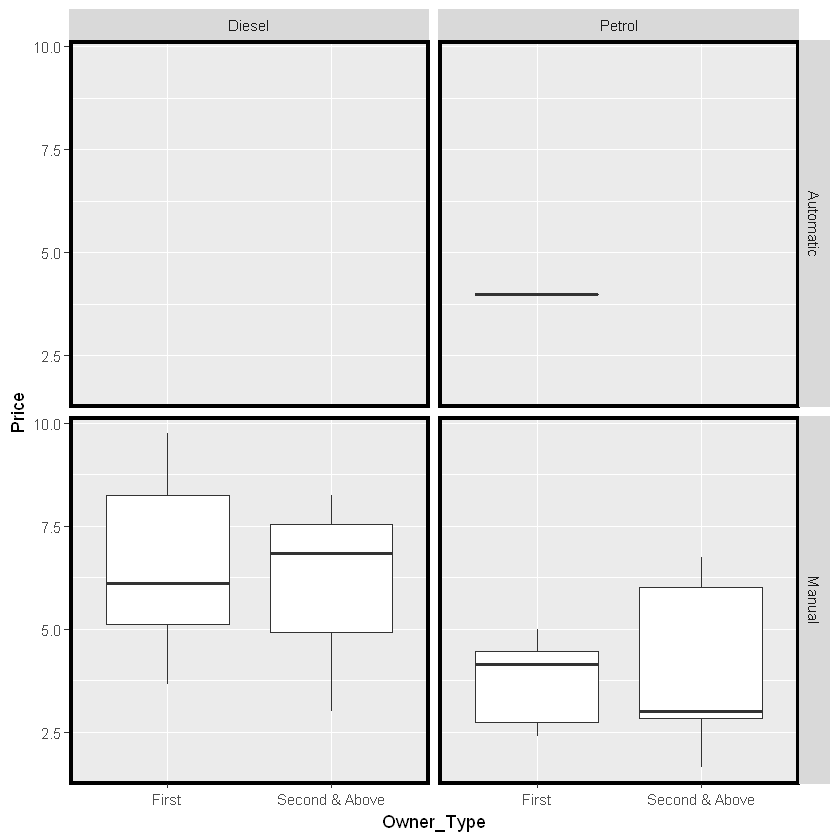

Hyundai   Mumbai

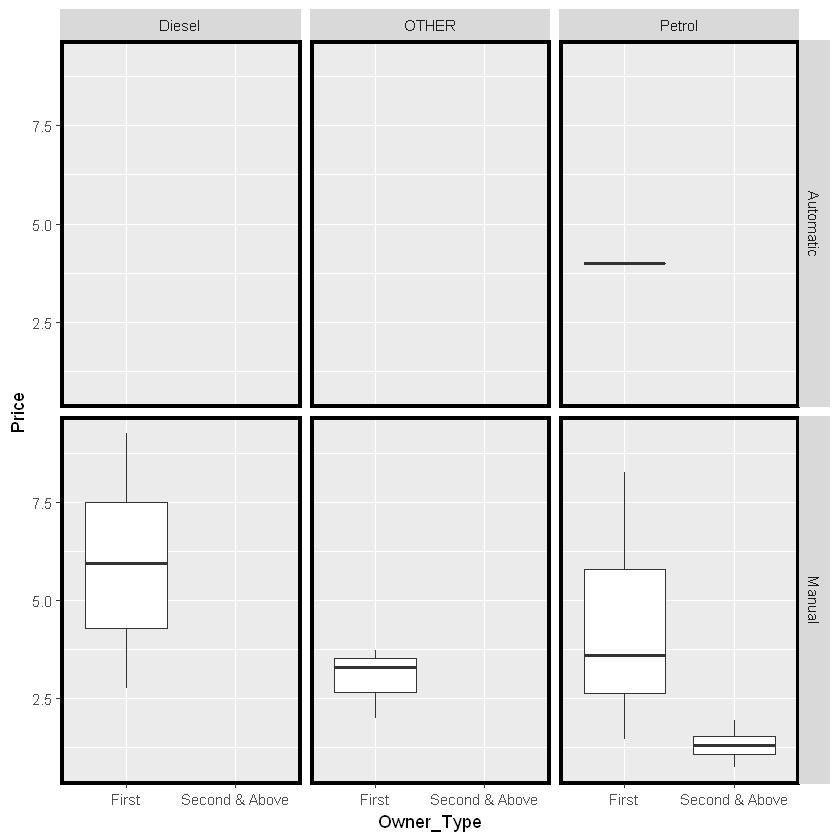

Hyundai   Pune

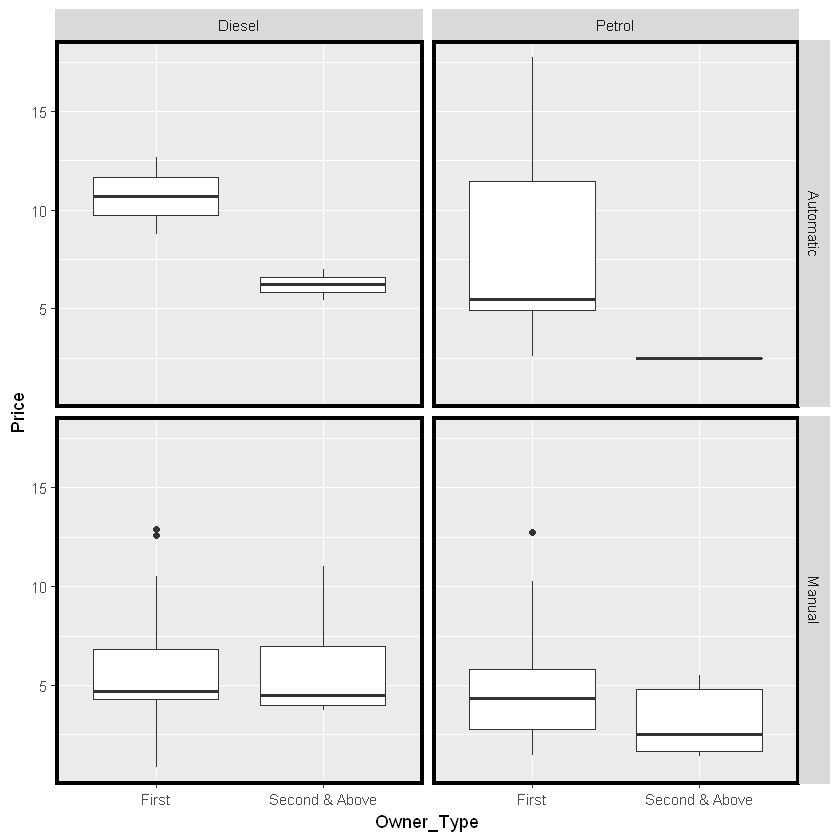

Hyundai   Chennai

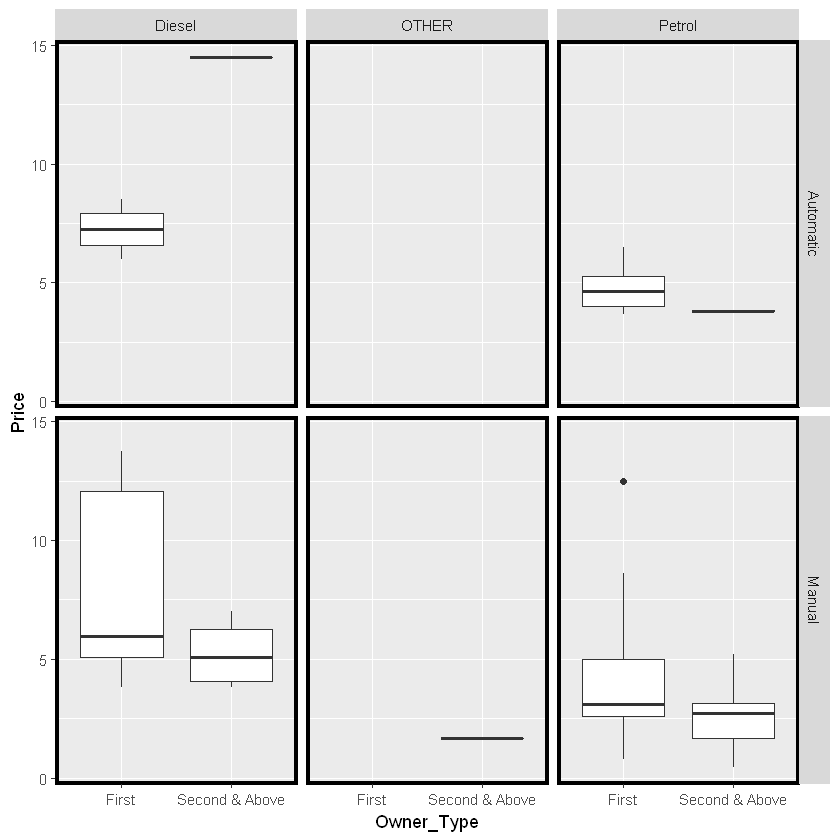

Hyundai   Coimbatore

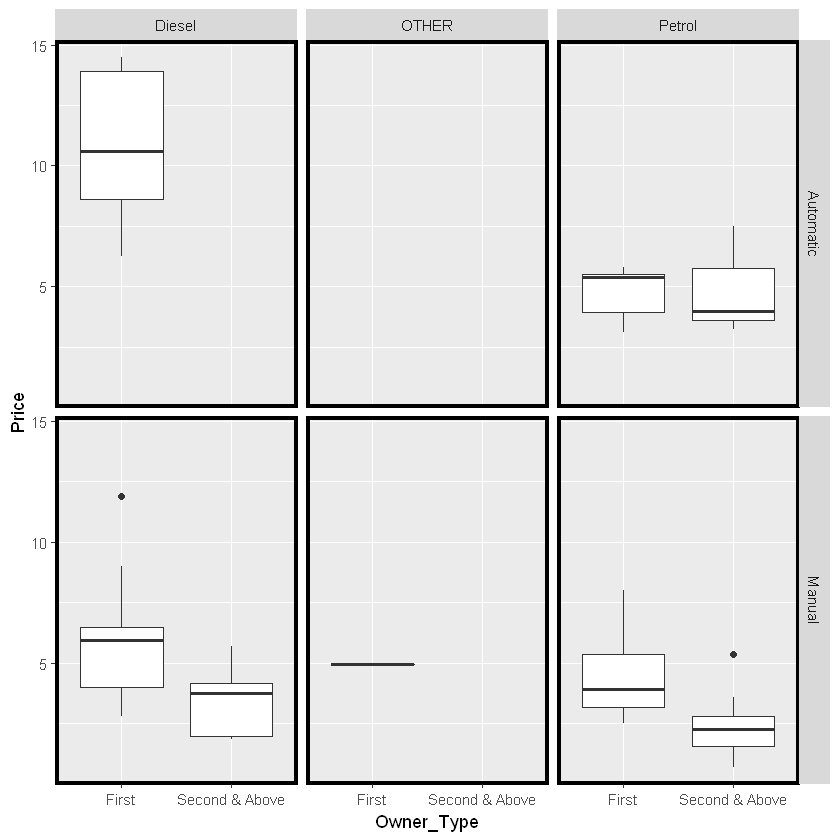

Hyundai   Hyderabad

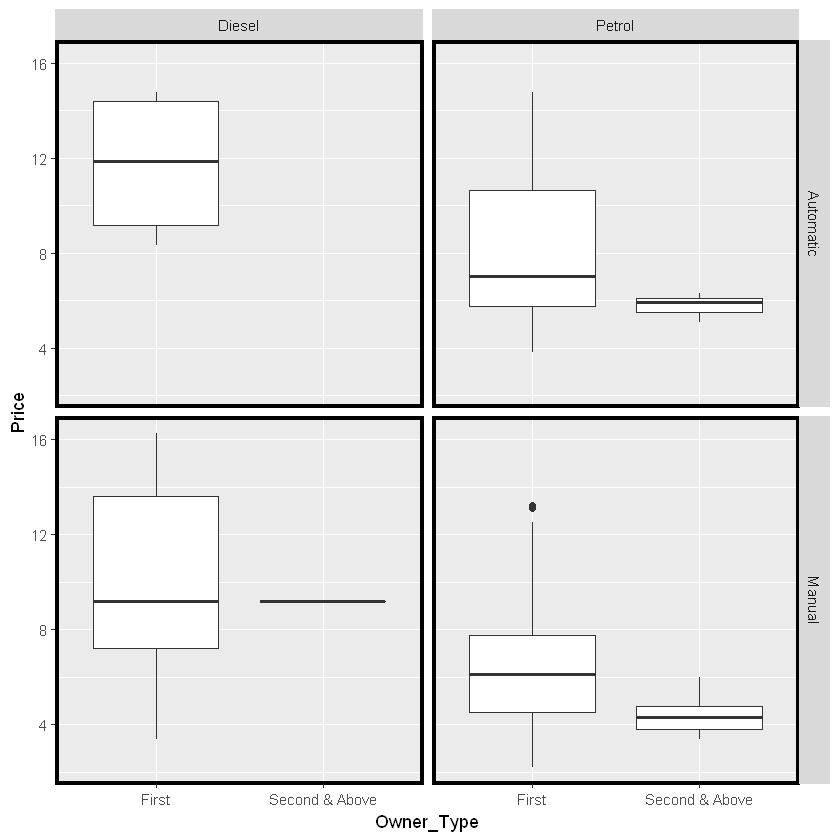

Hyundai   Jaipur

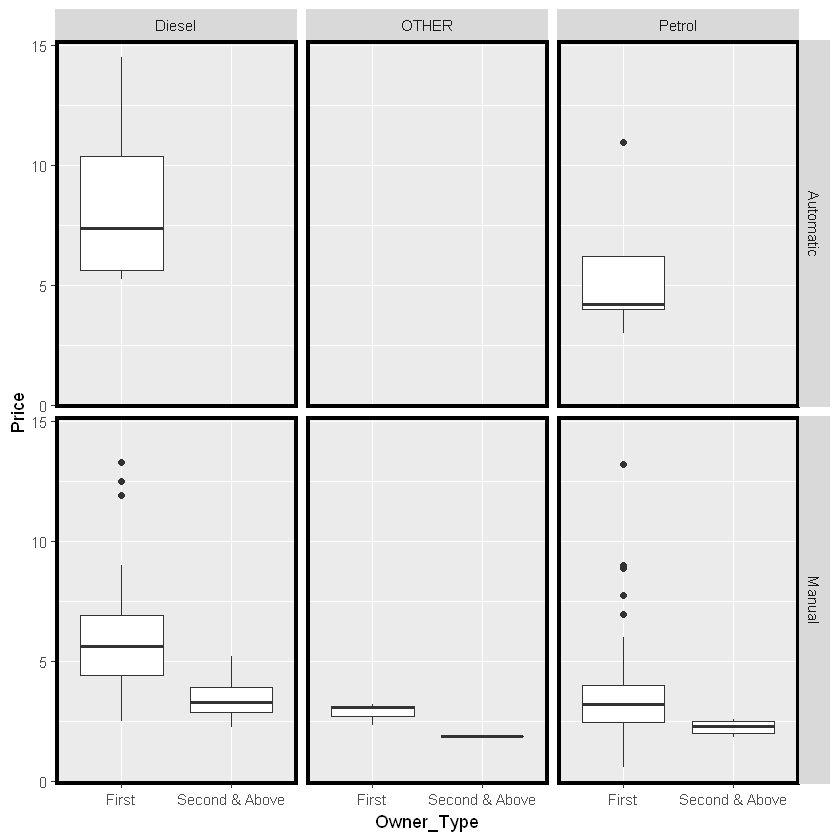

Hyundai   Kochi

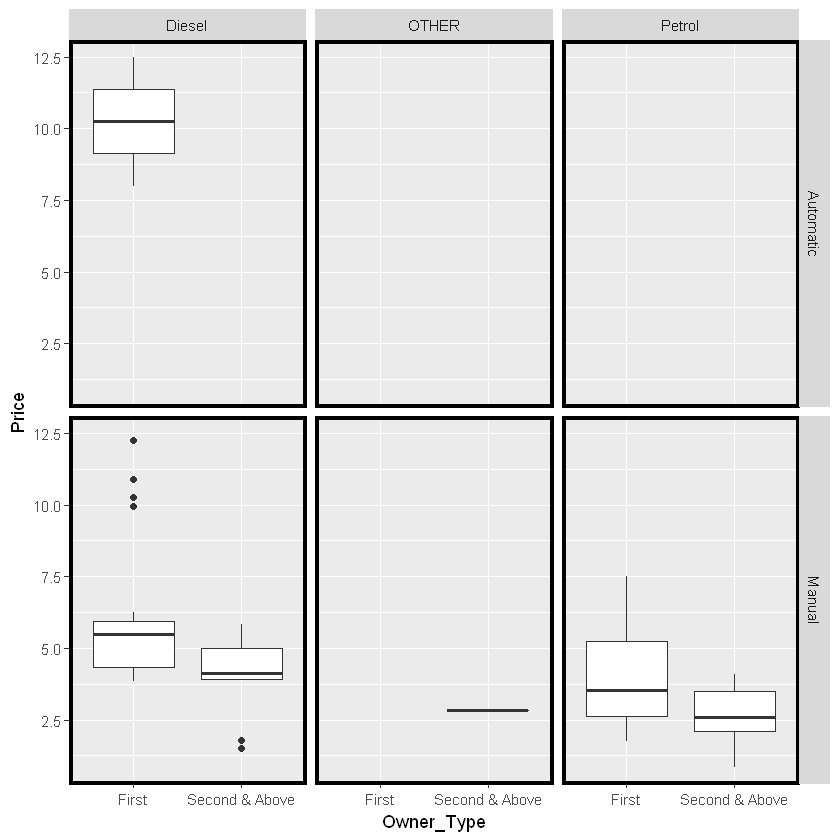

Hyundai   Kolkata

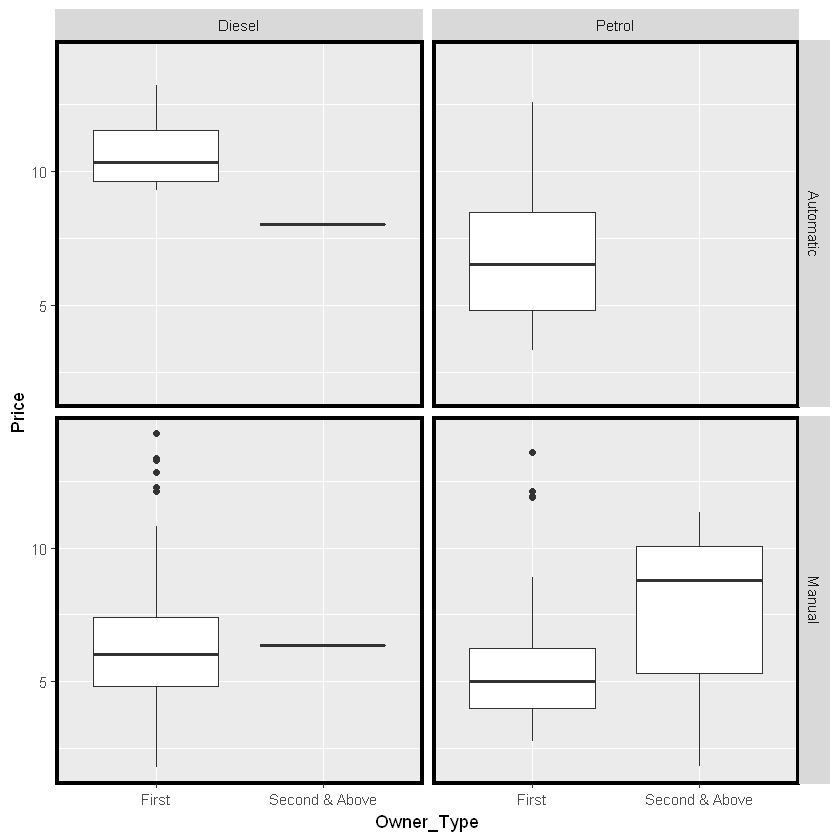

Hyundai   Delhi

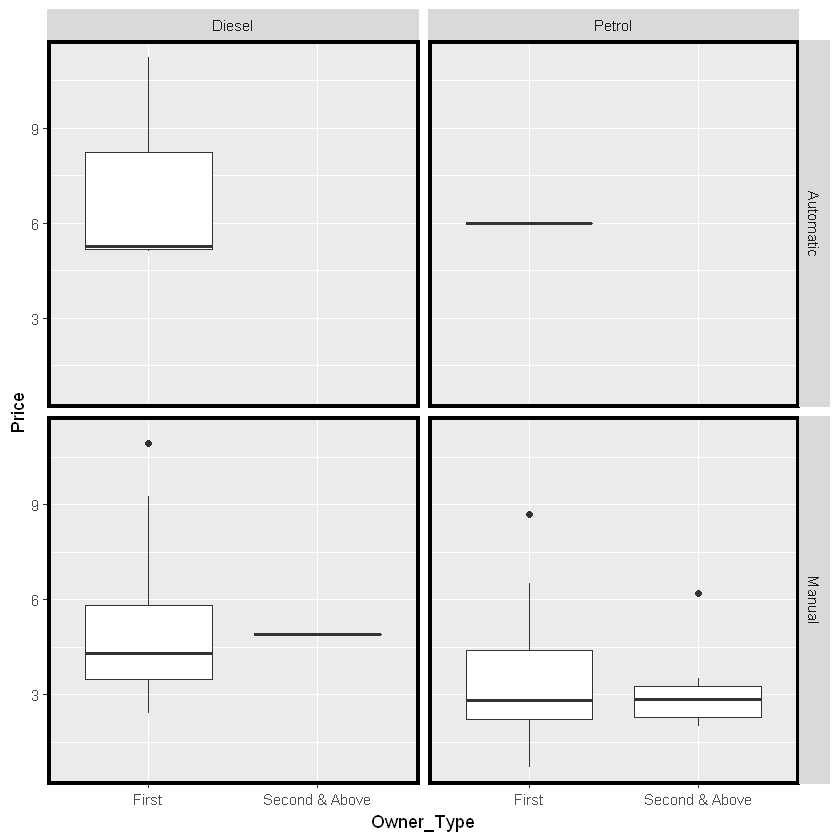

Hyundai   Bangalore

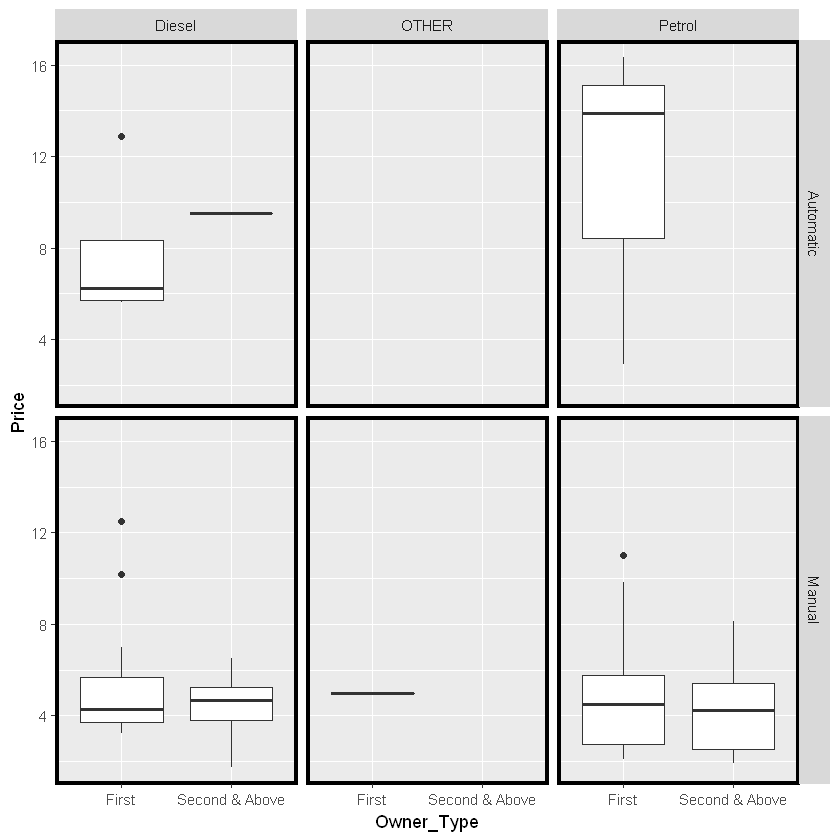

Hyundai   Ahmedabad

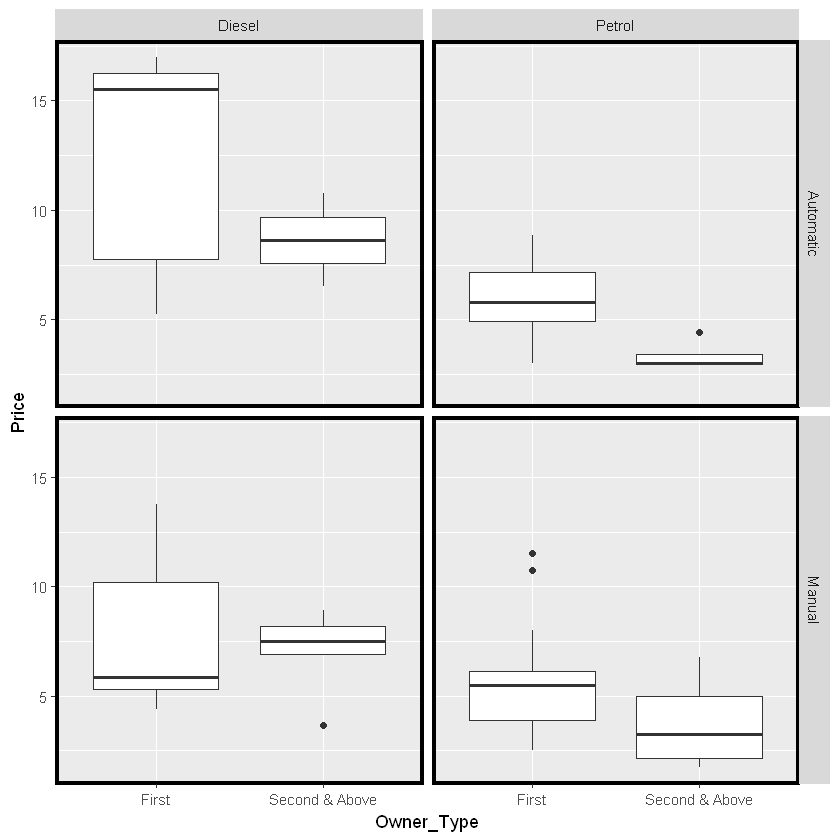

Honda   Mumbai

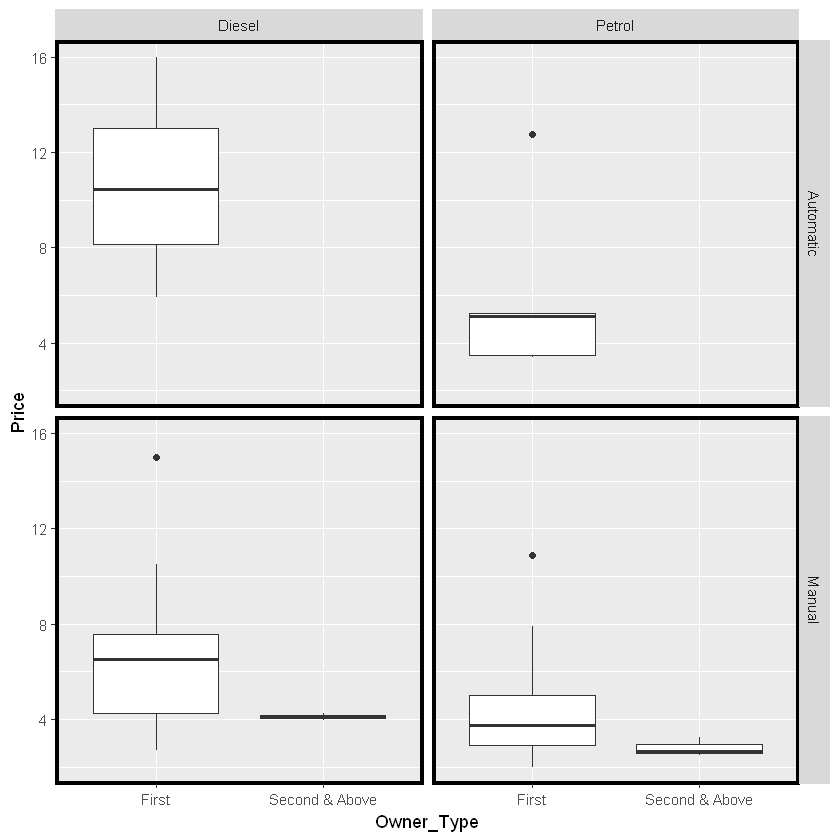

Honda   Pune

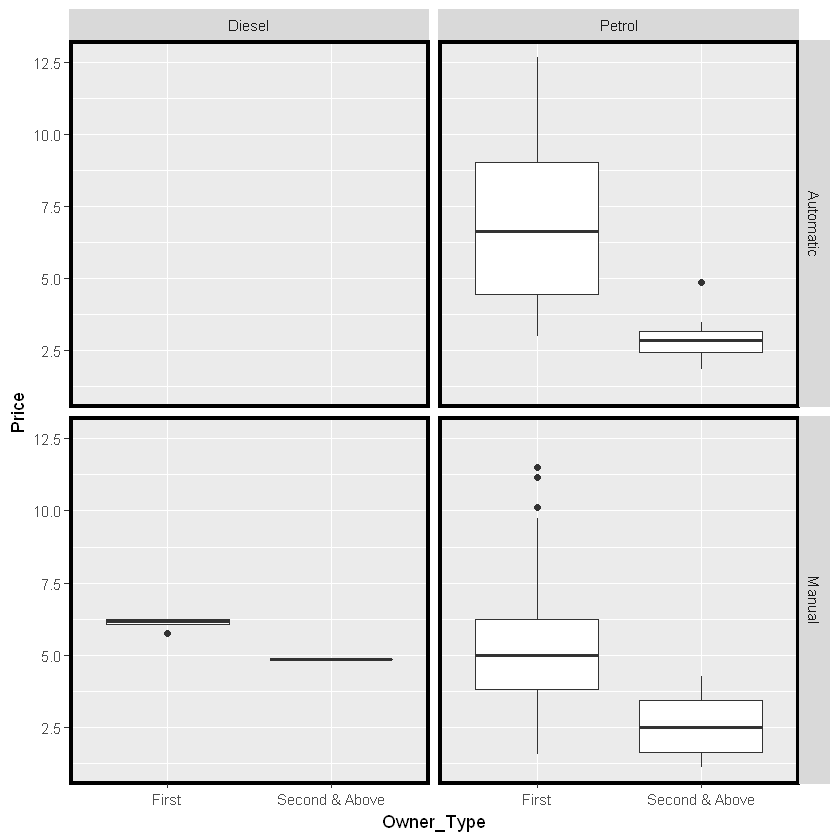

Honda   Chennai

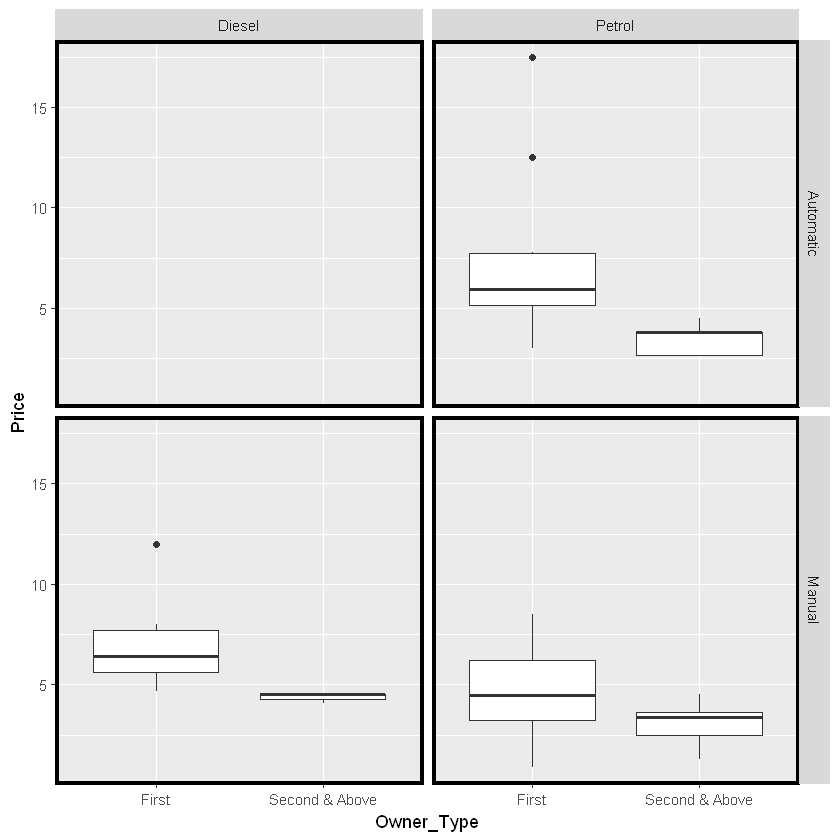

Honda   Coimbatore

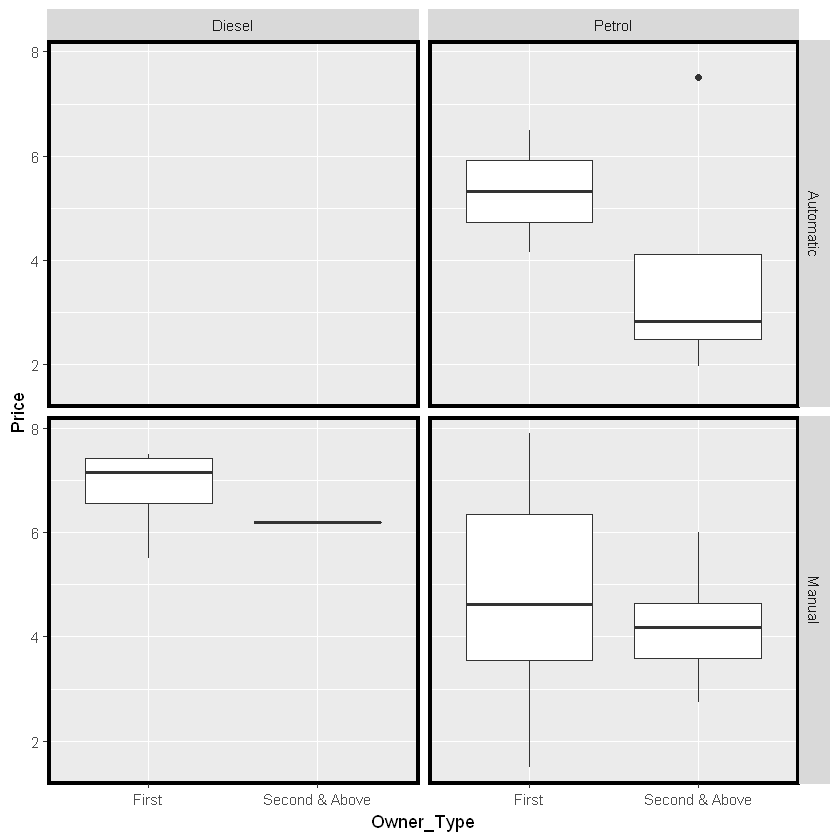

Honda   Hyderabad

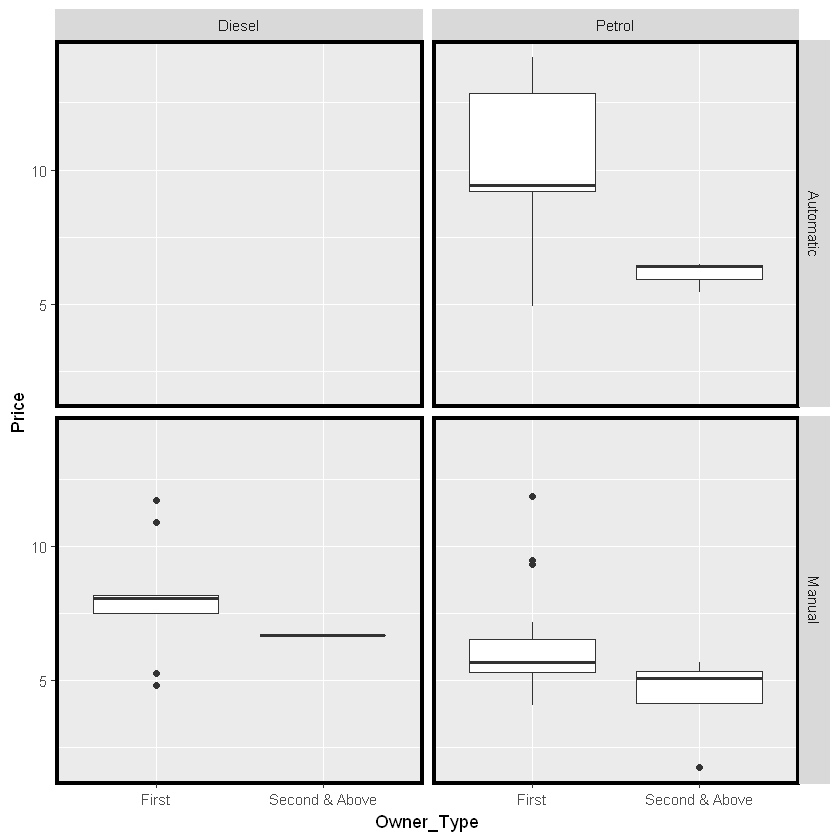

Honda   Jaipur

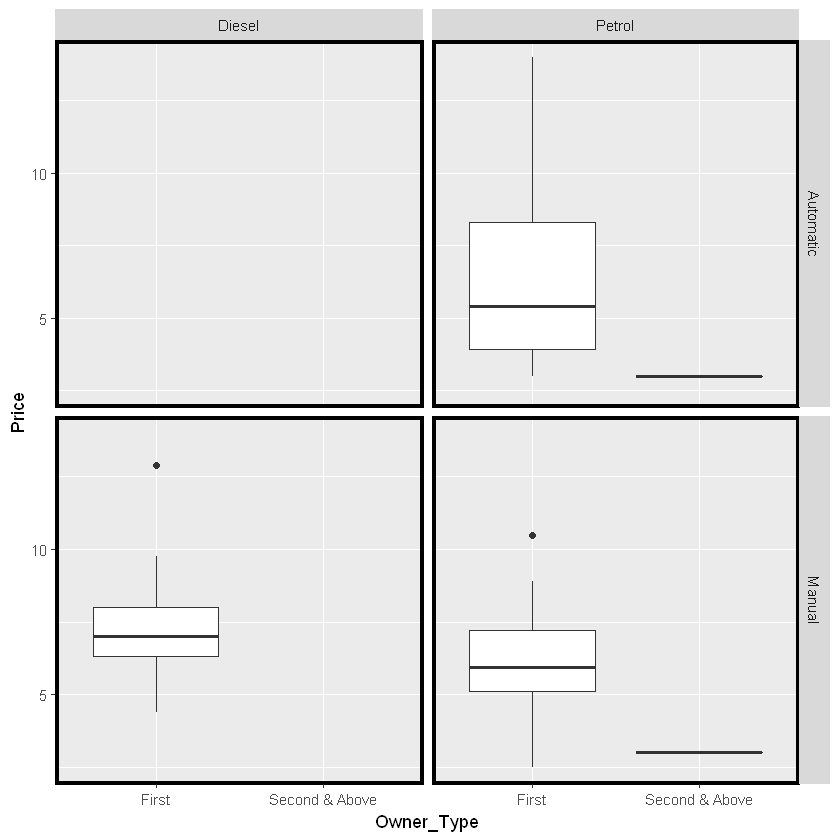

Honda   Kochi

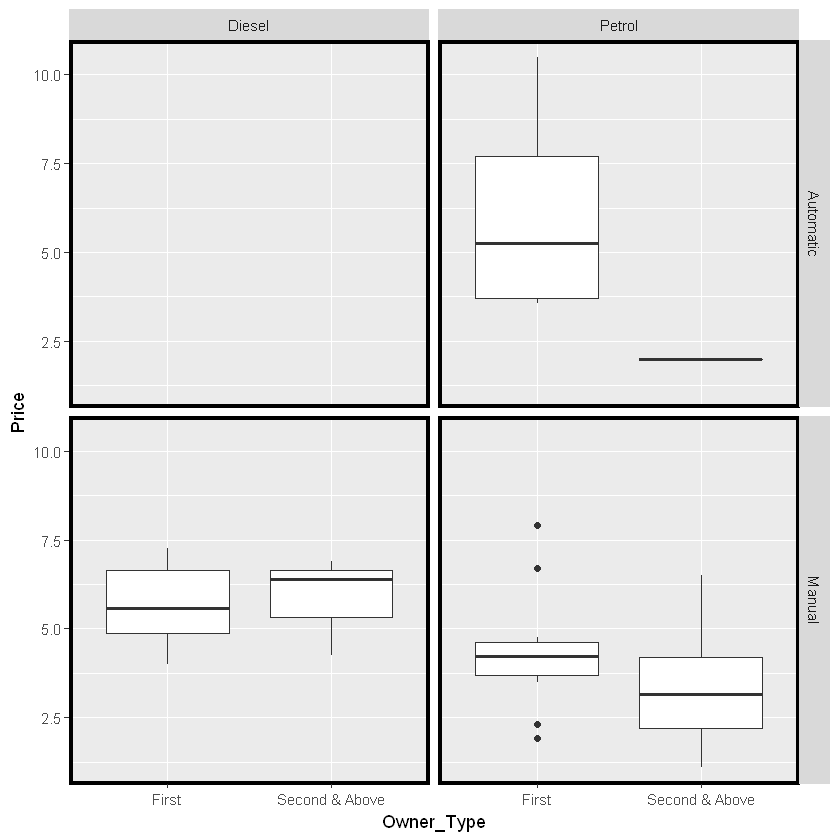

Honda   Kolkata

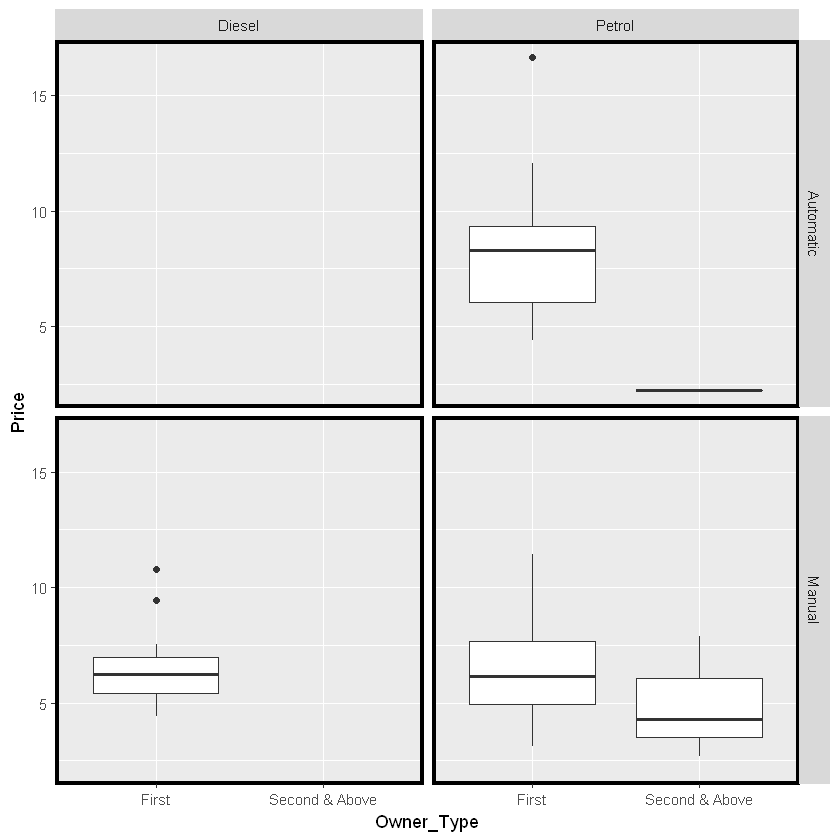

Honda   Delhi

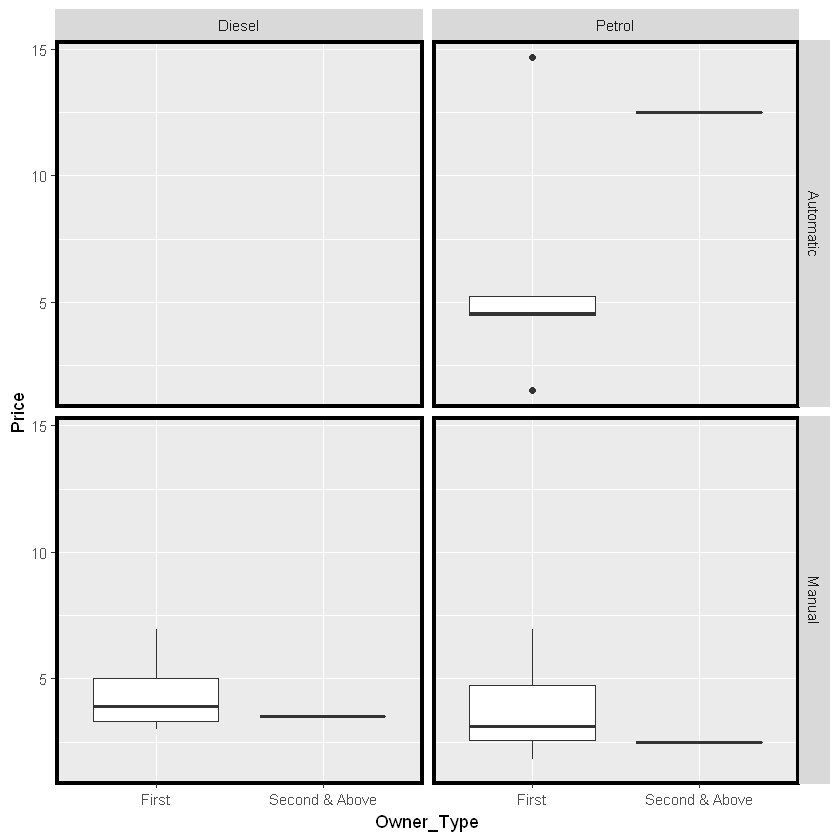

Honda   Bangalore

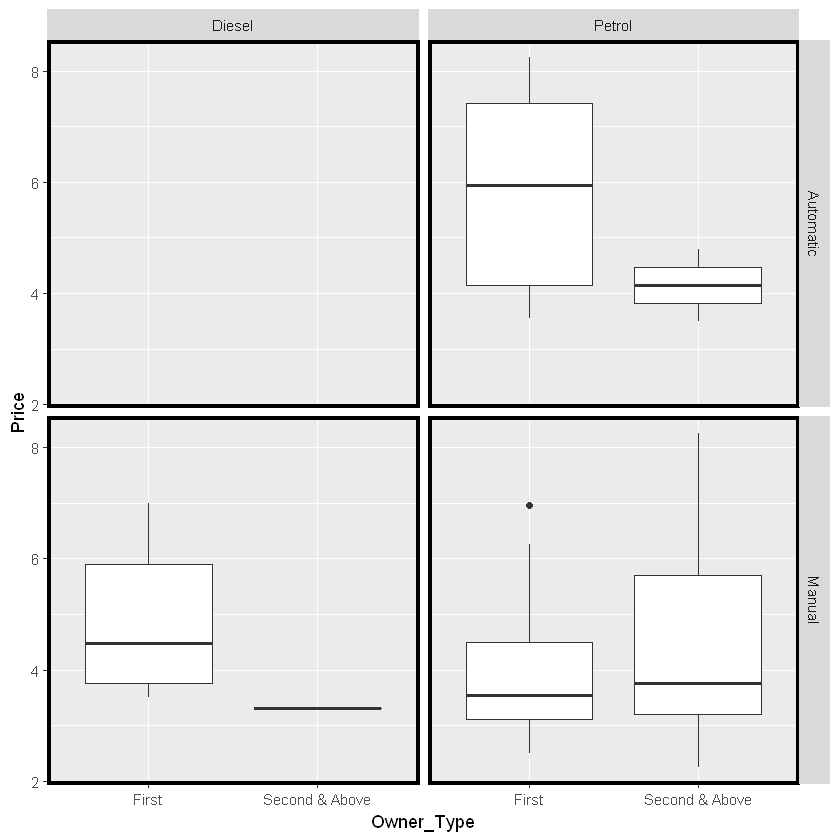

Honda   Ahmedabad

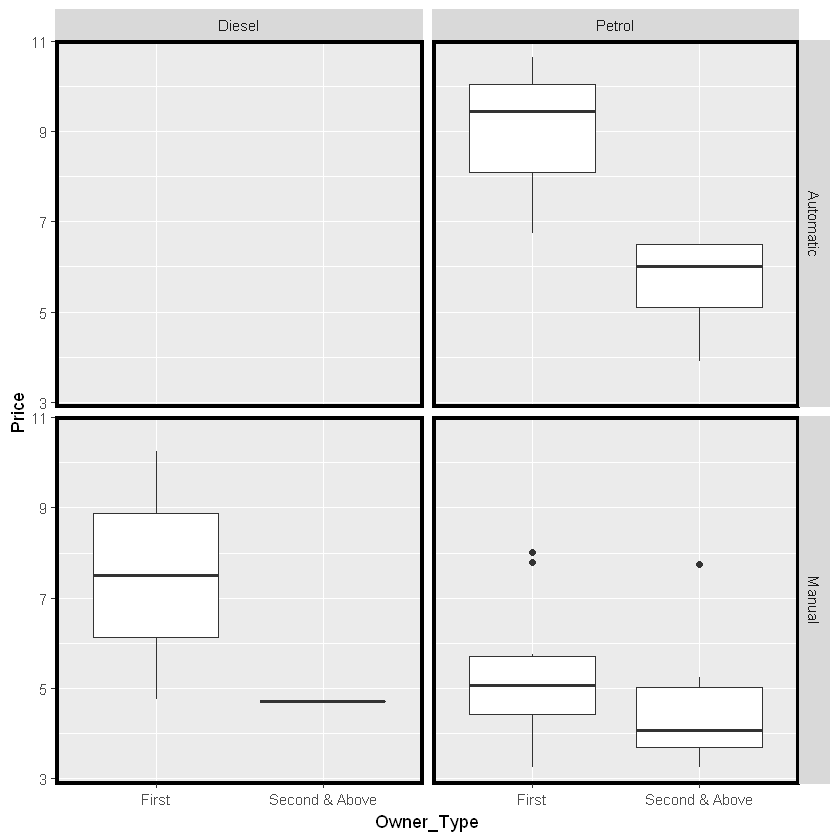

Audi   Mumbai

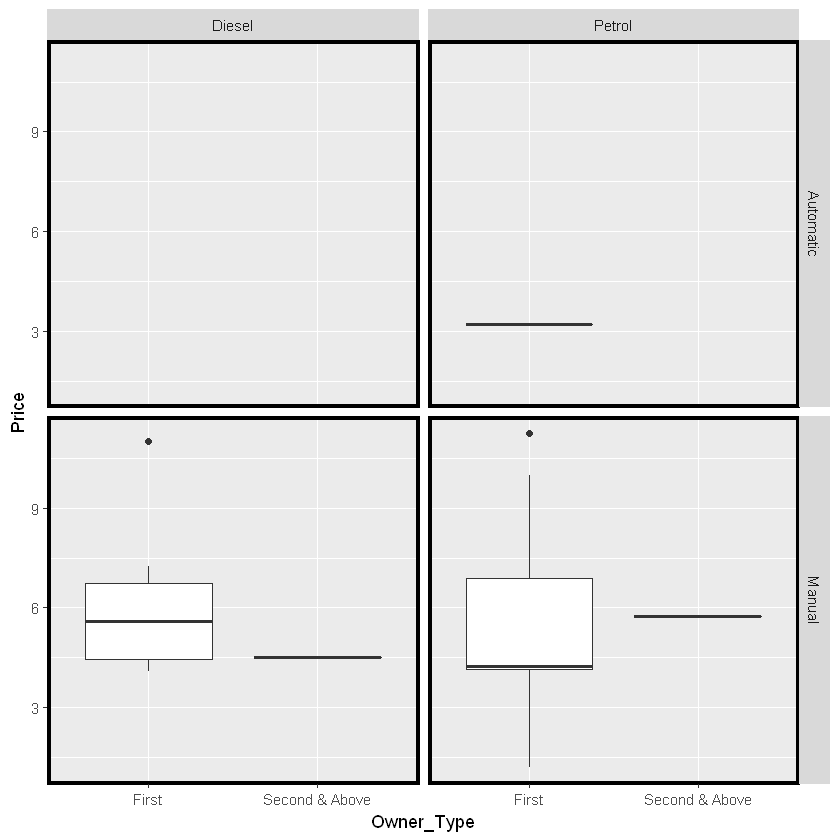

Audi   Pune

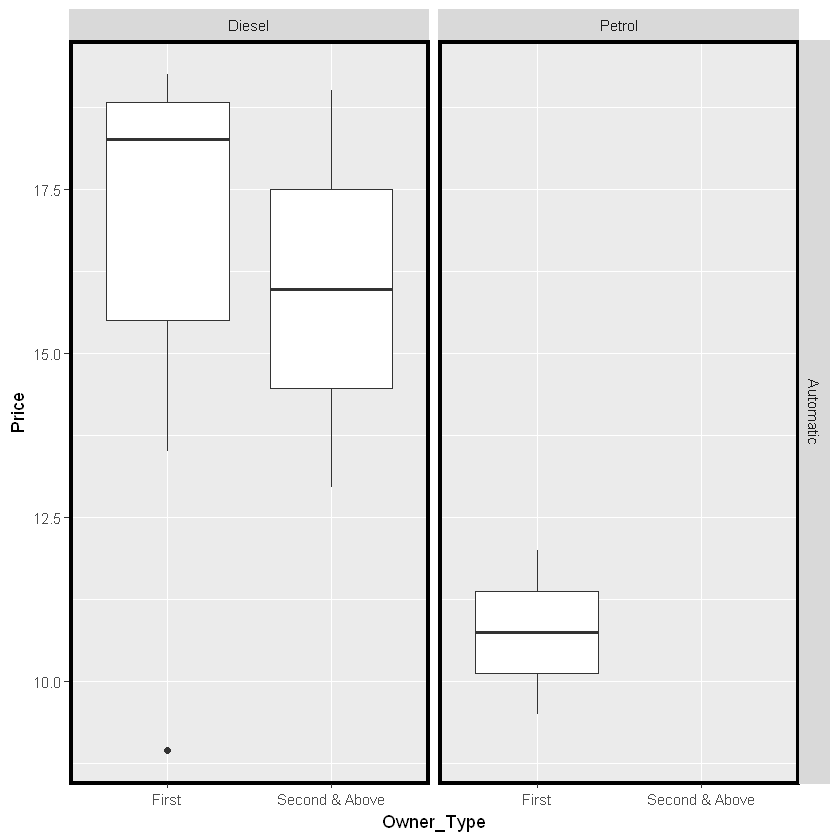

Audi   Chennai

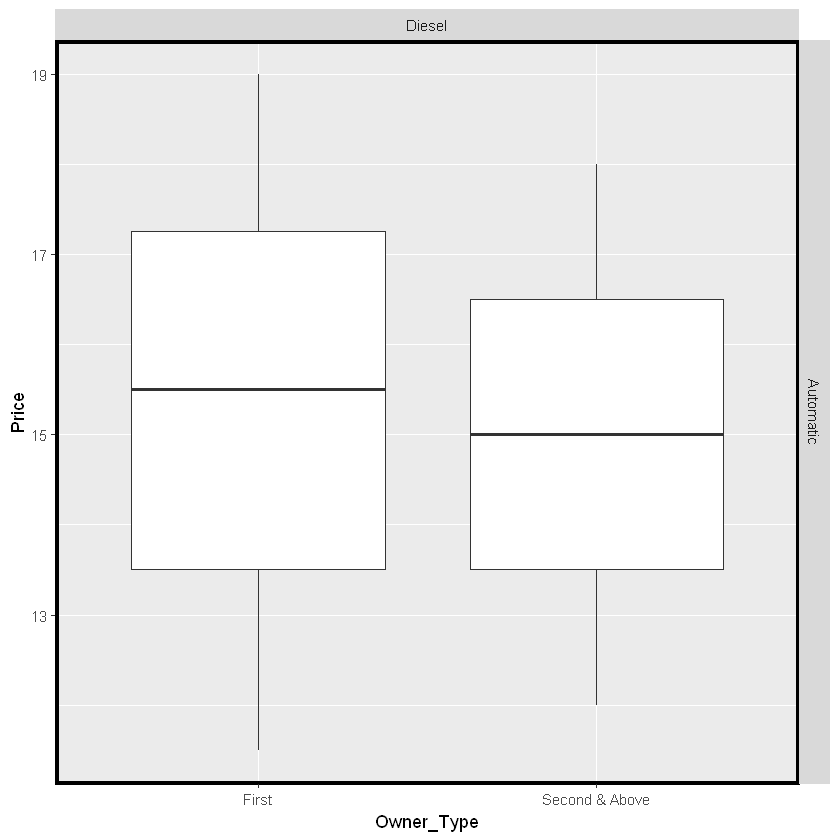

Audi   Coimbatore

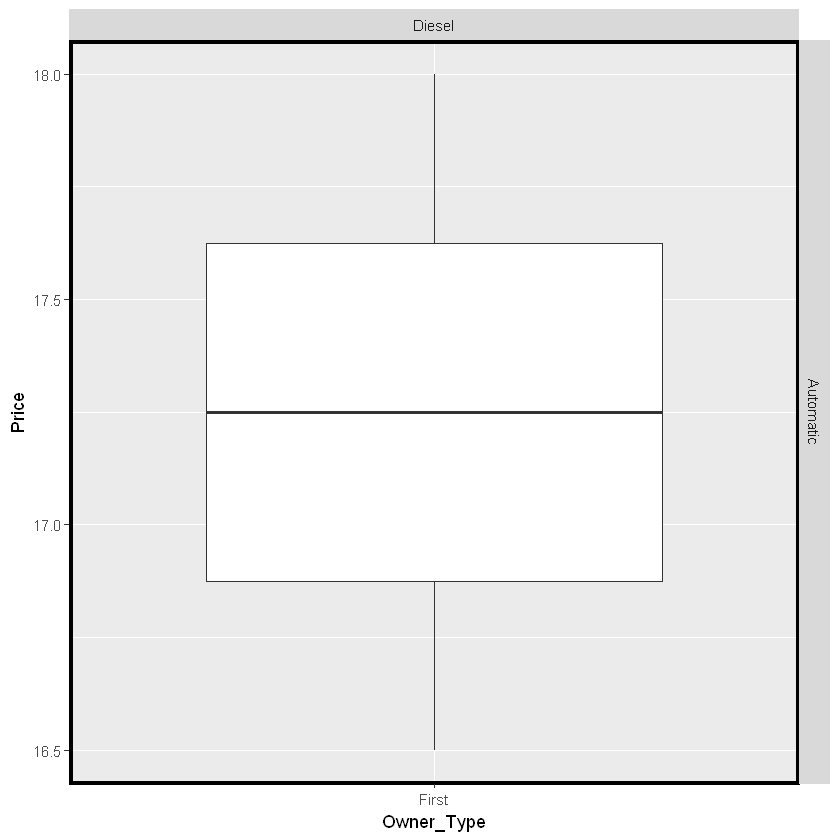

Audi   Hyderabad

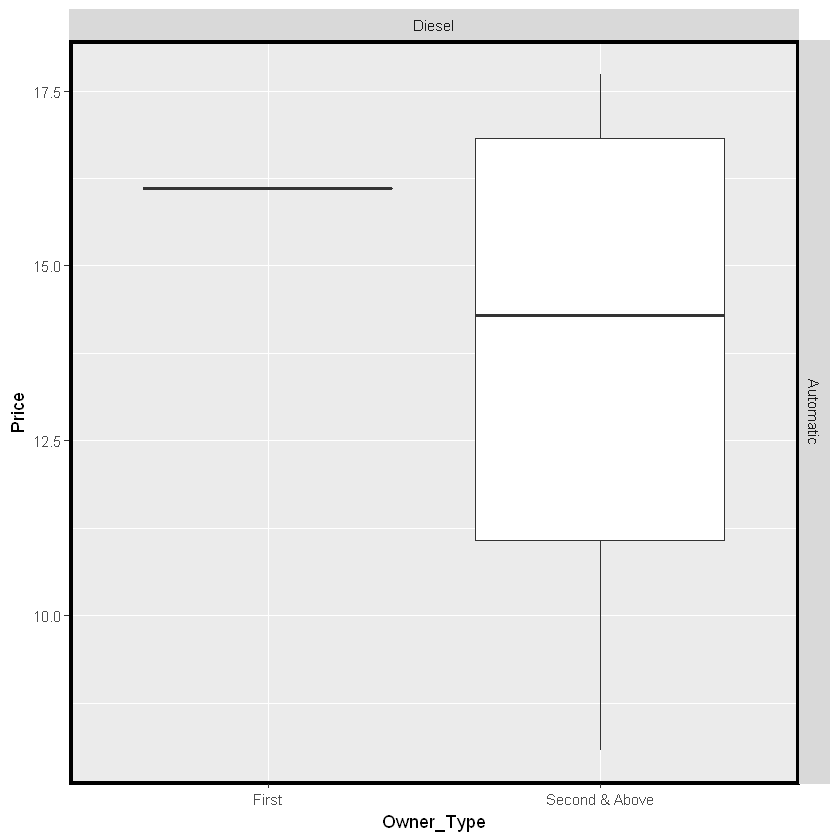

Audi   Jaipur

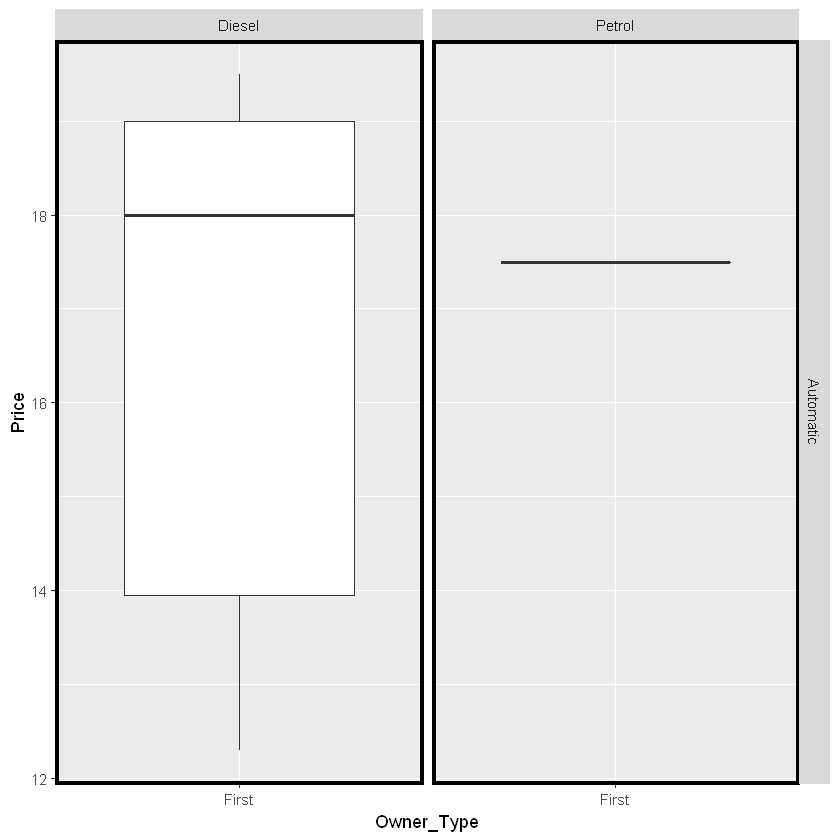

Audi   Kochi

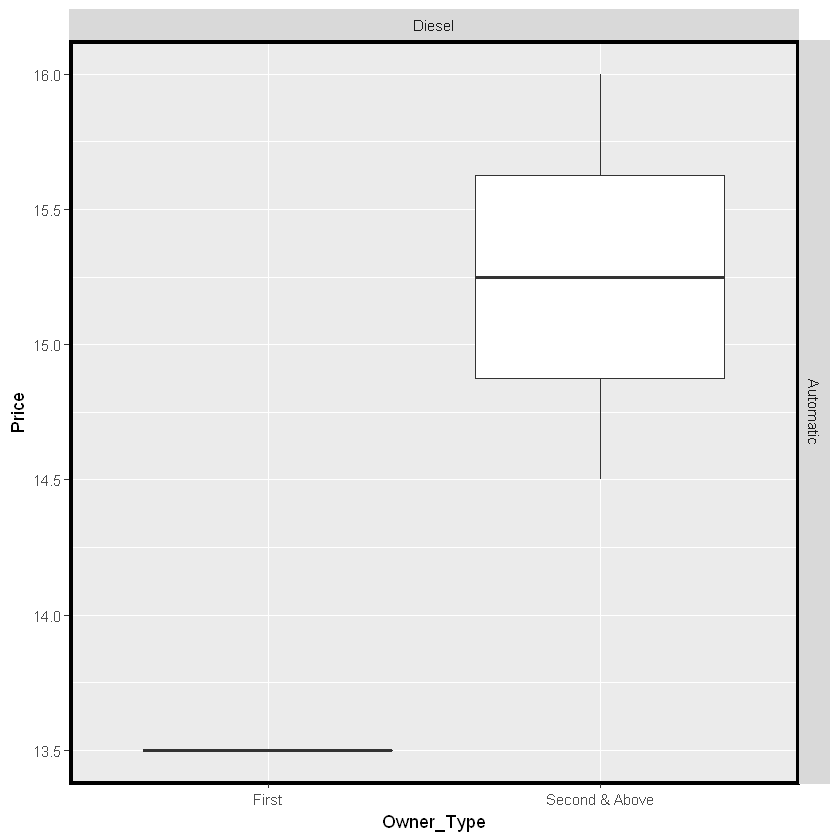

Audi   Kolkata

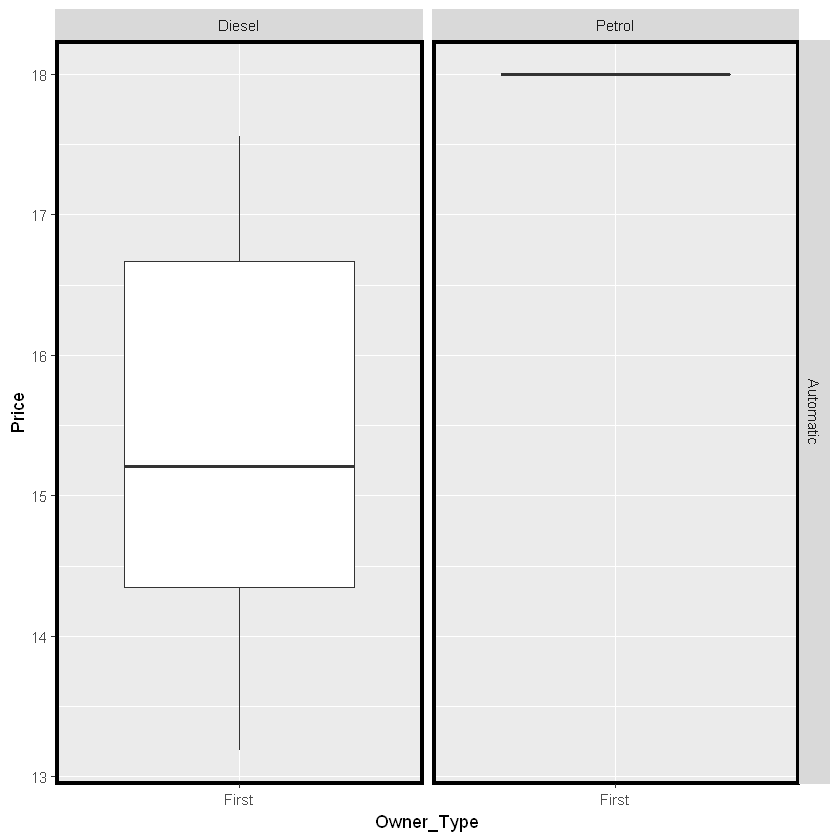

Audi   Delhi

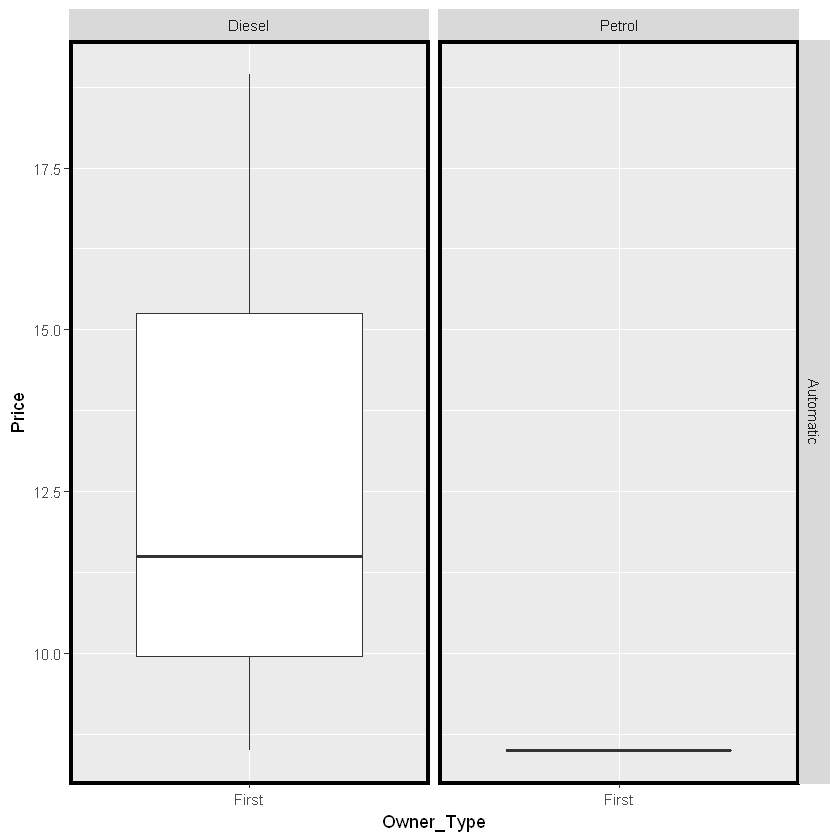

Audi   Bangalore

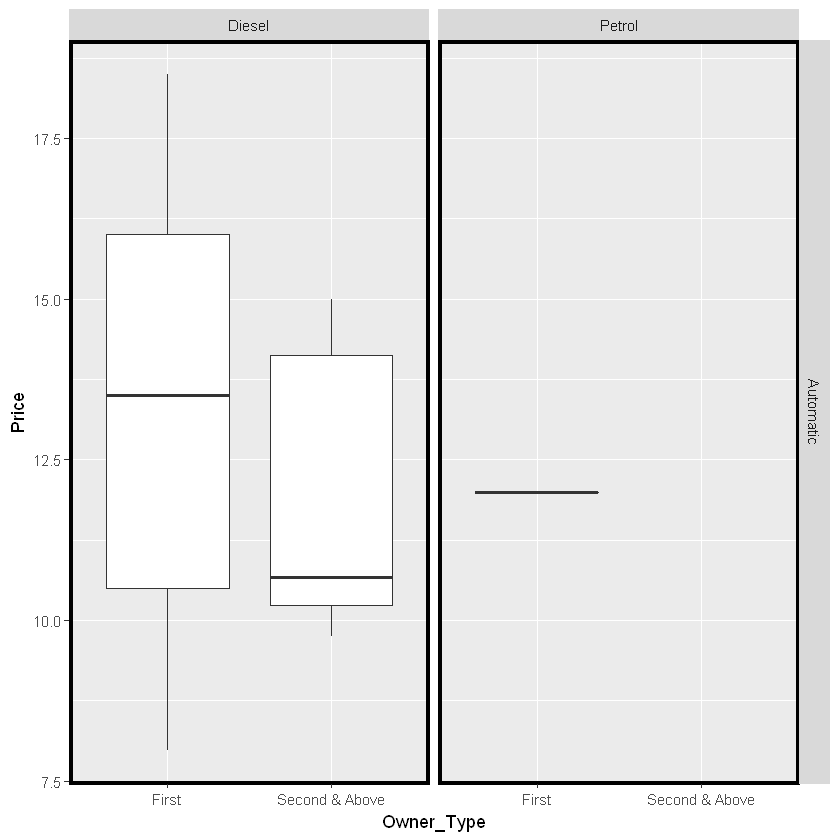

Audi   Ahmedabad

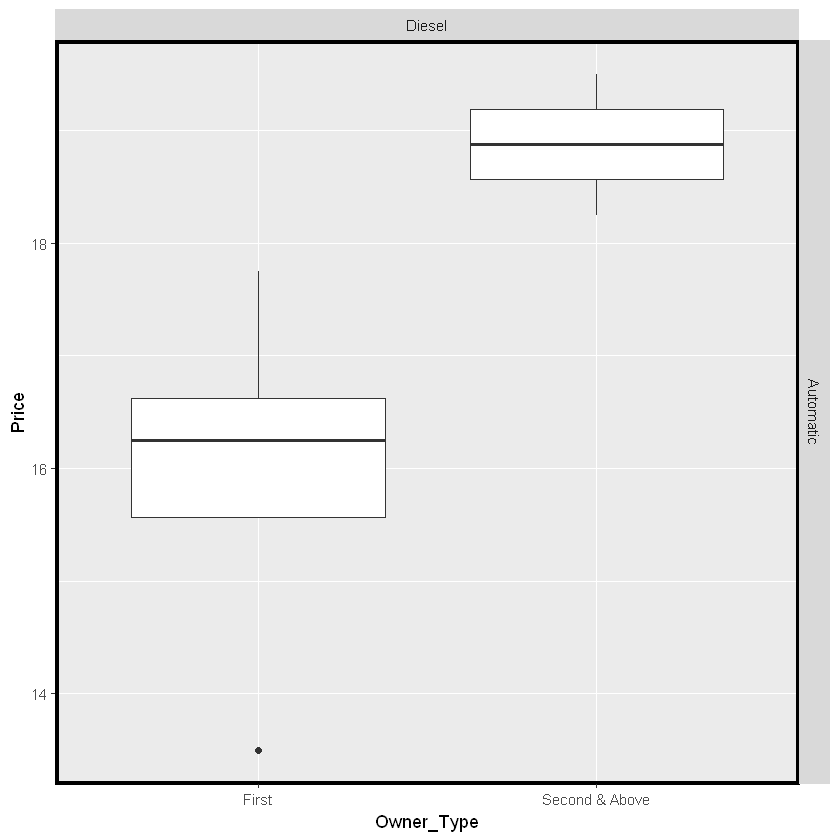

Nissan   Mumbai

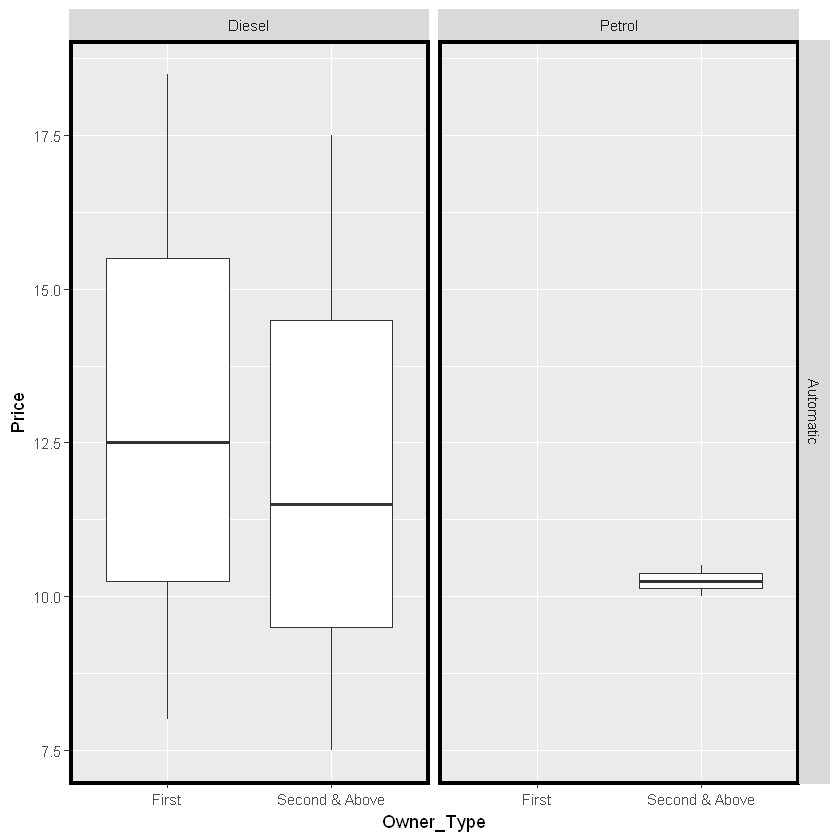

Nissan   Pune

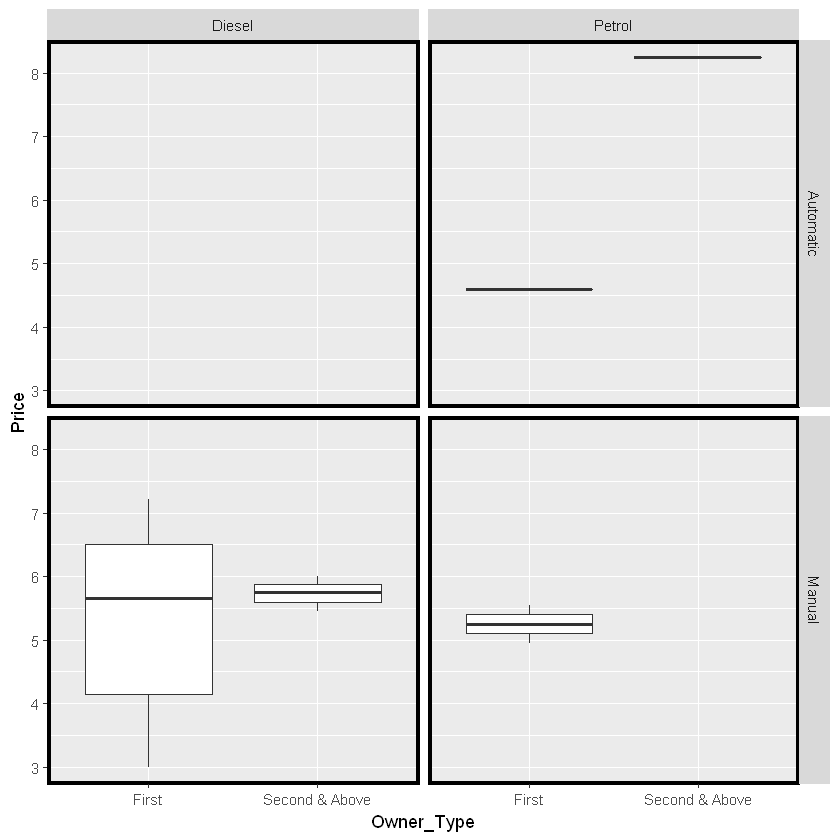

Nissan   Chennai

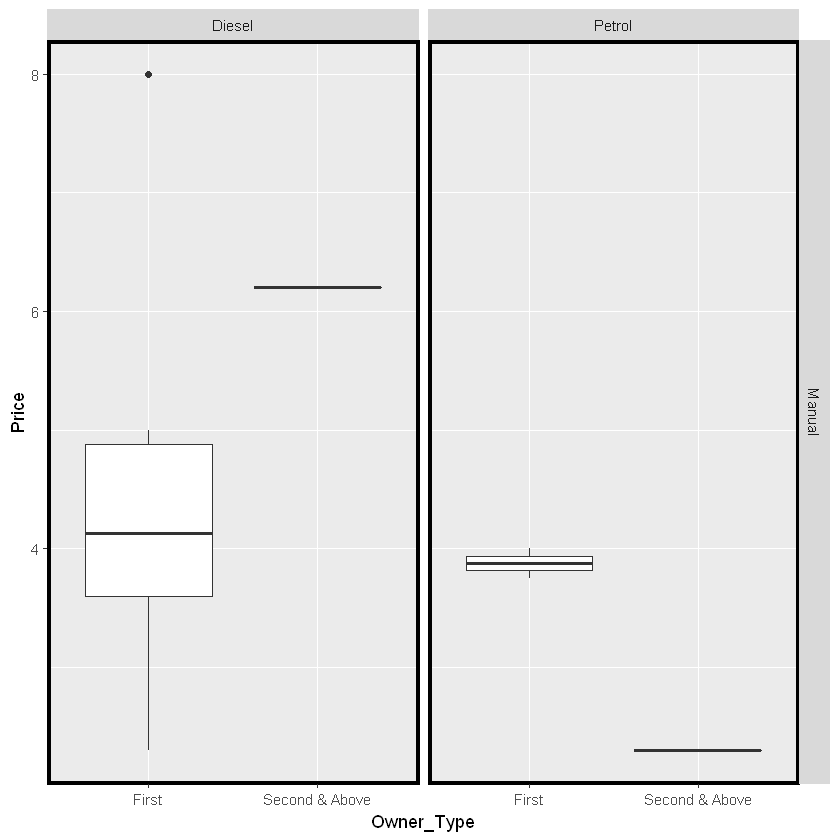

Nissan   Coimbatore

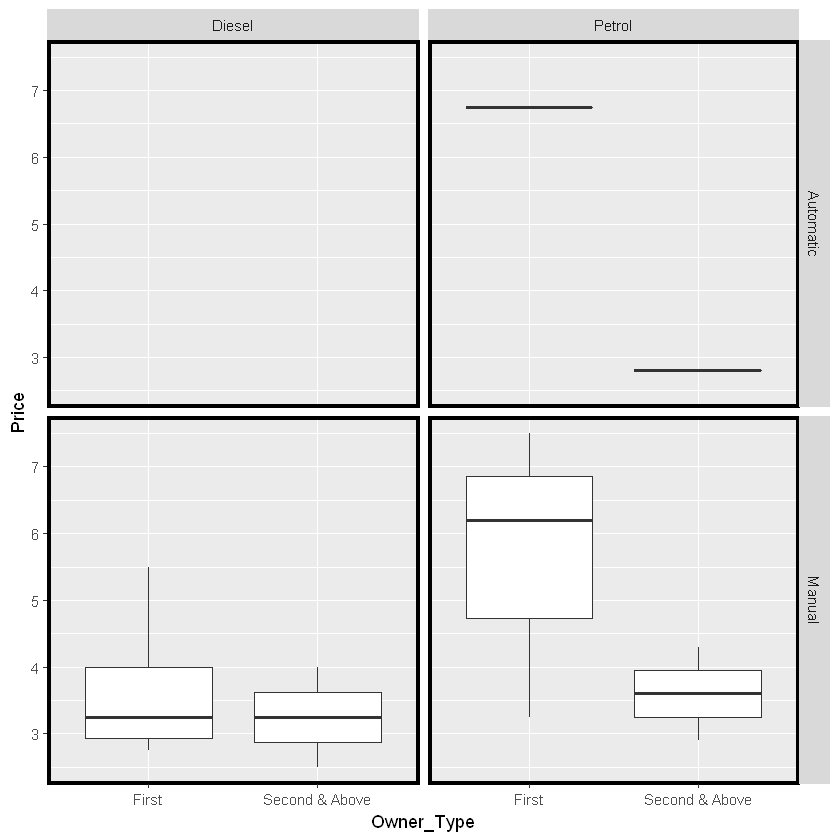

Nissan   Hyderabad

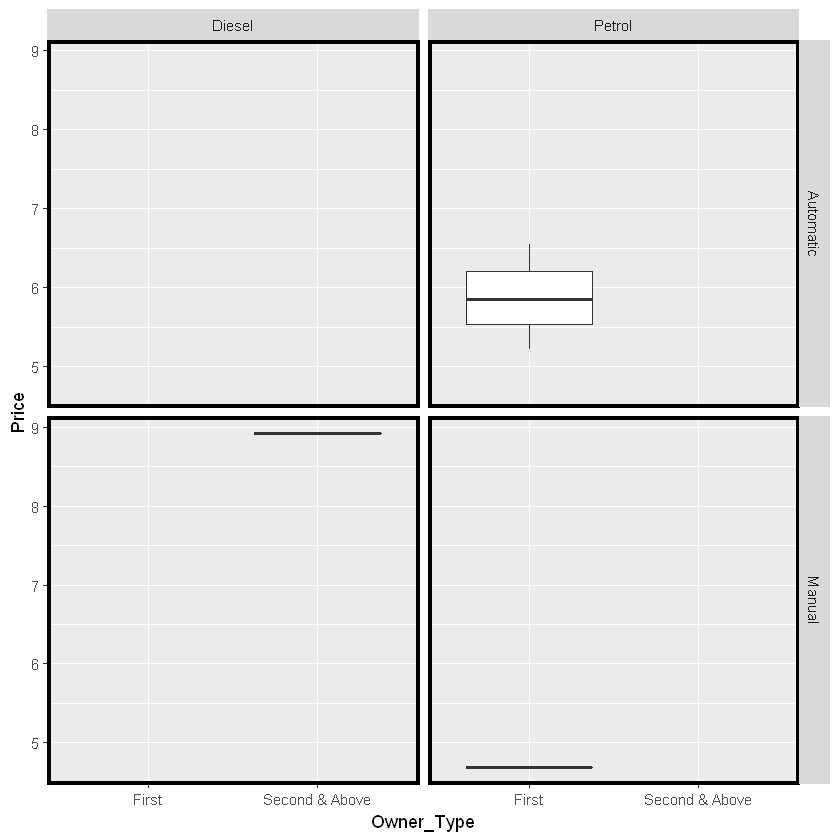

Nissan   Jaipur

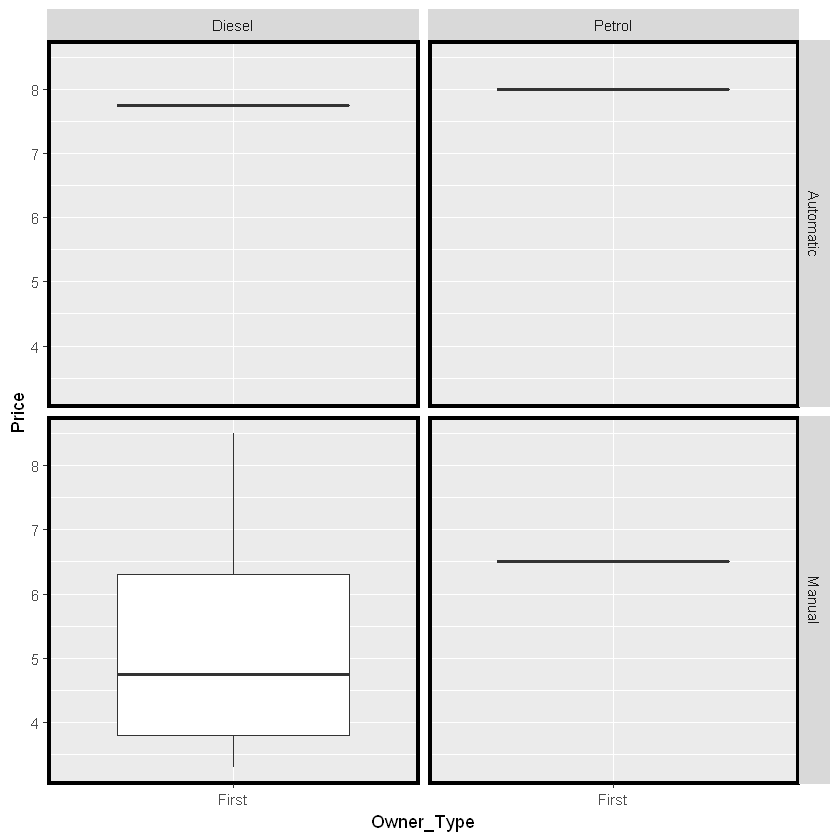

Nissan   Kochi

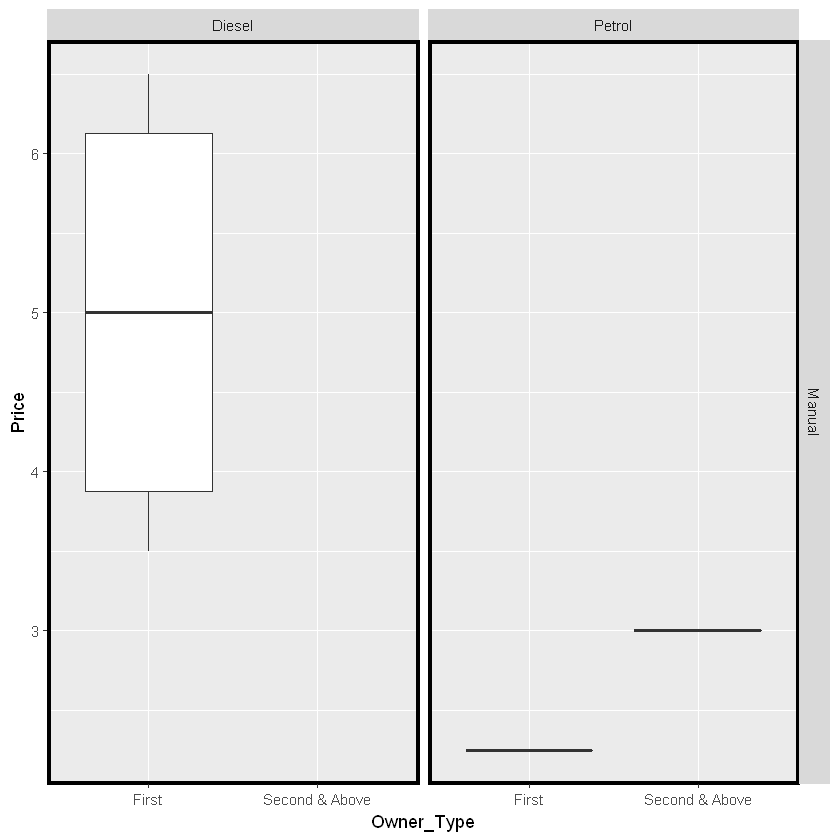

Nissan   Kolkata

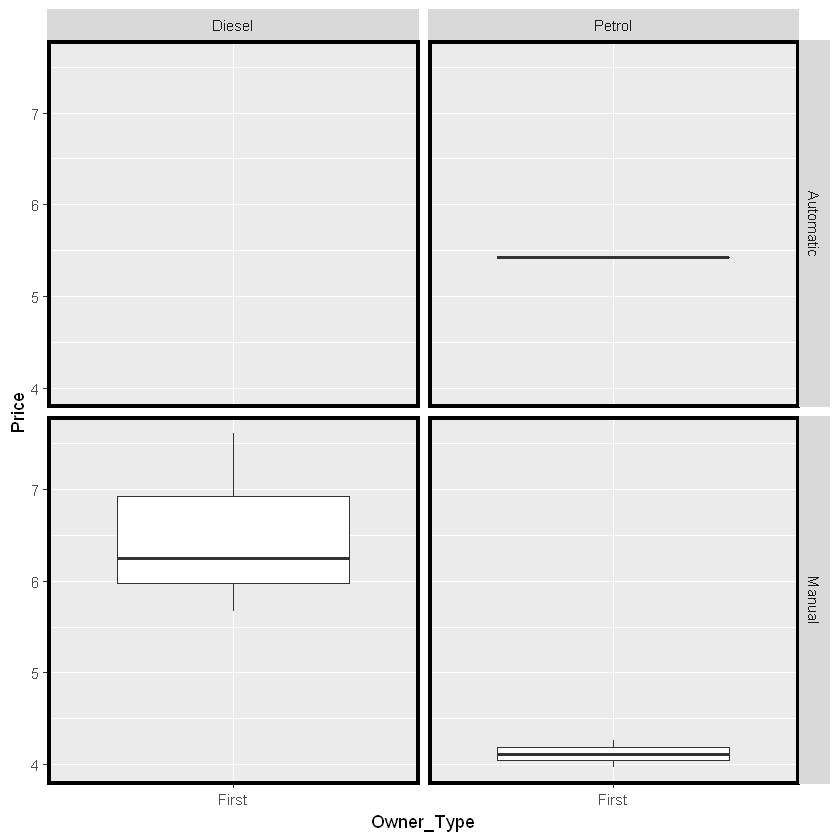

Nissan   Delhi

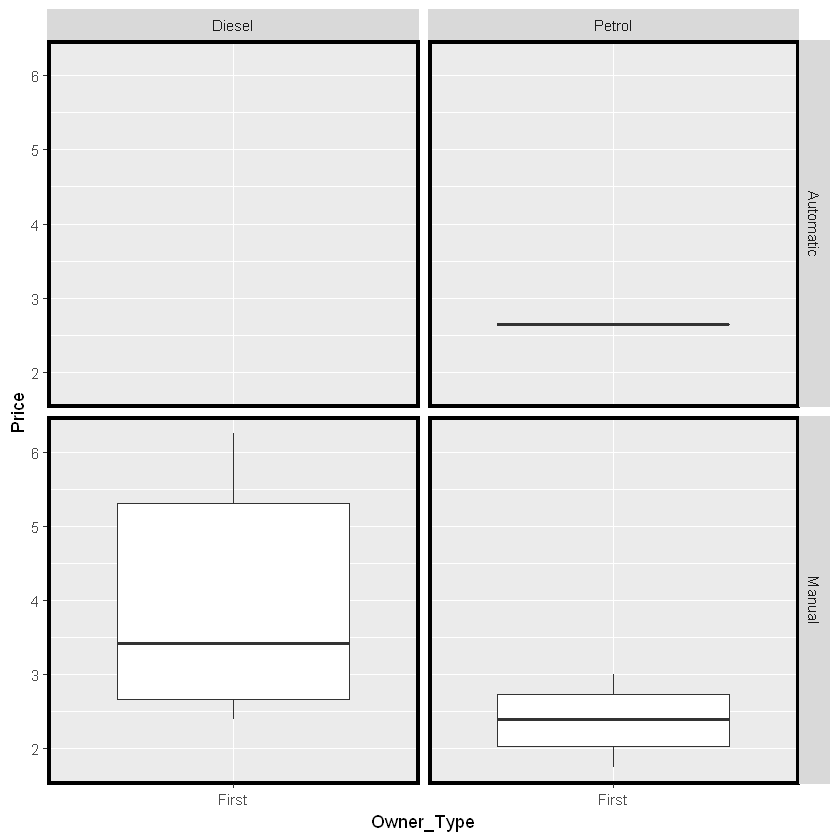

Nissan   Bangalore

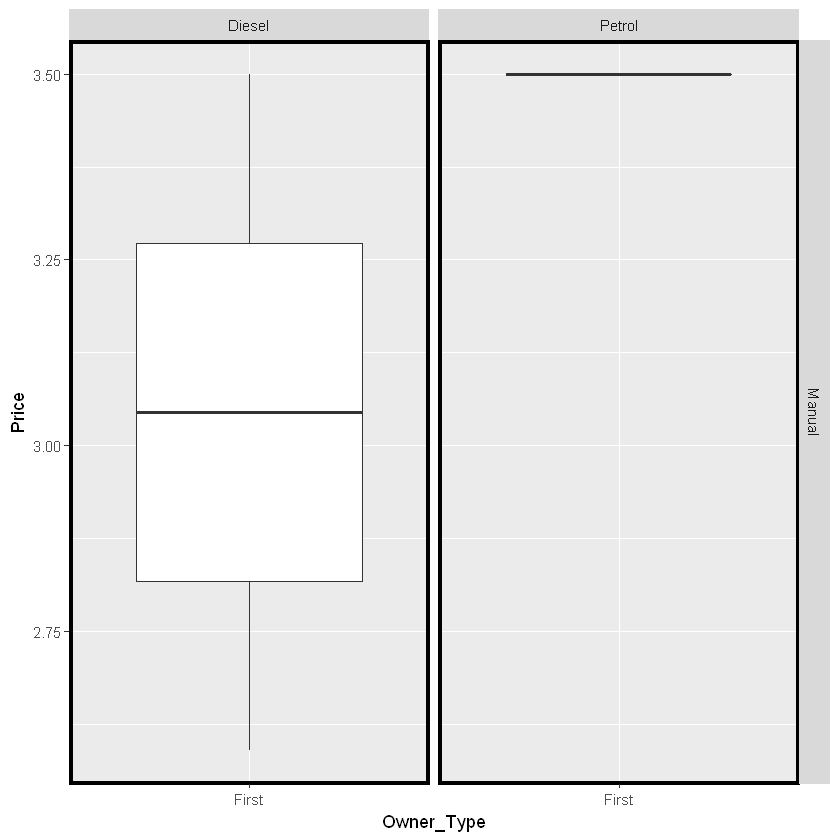

Nissan   Ahmedabad

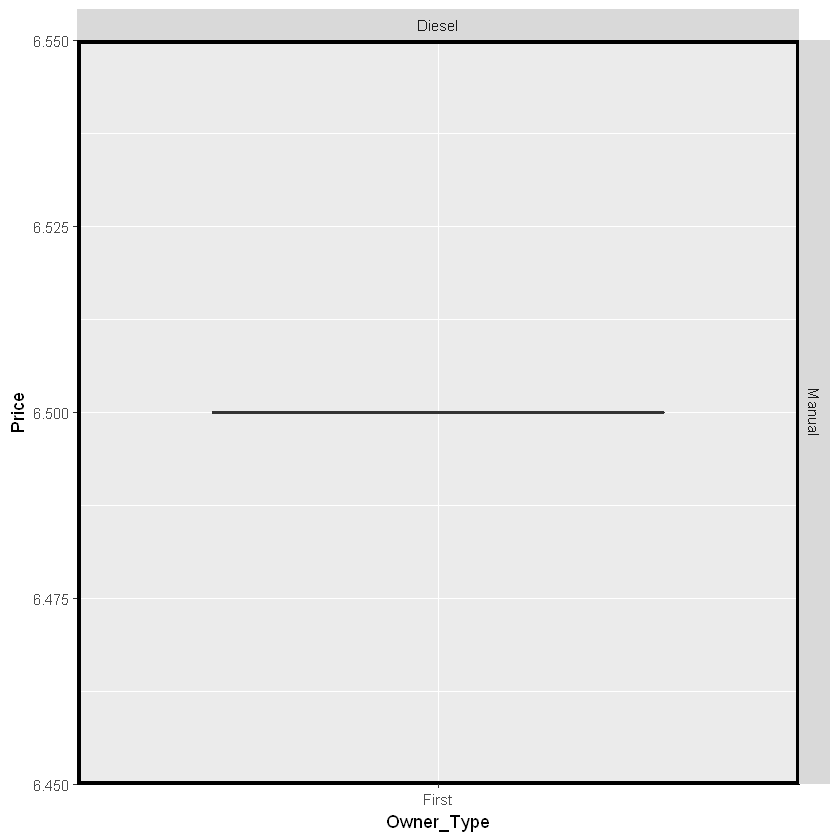

Toyota   Mumbai

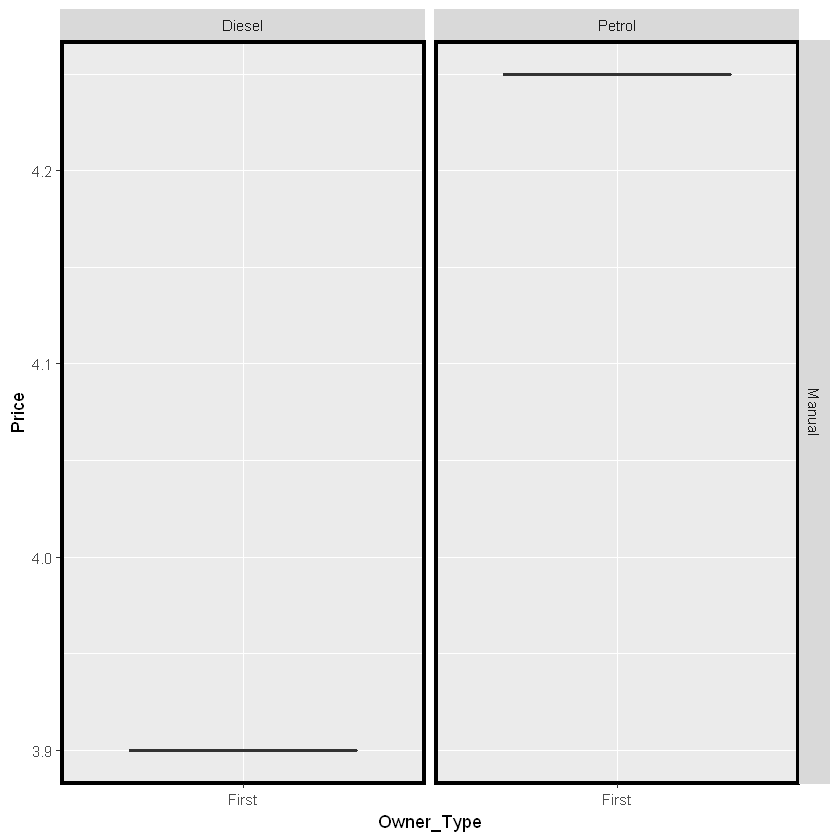

Toyota   Pune

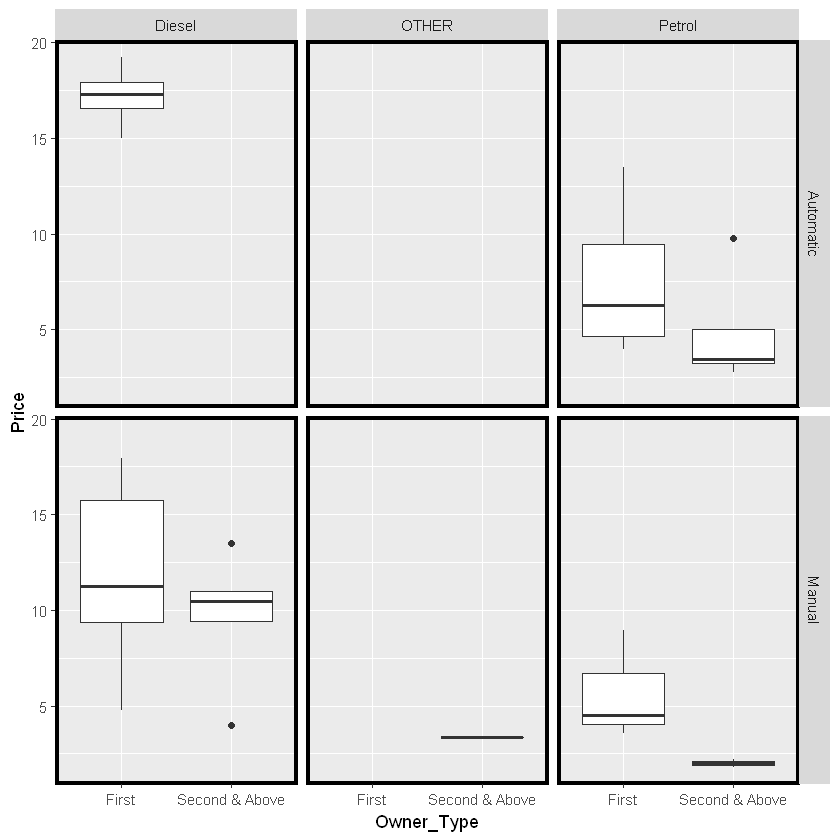

Toyota   Chennai

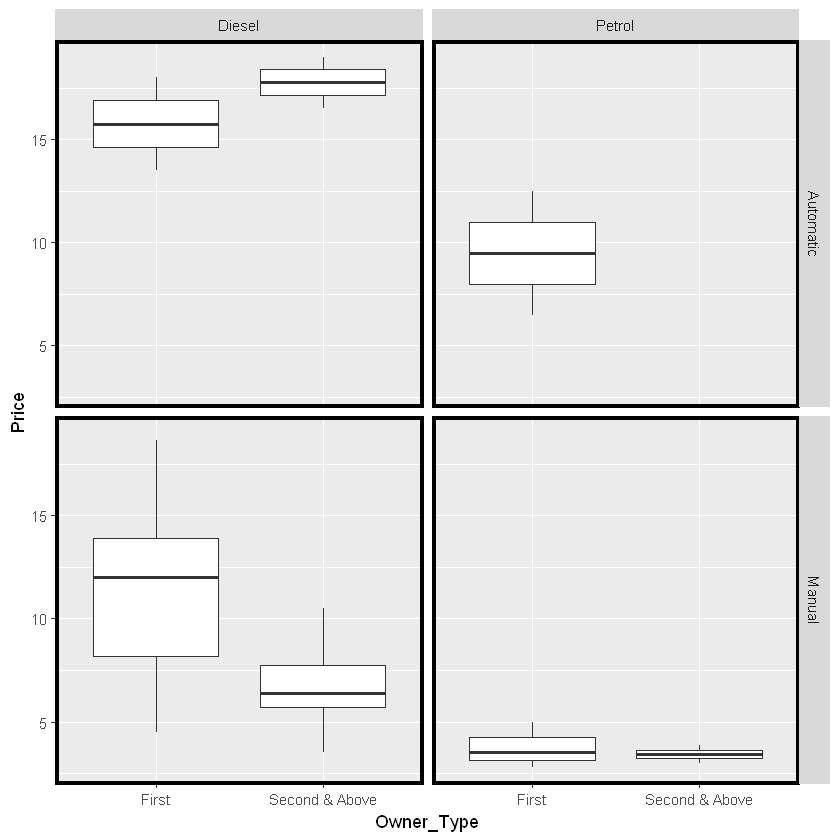

Toyota   Coimbatore

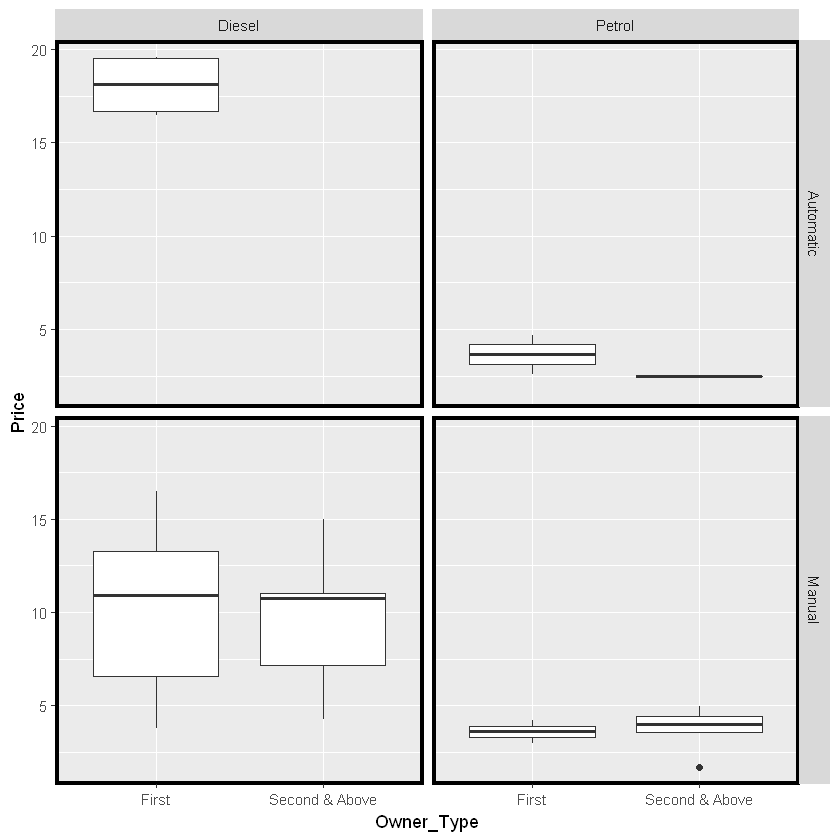

Toyota   Hyderabad

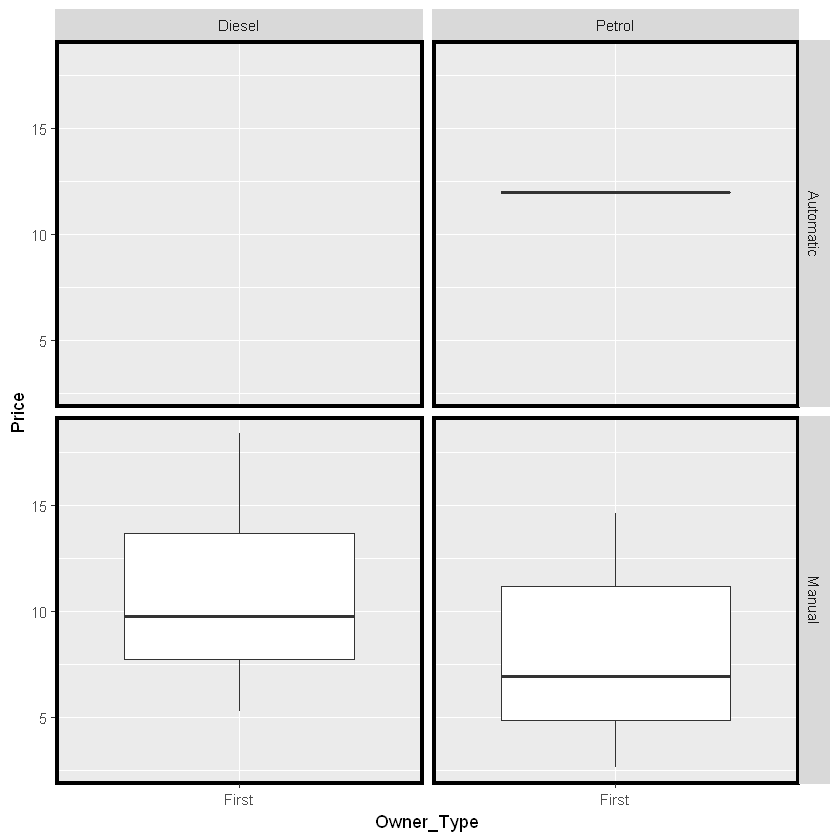

Toyota   Jaipur

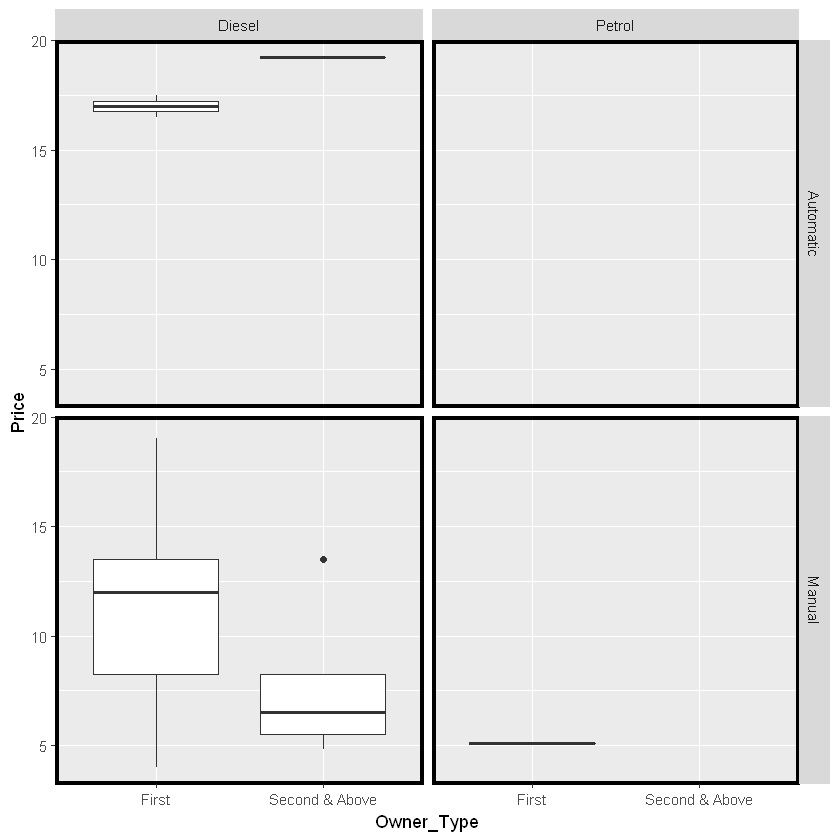

Toyota   Kochi

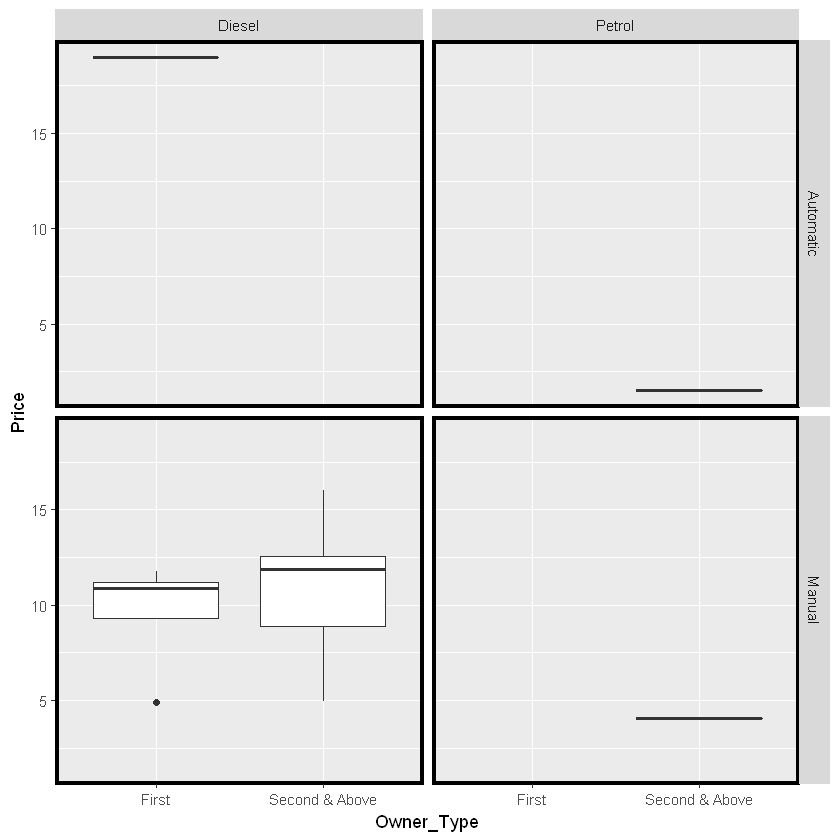

Toyota   Kolkata

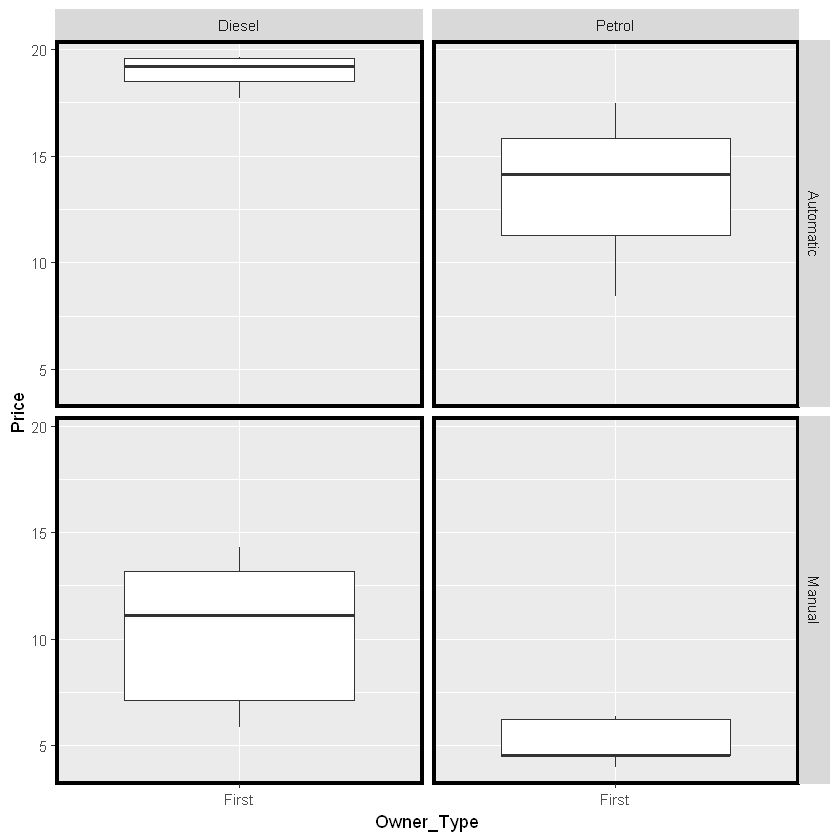

Toyota   Delhi

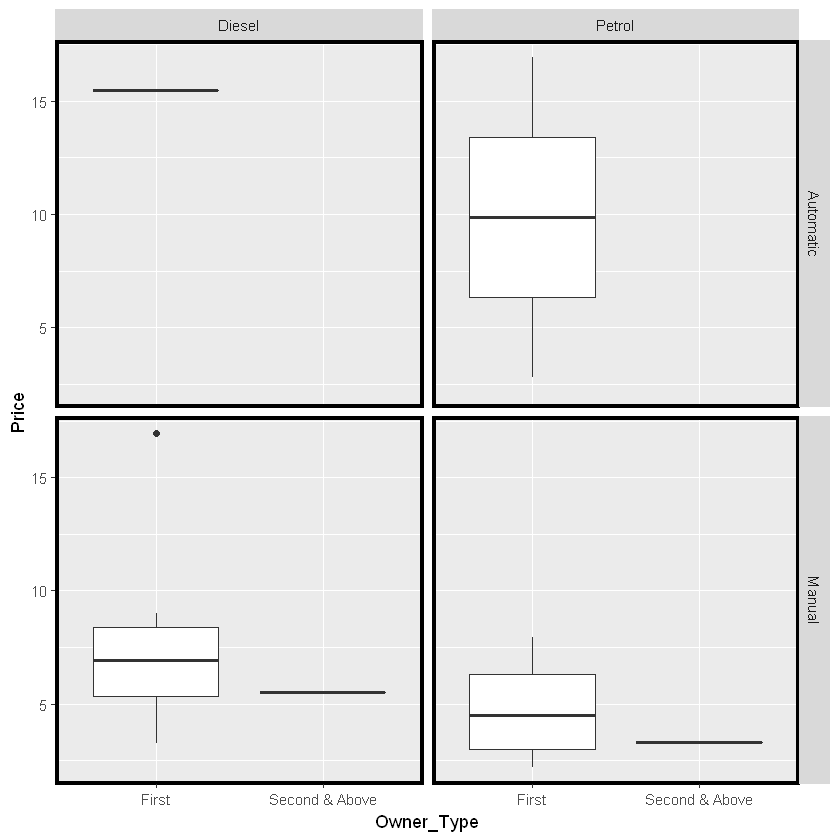

Toyota   Bangalore

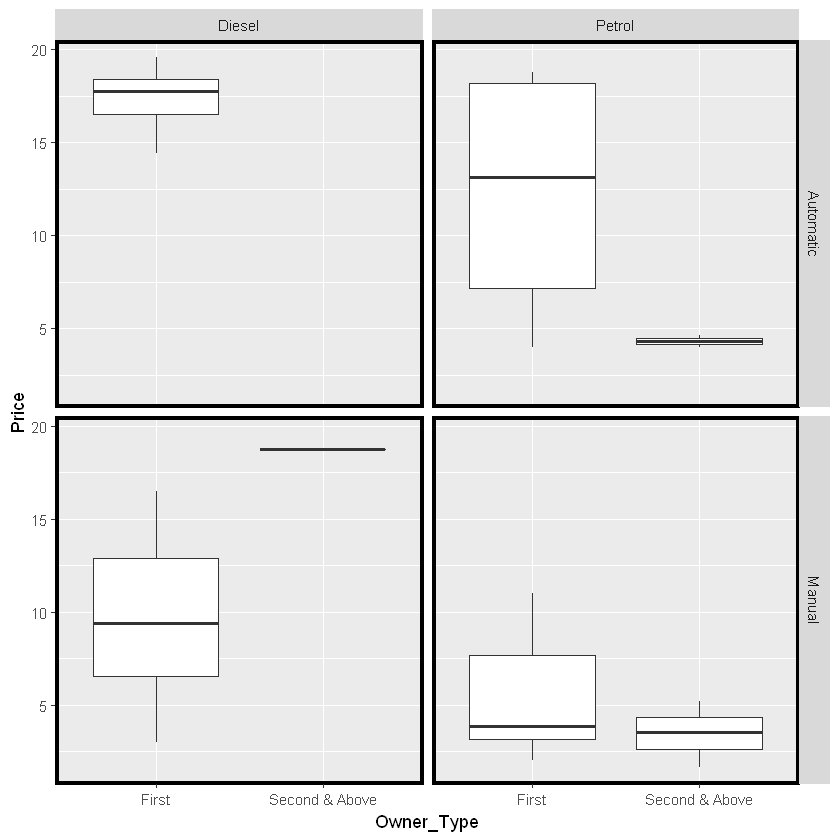

Toyota   Ahmedabad

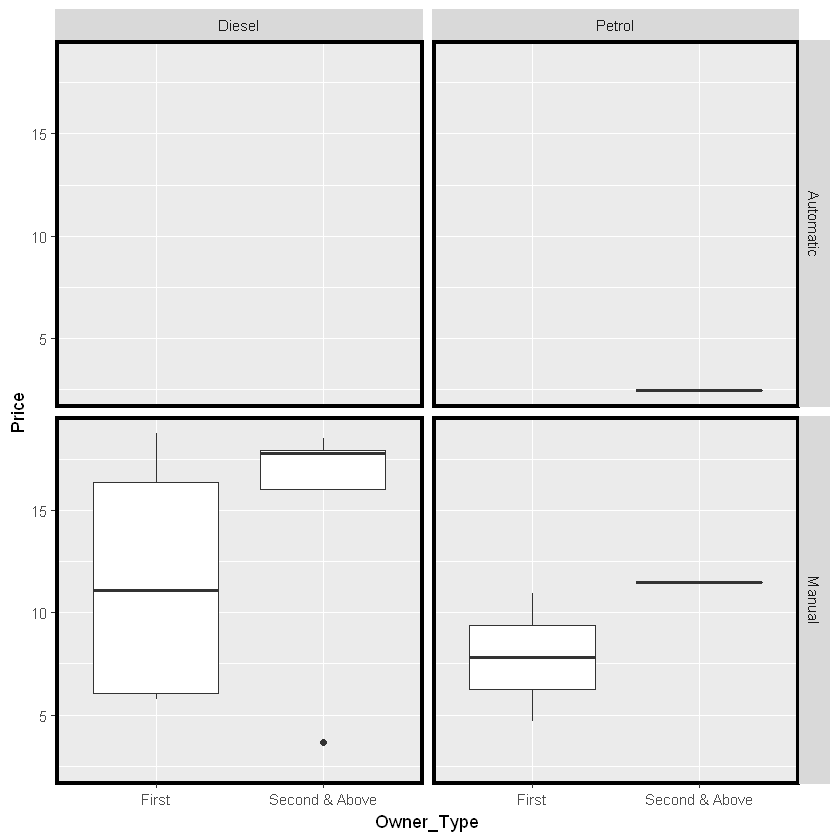

Volkswagen   Mumbai

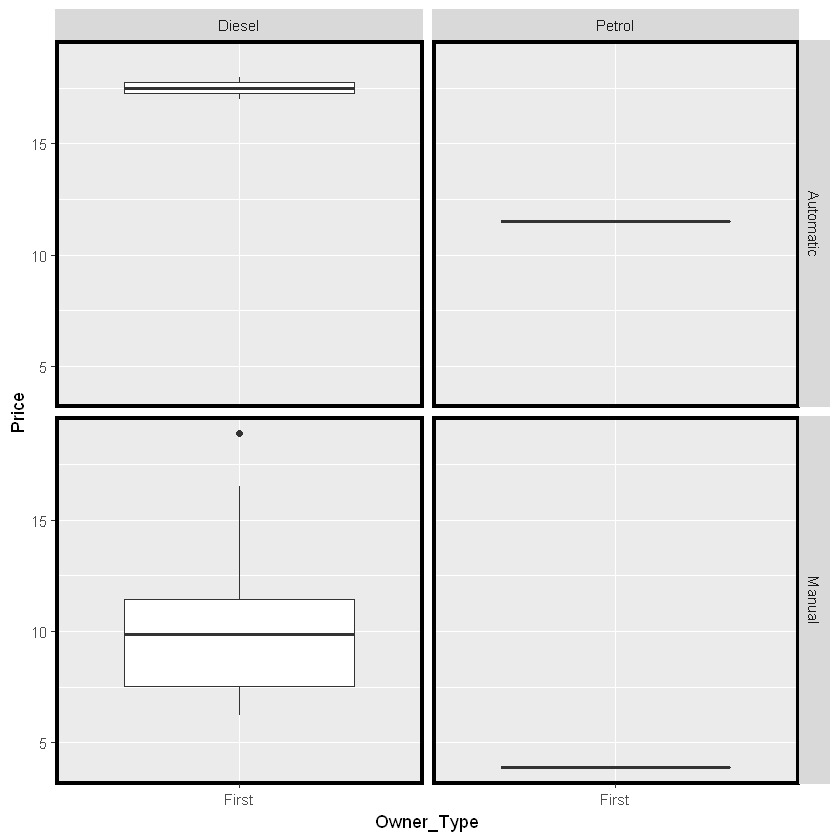

Volkswagen   Pune

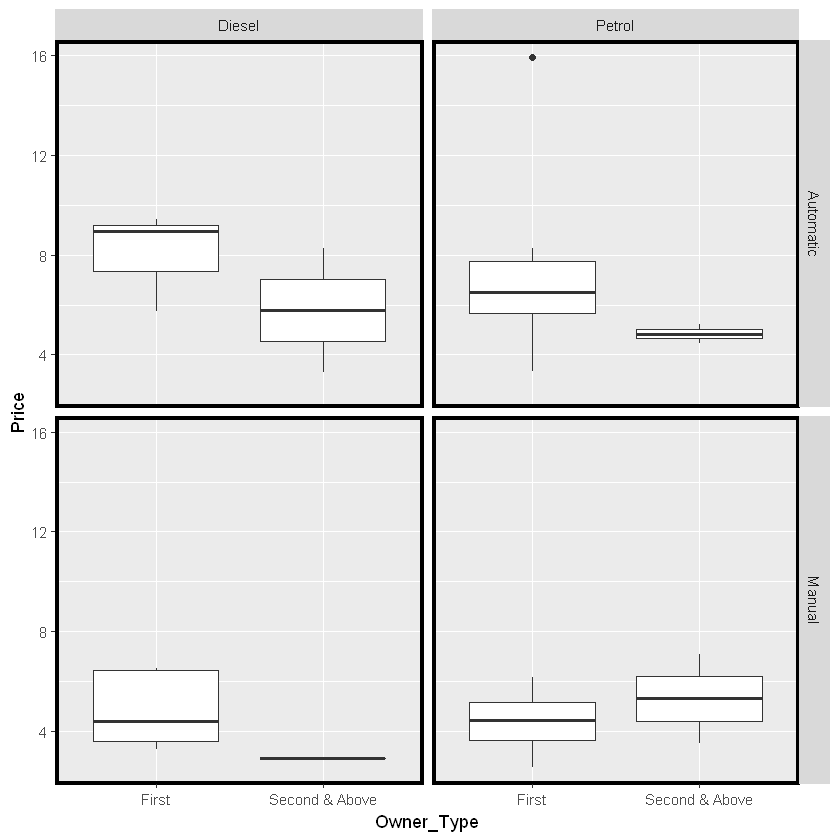

Volkswagen   Chennai

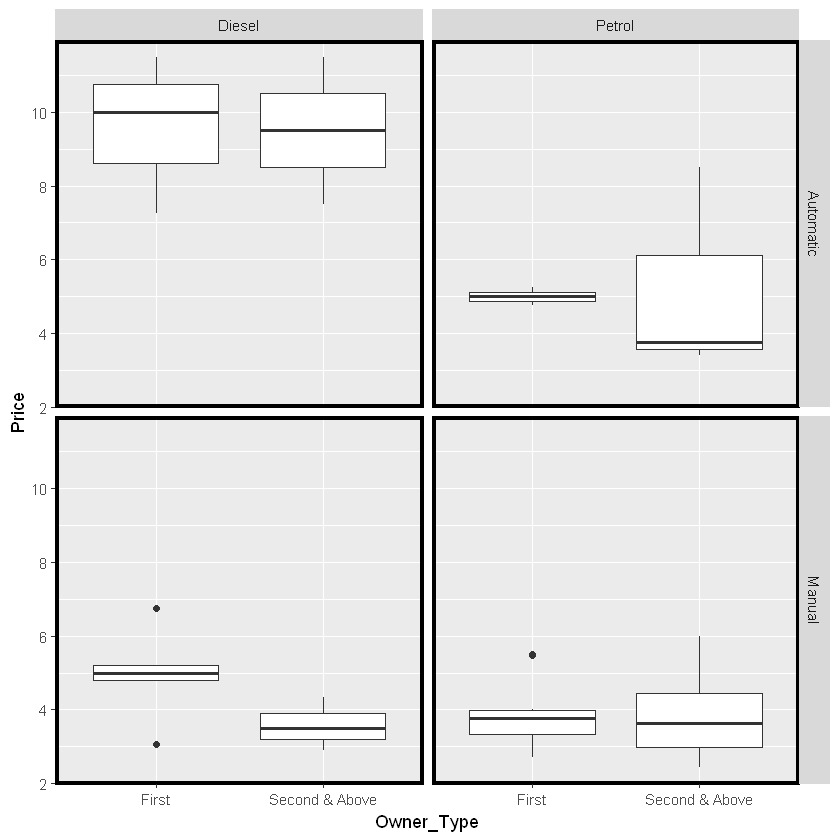

Volkswagen   Coimbatore

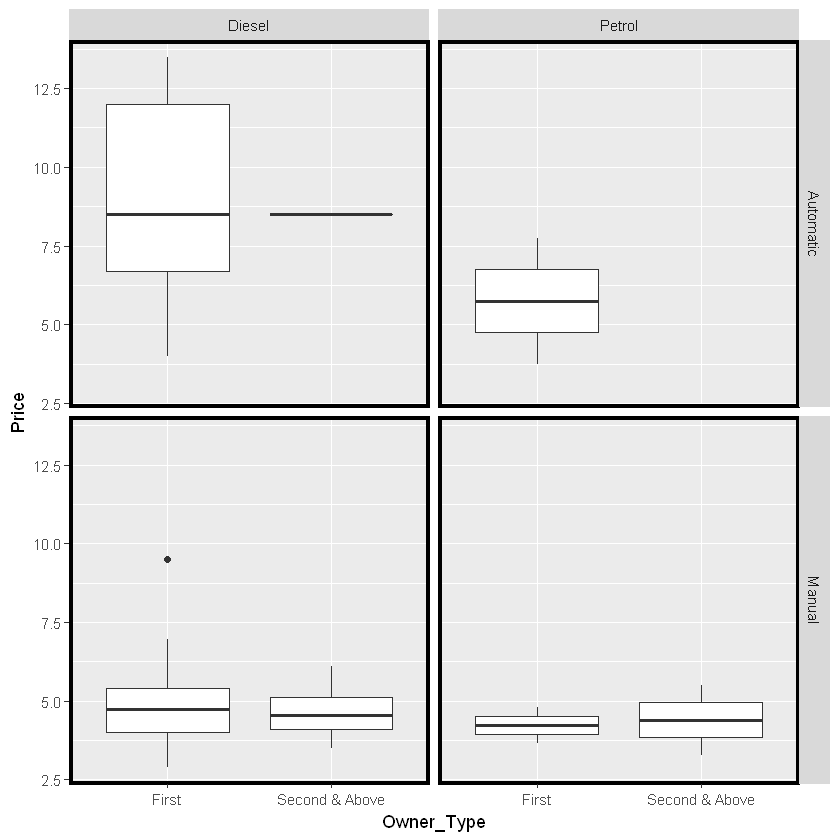

Volkswagen   Hyderabad

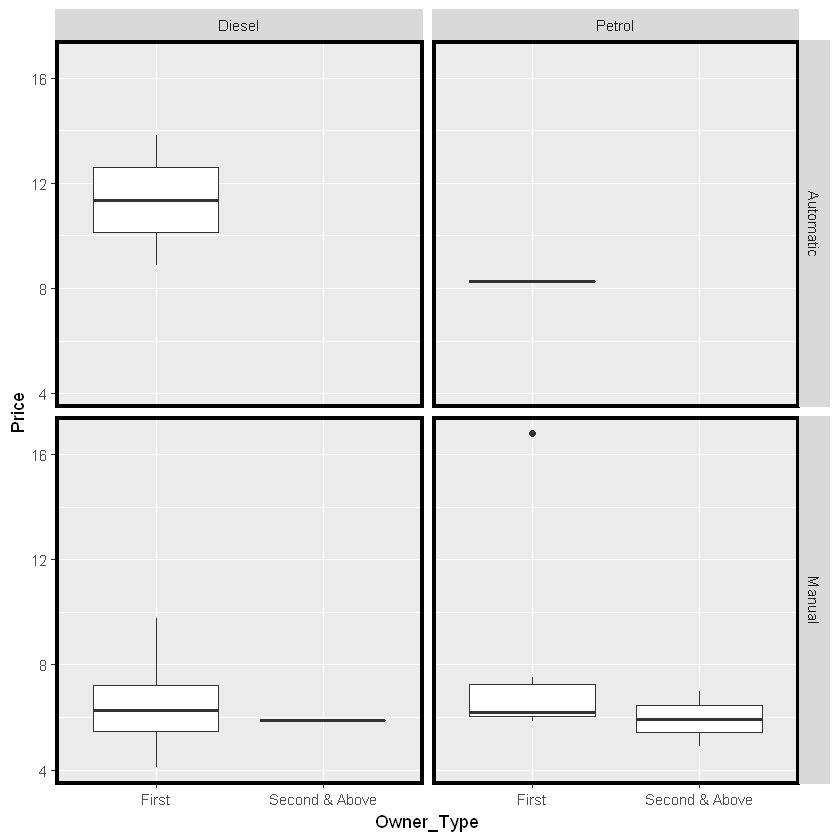

Volkswagen   Jaipur

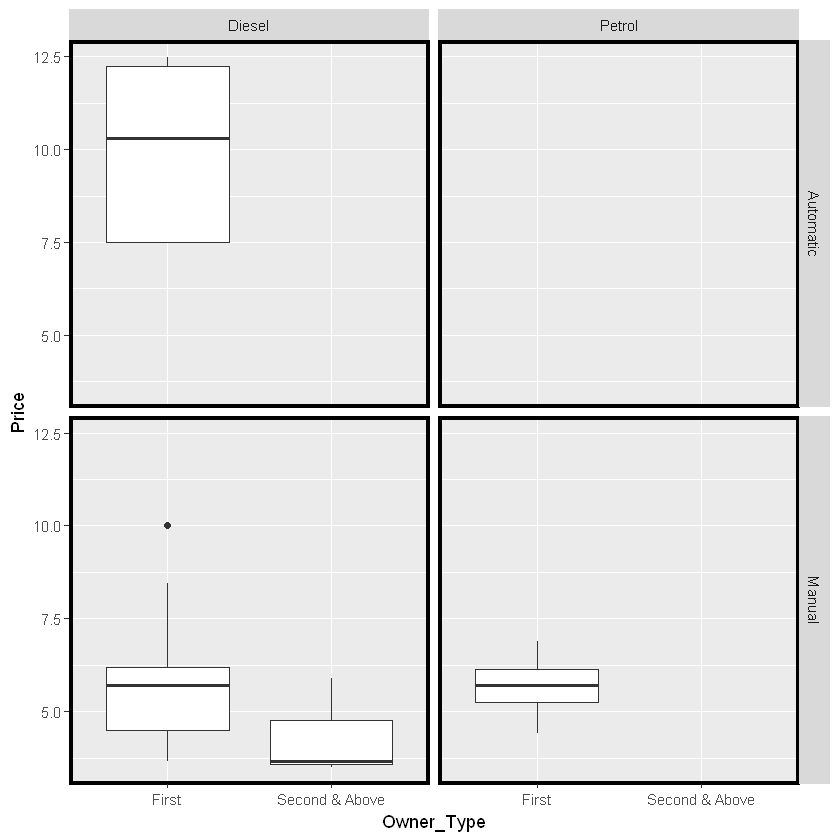

Volkswagen   Kochi

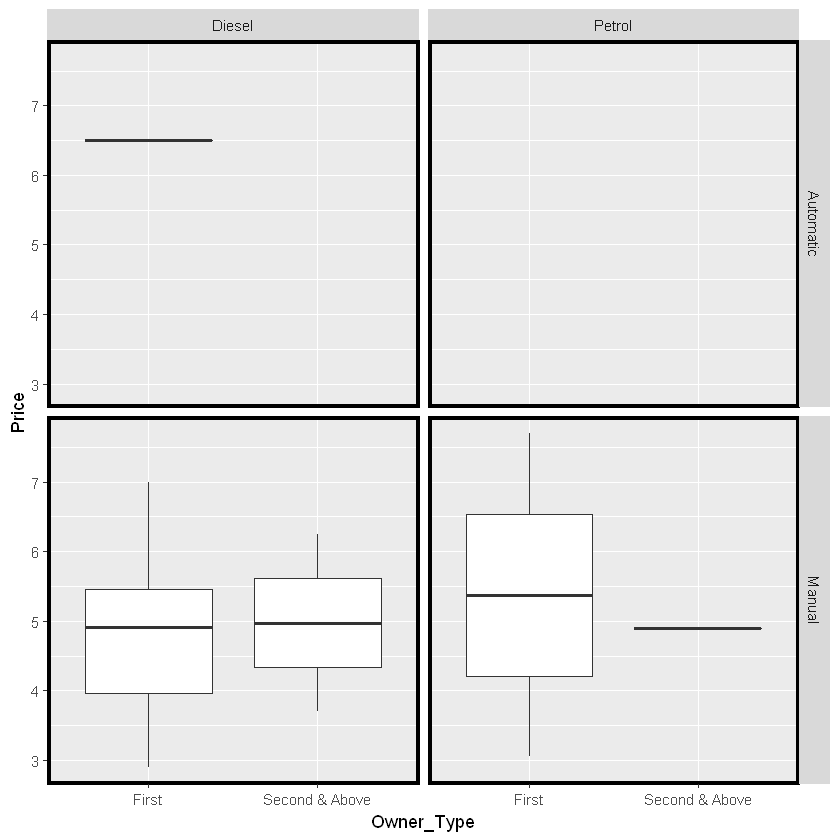

Volkswagen   Kolkata

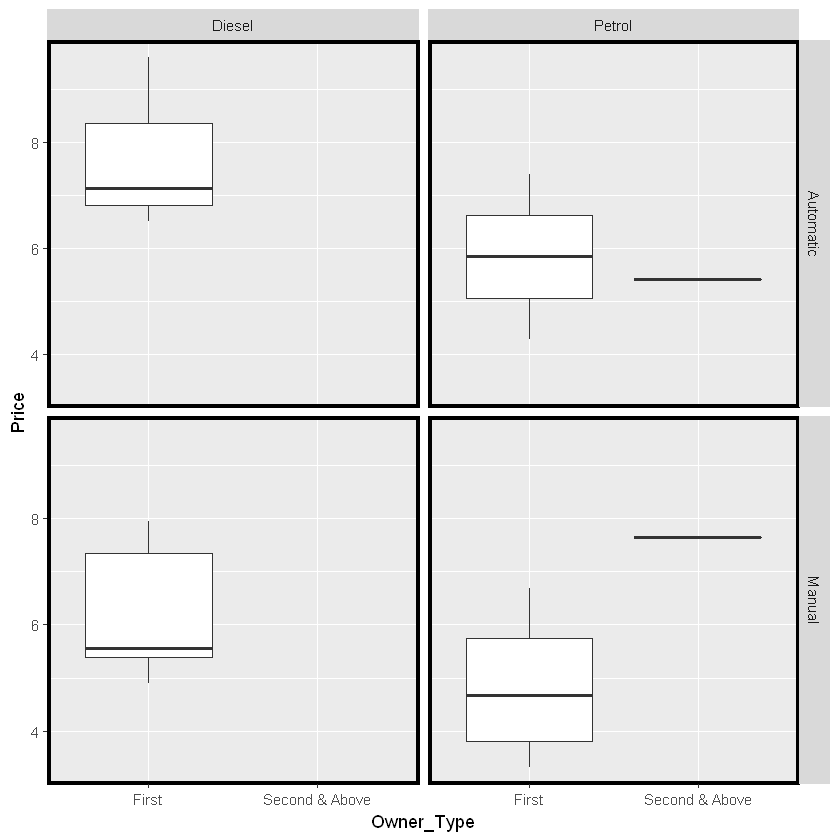

Volkswagen   Delhi

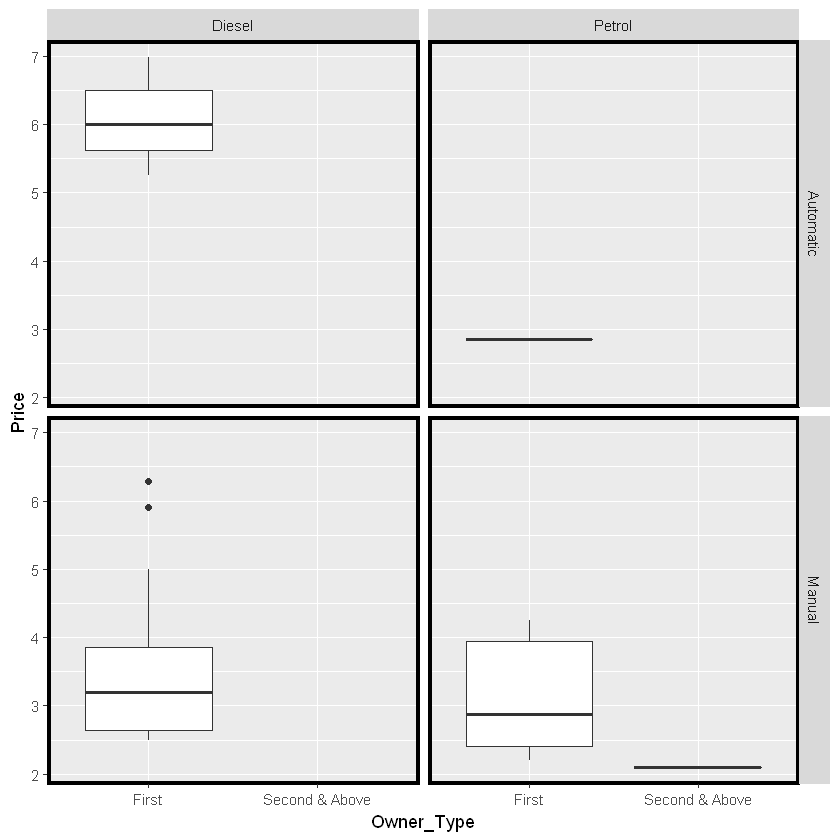

Volkswagen   Bangalore

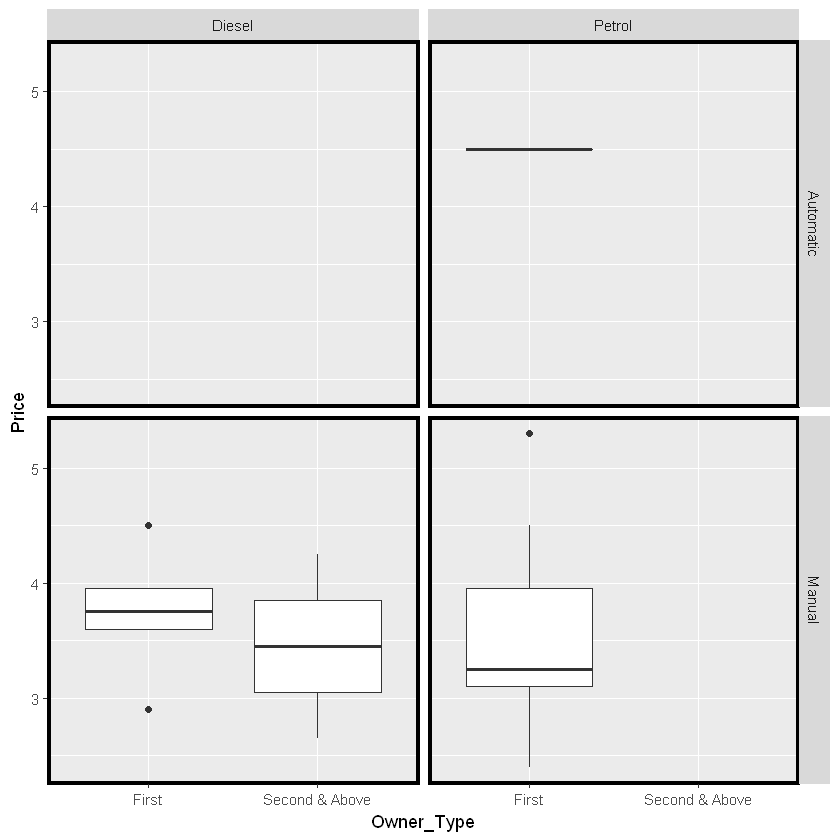

Volkswagen   Ahmedabad

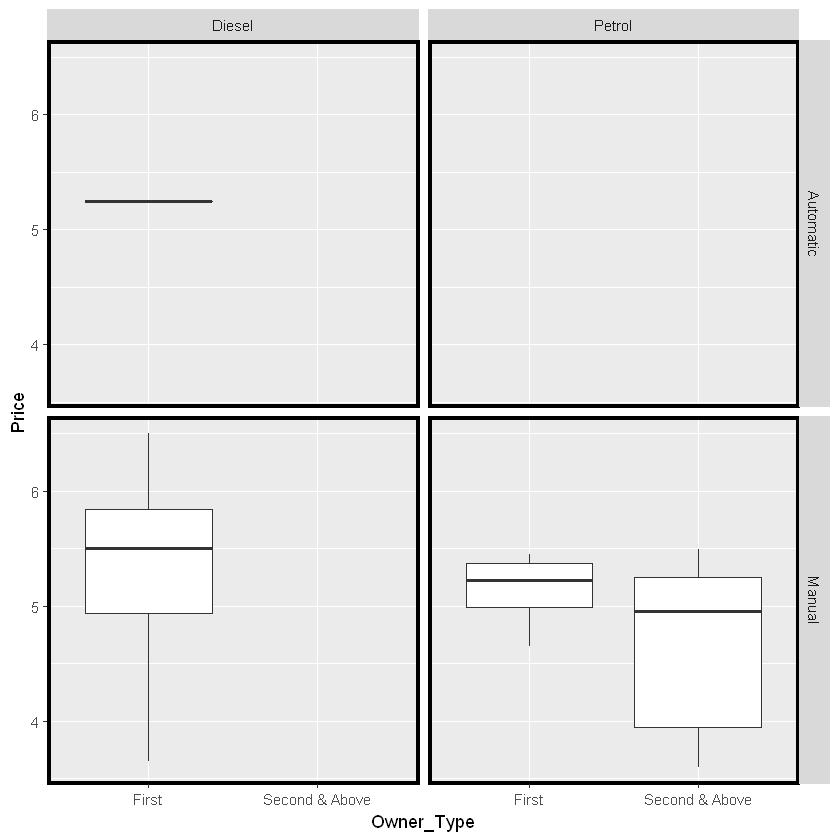

Tata   Mumbai

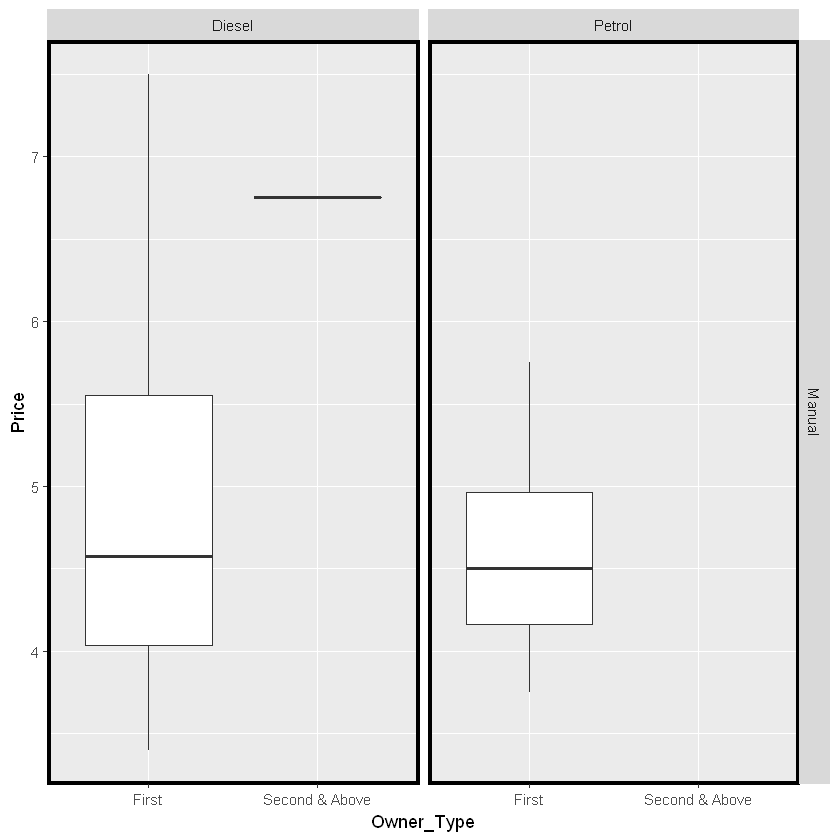

Tata   Pune

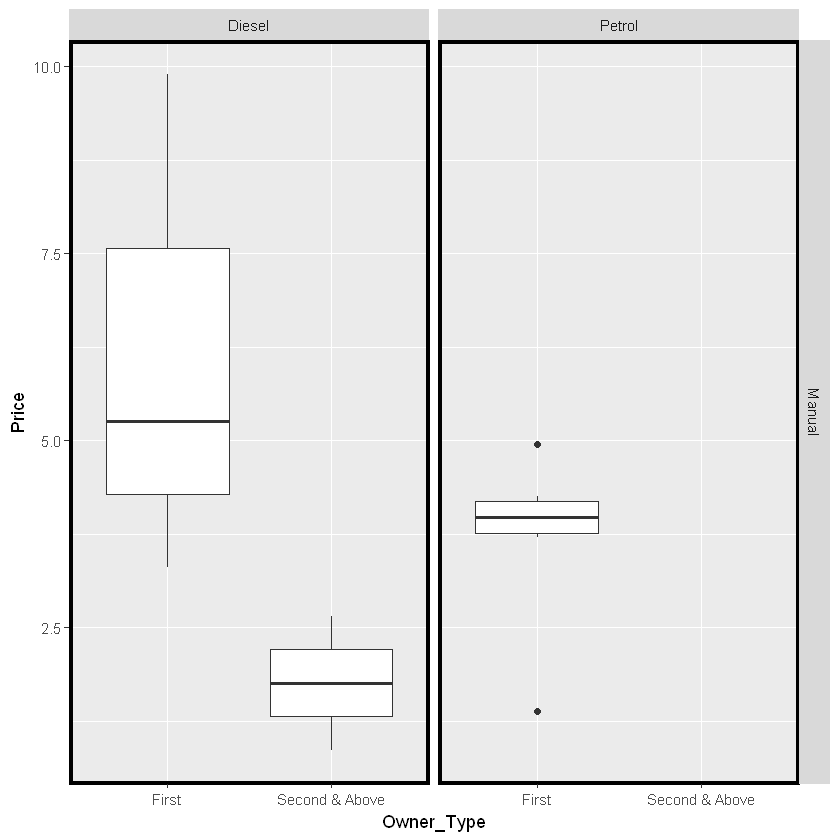

Tata   Chennai

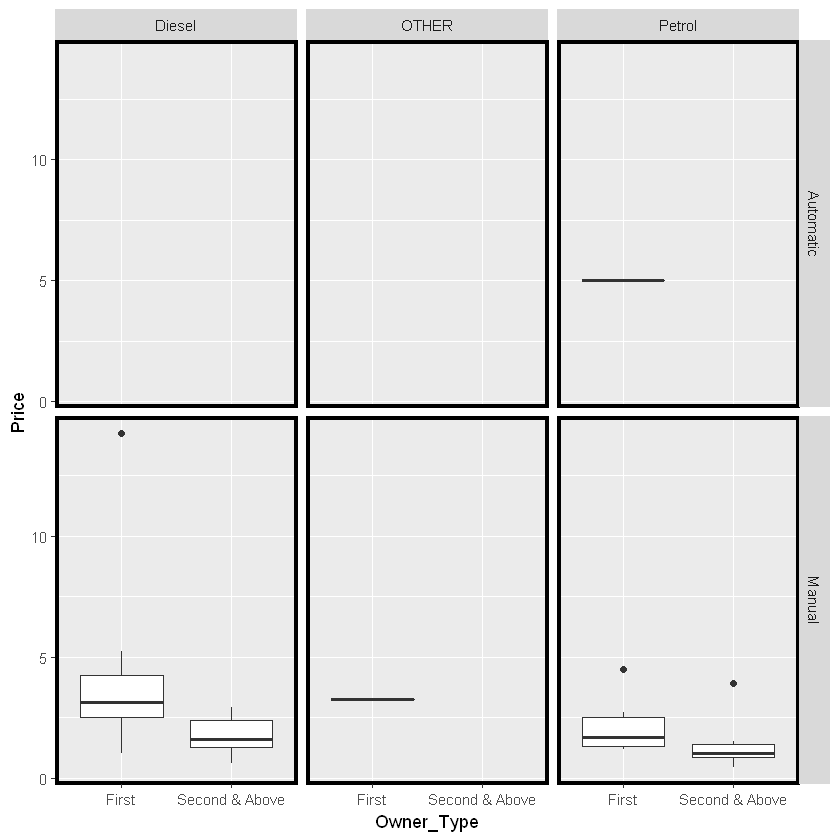

Tata   Coimbatore

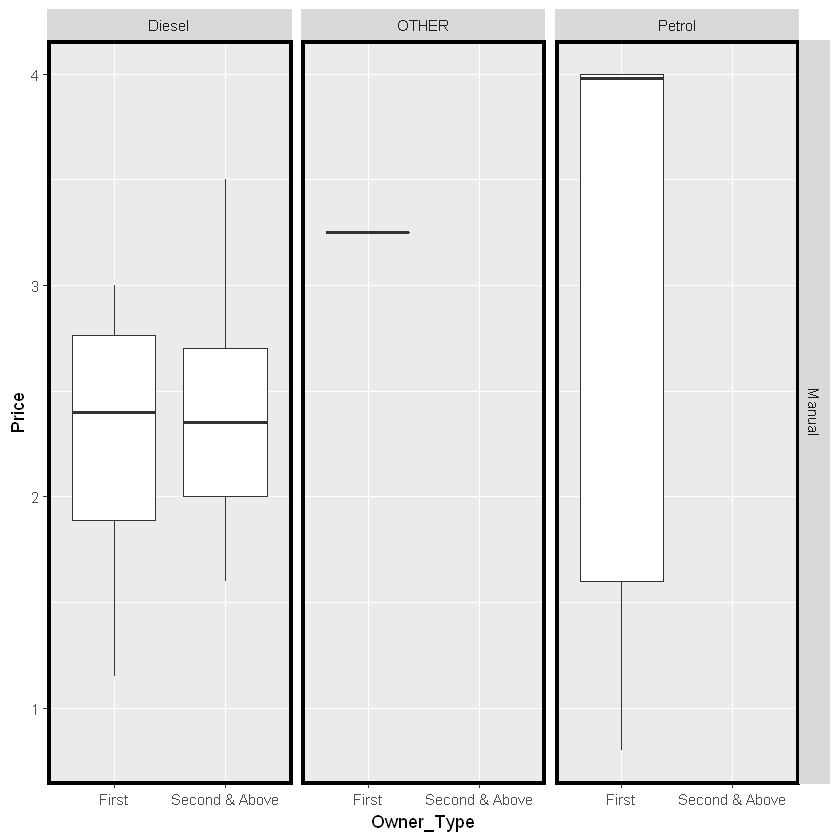

Tata   Hyderabad

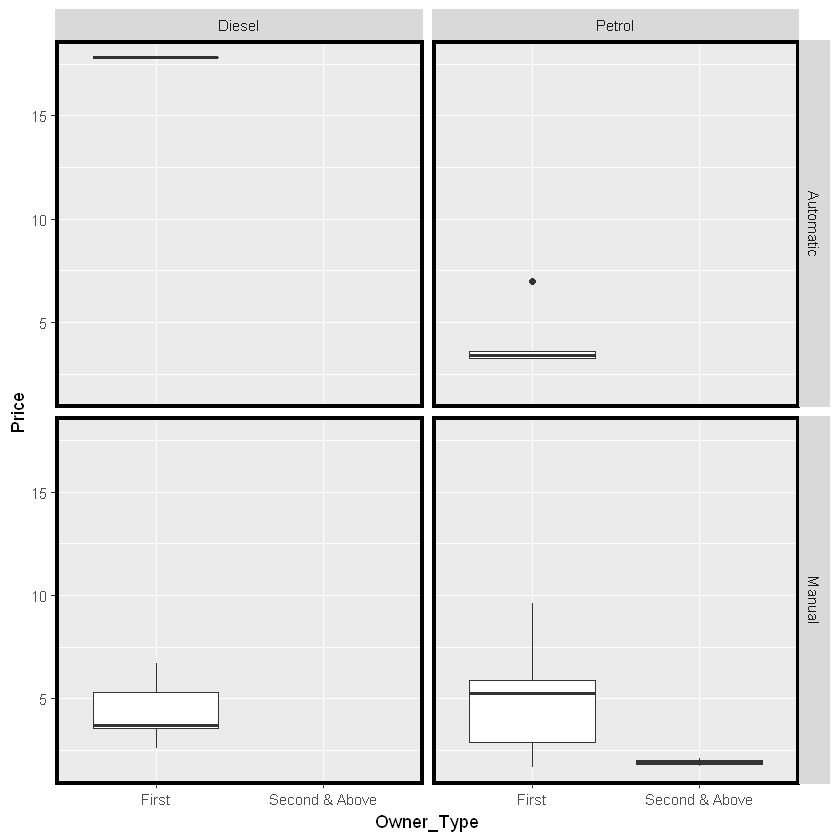

Tata   Jaipur

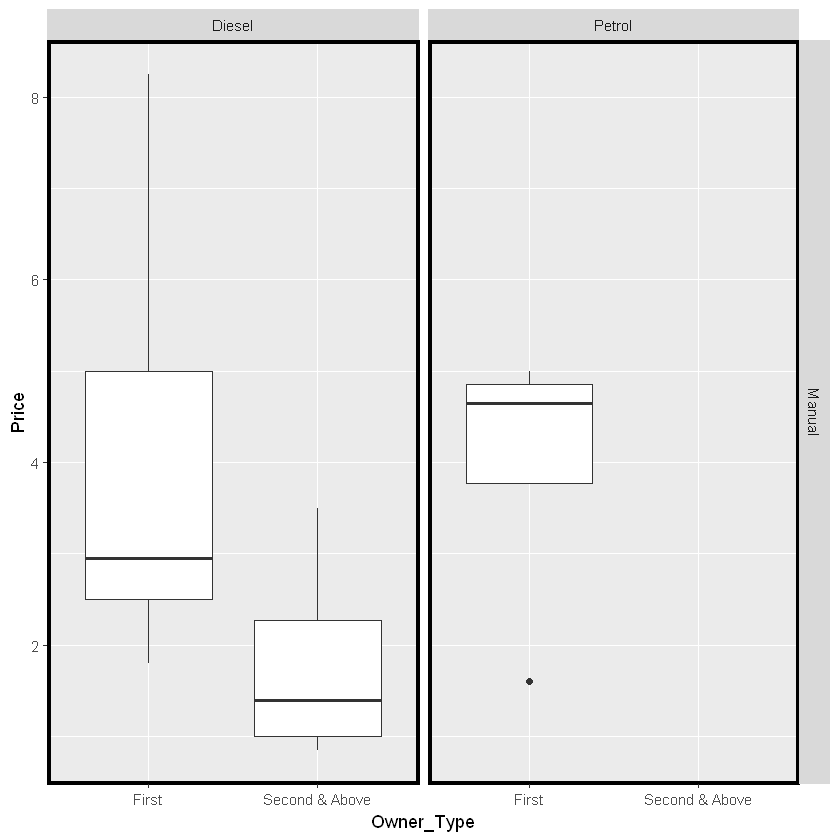

Tata   Kochi

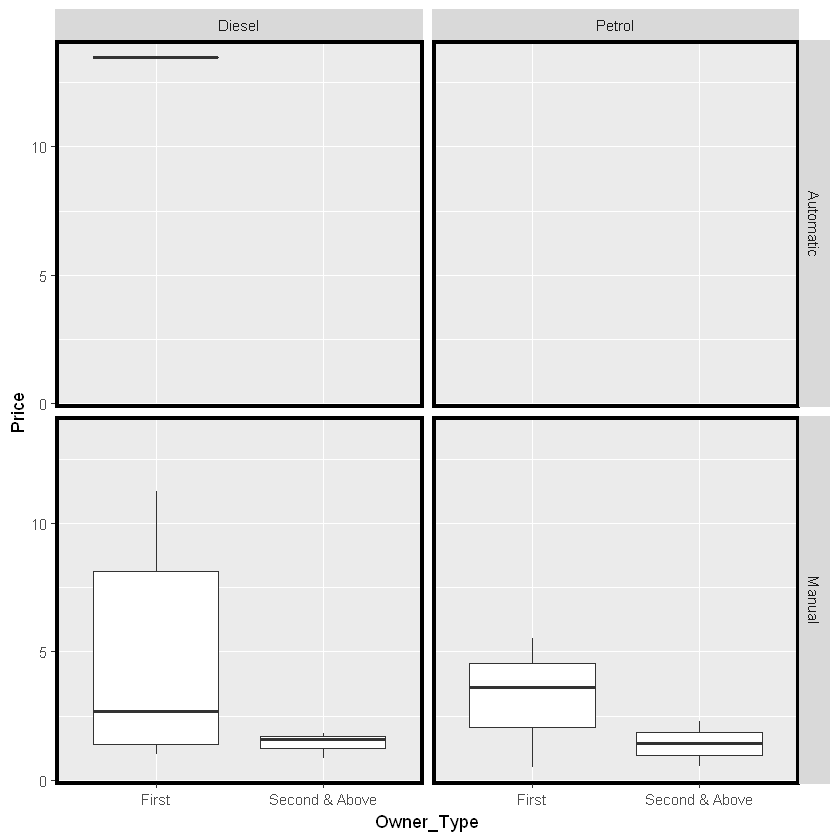

Tata   Kolkata

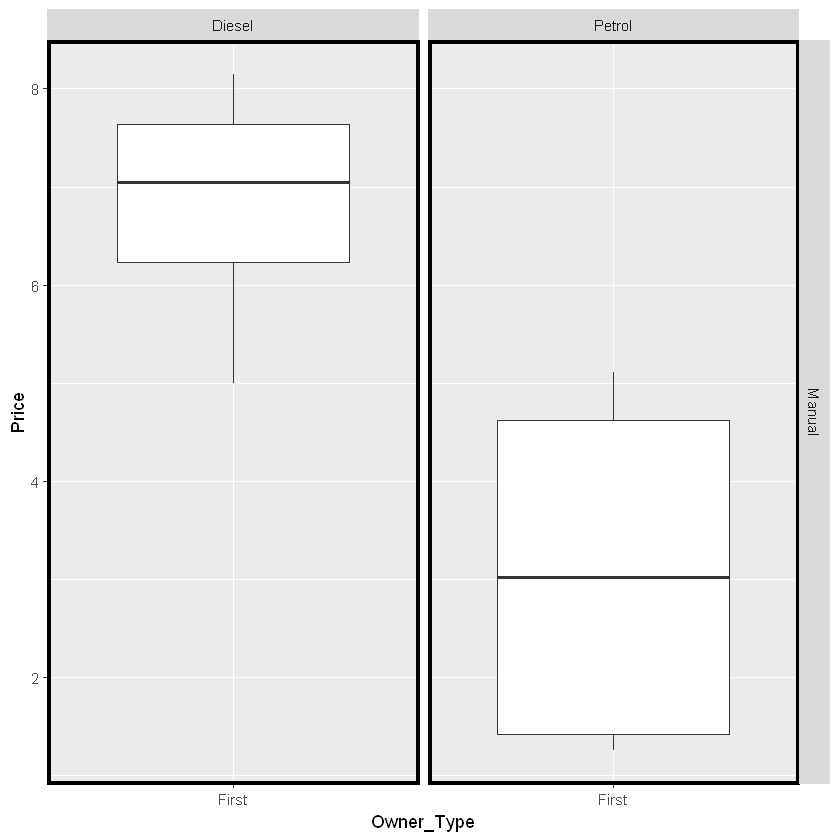

Tata   Delhi

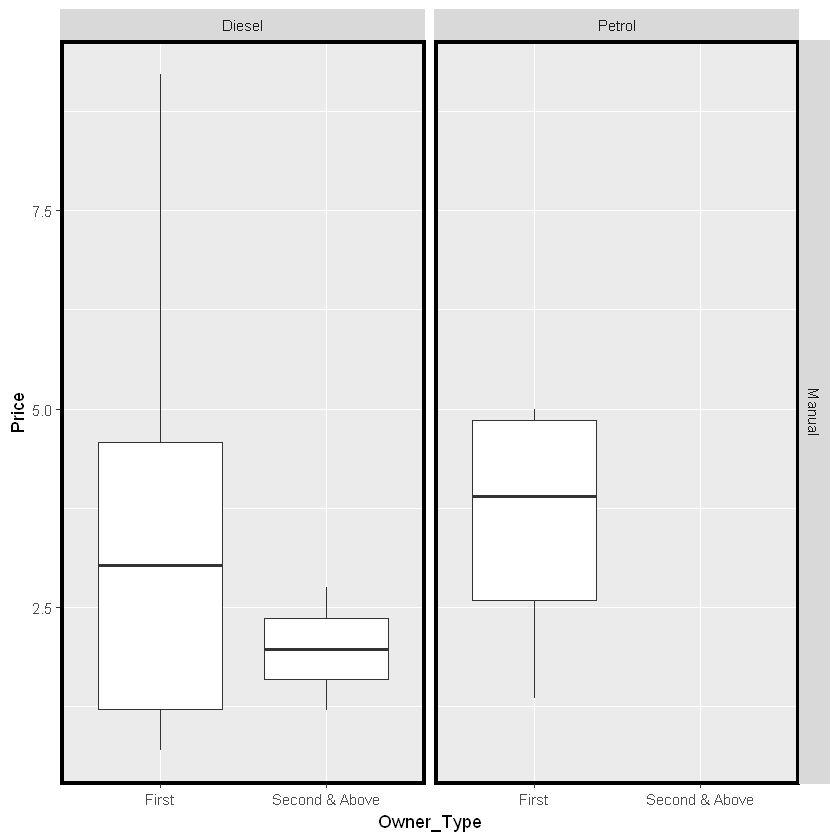

Tata   Bangalore

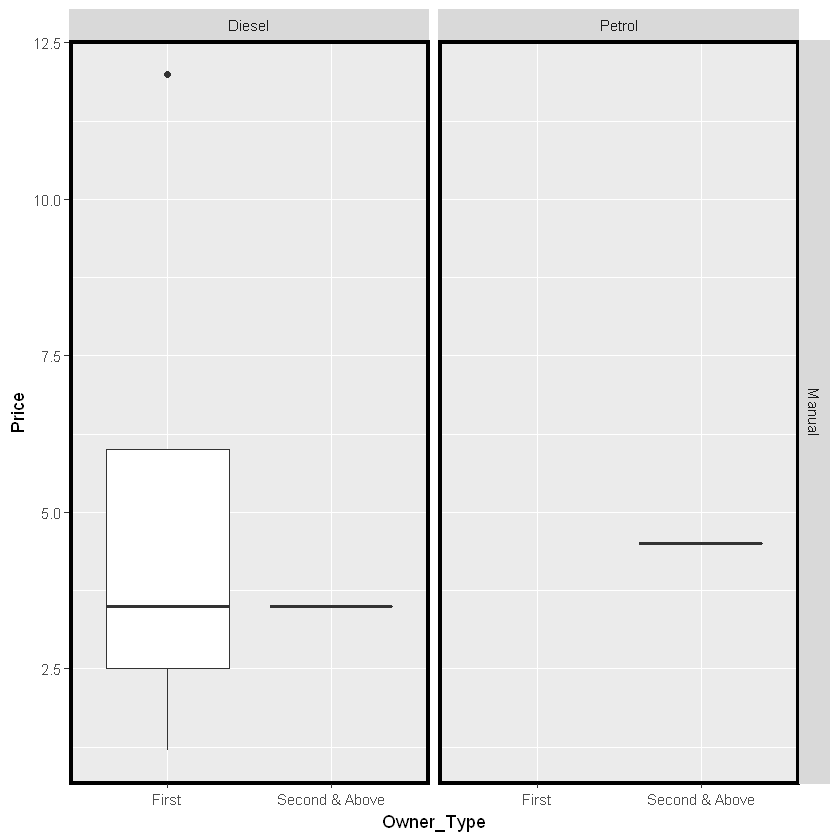

Tata   Ahmedabad

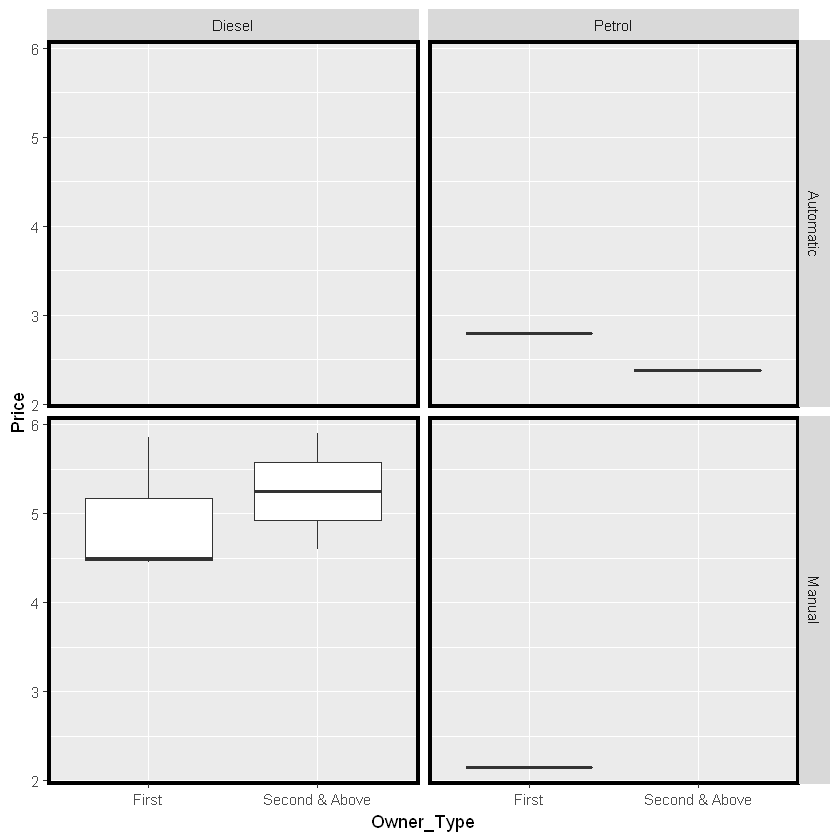

Land   Mumbai

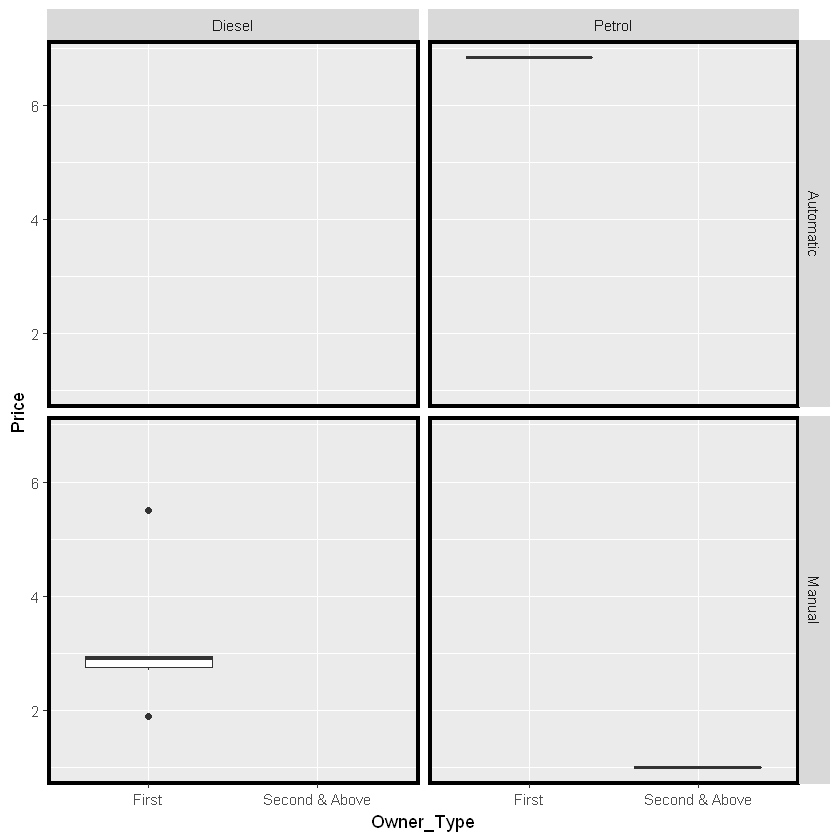

Land   Pune

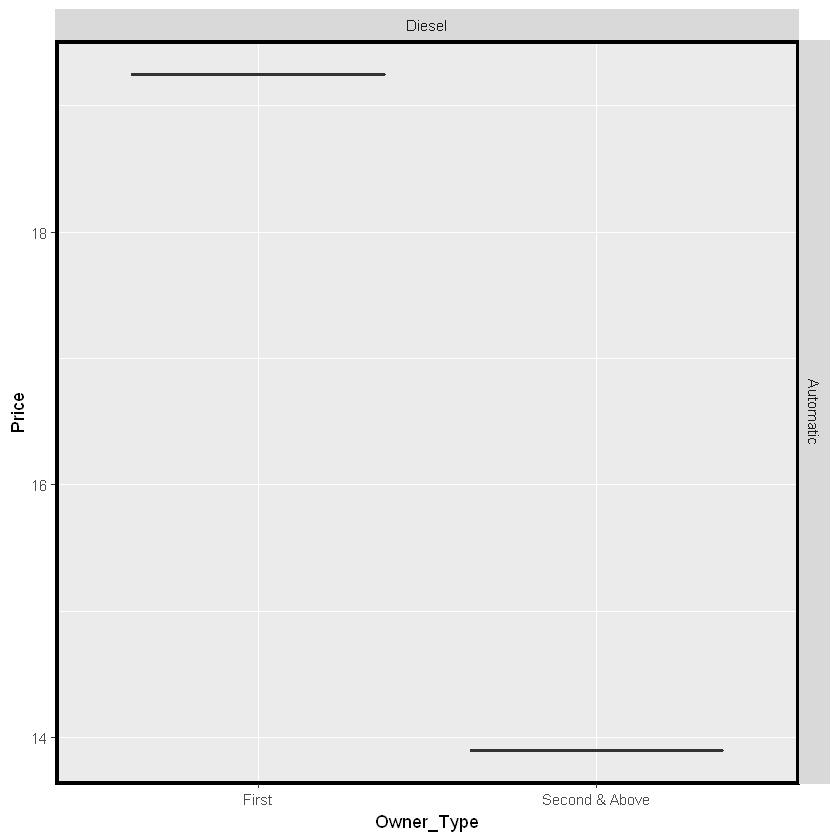

Land   Chennai

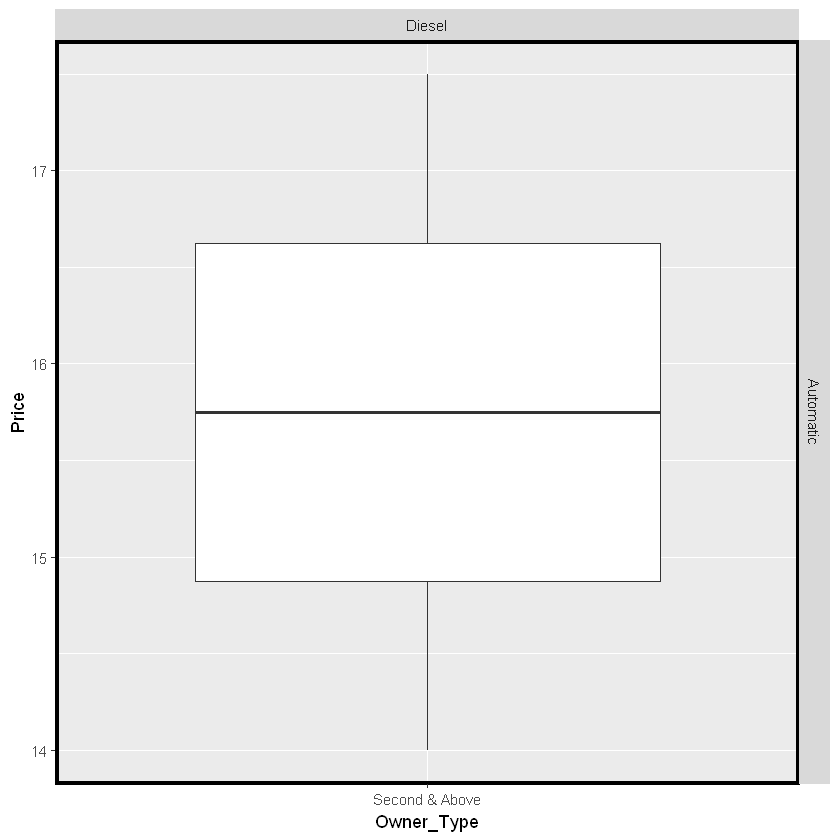

Land   Coimbatore

ERROR: [1m[33mError[39m in [1m[1m`combine_vars()`:[22m
[33m![39m Faceting variables must have at least one value


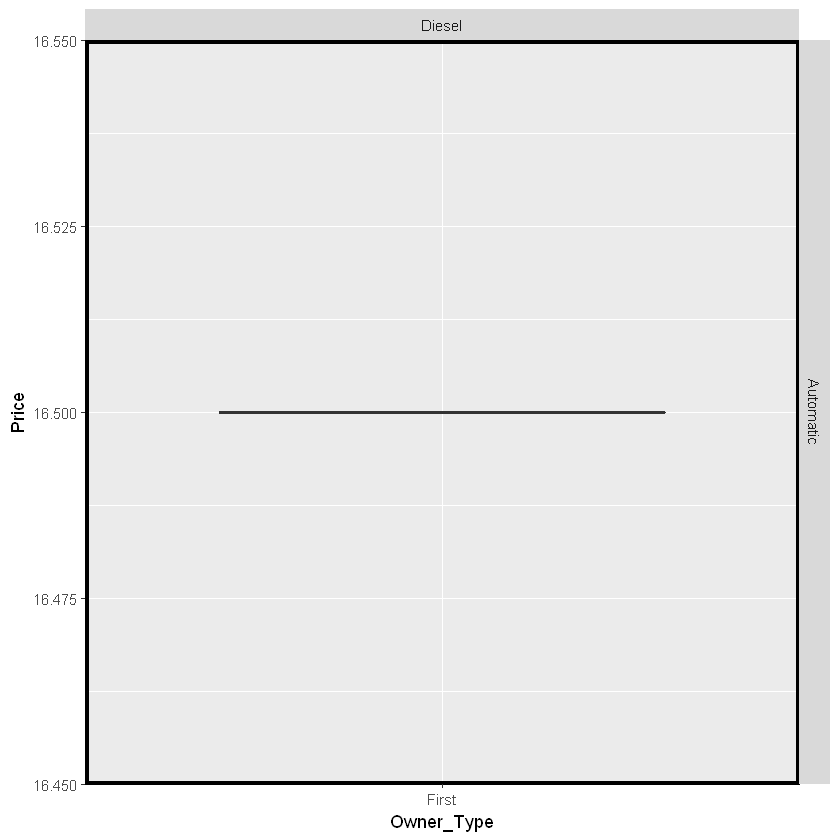

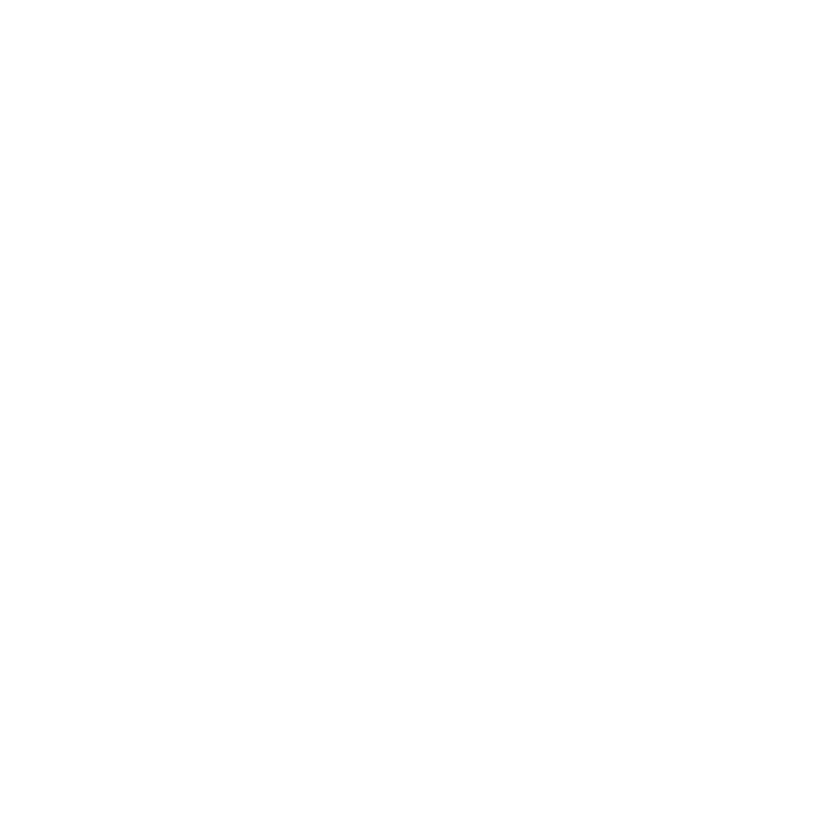

In [85]:
for (I in  unique( data$Mark)){
    for (L in  unique( data$Location)){
        d1 <- subset( data , data$Location ==L[[1]] &  data$Mark == I[[1]])
     
        fig1 <- qplot(x = Owner_Type  , y = Price   , data = d1 ,geom=c("boxplot" ) , main = cat(I[[1]],' ',L[[1]]  )  ) + facet_grid( Transmission ~ Fuel_Type)+
        theme(panel.border = element_rect(color = "black",
                                    fill = NA,
                                    size = 2))
        print(fig1 )
    
}}